## DAV 6150 Module 3 Assignment ( Cleaning "Messy" Data )

## Samyog KC & Anub Rai

## Introduction


In this assignment we utilise the application of data preparation concepts covered in Module 3. We will explore and clean the provided data set. The data set has data integrity and usability issues. The data set is comprised of information on more than 12,700 wines, with many of the attributes being related to the chemical composition of the wines. IN the dataset each of the  observation notes provide us  information regarding wine acidity and the taste and quality of the wine. There is also a variable which informs us how many bottles of each wine were sold.

## Importing libraries

In [66]:
# ! pip install missingno

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
colors = ["#0091AD", "#9CEAEF"]
pal = sns.set_palette(sns.color_palette(colors))
import missingno as msno
from sklearn.preprocessing import power_transform
from sklearn.impute import KNNImputer

## Loading data set

Data set is being loaded from the github repo

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/samyogkc/Data-Science/main/M3_Assignment/Data/M3_Data.csv')
df.head(10)

Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0           0      1       3           3.2            1.160        0.98   
1           1      2       3           4.5            0.160        0.81   
2           2      4       5           7.1            2.640        0.88   
3           3      5       3           5.7            0.385        0.04   
4           4      6       4           8.0            0.330        1.26   
5           5      7       0          11.3            0.320        0.59   
6           6      8       0           7.7            0.290        0.40   
7           7     11       4           6.5            1.220        0.34   
8           8     12       3          14.8            0.270        1.05   
9           9     13       6           5.5            0.220        0.39   

   ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  \
0          54.20      0.567                NaN               268.0  0.99280   
1          26.10      0.425               15.0               327.0  1.02792   
2          14.80      0.037              214.0               142.0  0.99518   
3          18.80      0.425               22.0               115.0  0.99640   
4           9.40        NaN              167.0               108.0  0.99457   
5           2.20      0.556               37.0                15.0  0.99940   
6          21.50      0.060              287.0               156.0  0.99572   
7           1.40      0.040              523.0               551.0  1.03236   
8          11.25      0.007              213.0                 NaN  0.99620   
9           1.80      0.277               62.0               180.0  0.94724   

     pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0  3.33       0.59      9.9            0          8    2.0  
1  3.38       0.70      NaN           -1          7    3.0  
2  3.12       0.48     22.0           -1          8    3.0  
3  2.24       1.83      6.2           -1          6    1.0  
4  3.12       1.77     13.7            0          9    2.0  
5  3.20       1.29     15.4            0         11    NaN  
6  3.49       1.21     10.3            0          8    NaN  
7  3.20        NaN     11.6            1          7    3.0  
8  4.93       0.26     15.0            0          6    NaN  
9  3.09       0.75     12.6            0          8    4.0

In [3]:
wine_df = df.copy()

In [4]:
wine_df = wine_df.drop(columns='Unnamed: 0')



In [5]:
wine_df.head(10)


INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160        0.98          54.20   
1      2       3           4.5            0.160        0.81          26.10   
2      4       5           7.1            2.640        0.88          14.80   
3      5       3           5.7            0.385        0.04          18.80   
4      6       4           8.0            0.330        1.26           9.40   
5      7       0          11.3            0.320        0.59           2.20   
6      8       0           7.7            0.290        0.40          21.50   
7     11       4           6.5            1.220        0.34           1.40   
8     12       3          14.8            0.270        1.05          11.25   
9     13       6           5.5            0.220        0.39           1.80   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0      0.567                NaN               268.0  0.99280  3.33       0.59   
1      0.425               15.0               327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3      0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN              167.0               108.0  0.99457  3.12       1.77   
5      0.556               37.0                15.0  0.99940  3.20       1.29   
6      0.060              287.0               156.0  0.99572  3.49       1.21   
7      0.040              523.0               551.0  1.03236  3.20        NaN   
8      0.007              213.0                 NaN  0.99620  4.93       0.26   
9      0.277               62.0               180.0  0.94724  3.09       0.75   

   Alcohol  LabelAppeal  AcidIndex  STARS  
0      9.9            0          8    2.0  
1      NaN           -1          7    3.0  
2     22.0           -1          8    3.0  
3      6.2           -1          6    1.0  
4     13.7            0          9    2.0  
5     15.4            0         11    NaN  
6     10.3            0          8    NaN  
7     11.6            1          7    3.0  
8     15.0            0          6    NaN  
9     12.6            0          8    4.0

#### Descriptions of the variables

* INDEX: This attribute serves as a unique identifier for each record in the dataset.
* TARGET: This is the response variable, indicating the number of cases of wine sold. 
* AcidIndex: This attribute measures the total acidity of wine via a weighted average. 
* Alcohol: This represents the alcohol content of the wine.
* Chlorides: It indicates the chloride content of the wine.
* CitricAcid: Citric acid content is another chemical attribute that can affect the taste and acidity of the wine.
* Density: This attribute represents the density of the wine.
* FixedAcidity: Fixed acidity is a measure of the non-volatile acids in the wine.
* FreeSulfurDioxide: This indicates the sulfur dioxide content in a free state.
* LabelAppeal: Label appeal is a subjective marketing score that reflects the attractiveness of the wine label design.
* ResidualSugar: Residual sugar content measures the sweetness of the wine. 
* STARS: Wine rating, as determined by experts, with a scale from 1 (poor) to 4 (excellent).
* Sulphates: This attribute represents the sulfate content of the wine.
* TotalSulfurDioxide: Total sulfur dioxide content of the wine includes both free and bound forms. 
* VolatileAcidity: Volatile acid content of the wine can affect its aroma and taste.
* pH: pH is a measure of the acidity or alkalinity of the wine.

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   INDEX               12795 non-null  int64  
 1   TARGET              12795 non-null  int64  
 2   FixedAcidity        12795 non-null  float64
 3   VolatileAcidity     12795 non-null  float64
 4   CitricAcid          12795 non-null  float64
 5   ResidualSugar       12179 non-null  float64
 6   Chlorides           12157 non-null  float64
 7   FreeSulfurDioxide   12148 non-null  float64
 8   TotalSulfurDioxide  12113 non-null  float64
 9   Density             12795 non-null  float64
 10  pH                  12400 non-null  float64
 11  Sulphates           11585 non-null  float64
 12  Alcohol             12142 non-null  float64
 13  LabelAppeal         12795 non-null  int64  
 14  AcidIndex           12795 non-null  int64  
 15  STARS               9436 non-null   float64
dtypes: f

In [7]:
print(wine_df.isnull().sum())

display(Markdown(f'The total number of null values are {wine_df.isnull().sum().sum()}'))

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


The total number of null values are 8200

## checking the percentage of missing values

In [8]:
# Identify the missing values in the DataFrame
missing_values = df.isnull().sum()

# Calculate the missing data percent for each column
missing_data_percent = missing_values / len(wine_df)

# Print the missing data percent for each column
print('Missing data percent for each column:')
for column in missing_data_percent.index:
    print(f'{column}: {missing_data_percent[column] * 100:.2f}%')

Missing data percent for each column:
Unnamed: 0: 0.00%
INDEX: 0.00%
TARGET: 0.00%
FixedAcidity: 0.00%
VolatileAcidity: 0.00%
CitricAcid: 0.00%
ResidualSugar: 4.81%
Chlorides: 4.99%
FreeSulfurDioxide: 5.06%
TotalSulfurDioxide: 5.33%
Density: 0.00%
pH: 3.09%
Sulphates: 9.46%
Alcohol: 5.10%
LabelAppeal: 0.00%
AcidIndex: 0.00%
STARS: 26.25%


 From the above information, we can see that STARS has the highest percentage of null values so it is not suitable for analysis.

In [9]:
wine_df.describe()

INDEX        TARGET  FixedAcidity  VolatileAcidity  \
count  12795.000000  12795.000000  12795.000000     12795.000000   
mean    8069.980305      3.029074      8.063251         0.641086   
std     4656.905107      1.926368      4.996119         0.555614   
min        1.000000      0.000000      0.000000         0.000000   
25%     4037.500000      2.000000      5.600000         0.250000   
50%     8110.000000      3.000000      7.000000         0.410000   
75%    12106.500000      4.000000      9.800000         0.910000   
max    16129.000000      8.000000     34.400000         3.680000   

         CitricAcid  ResidualSugar     Chlorides  FreeSulfurDioxide  \
count  12795.000000   12179.000000  12157.000000       12148.000000   
mean       0.686315      23.367809      0.222559         106.679042   
std        0.606005      24.945667      0.234288         108.102694   
min        0.000000       0.000000      0.000000           0.000000   
25%        0.280000       3.600000      0.046000          28.000000   
50%        0.440000      12.900000      0.098000          56.000000   
75%        0.970000      38.700000      0.368000         172.000000   
max        3.860000     141.150000      1.351000         623.000000   

       TotalSulfurDioxide       Density            pH     Sulphates  \
count        12113.000000  12795.000000  12400.000000  11585.000000   
mean           204.319120      0.994203      3.207628      0.846668   
std            163.116881      0.026538      0.679687      0.655612   
min              0.000000      0.888090      0.480000      0.000000   
25%            100.000000      0.987720      2.960000      0.430000   
50%            154.000000      0.994490      3.200000      0.590000   
75%            262.000000      1.000515      3.470000      1.100000   
max           1057.000000      1.099240      6.130000      4.240000   

            Alcohol   LabelAppeal     AcidIndex        STARS  
count  12142.000000  12795.000000  12795.000000  9436.000000  
mean      10.523778     -0.009066      7.772724     2.041755  
std        3.629154      0.891089      1.323926     0.902540  
min        0.000000     -2.000000      4.000000     1.000000  
25%        9.000000     -1.000000      7.000000     1.000000  
50%       10.400000      0.000000      8.000000     2.000000  
75%       12.400000      1.000000      8.000000     3.000000  
max       26.500000      2.000000     17.000000     4.000000

### New feature

New Features¶
Now we will create two new features (Bound SO 2
  and Molecular SO 2
 ) from the existing features to improve the predictive performance of a model.

Sulfur dioxide (SO 2
 ) plays a significant role in wine production as it possesses a range of properties including antioxidant and antimicrobial qualities that help to preserve the wine. Free SO 2
  refers to sulfur dioxide that has not yet reacted with other compounds, while Bound SO 2
  represents sulfur dioxide that has already reacted and is no longer available for any additional functions. This "Bound SO 2
 " can be obtained by subtracting "Free SO 2
 " from "Total SO 2
 ", since "Total SO 2
 " represents the sum of both "Free SO 2
 " and "Bound SO 2
 ".


$ \text{Bound SO}_2 = \text{Total SO}_2 - \text{Free SO}_2 $

 
The second feature we will create is the "Molecular SO 2
 ". The molecular form of SO 2
  plays a crucial role in preserving and protecting wine from harmful microbes. Although molecular SO 2
  cannot be directly measured, it can be estimated based on the wine's "pH" and the amount of "Free SO 2
 " present in it.

$ \text{Molecular SO}_2 = \frac{\text{Free SO}_2}{1 + 10(pH - 1.81)} $
 
Reference: https://www.awri.com.au/wp-content/uploads/2018/03/s1886.pdf#:~:text=Sulfur%20dioxide%20exists%20as%20a,effects%20of%20SO2%20in%20wine

In [10]:
wine_df = wine_df.rename(columns={'FreeSulfurDioxide' : 'free SO2', 'TotalSulfurDioxide' : 'total SO2'})

#Bound SO2 Calculation
wine_df['bound_SO2'] = wine_df['total SO2'] - wine_df['free SO2']

# Molecular SO2 Calculation
wine_df['molecular_SO2'] = wine_df['free SO2']/(1+10**(df['pH'] - 1.81))

## Exploratory Data Analysis (EDA): Initial Step

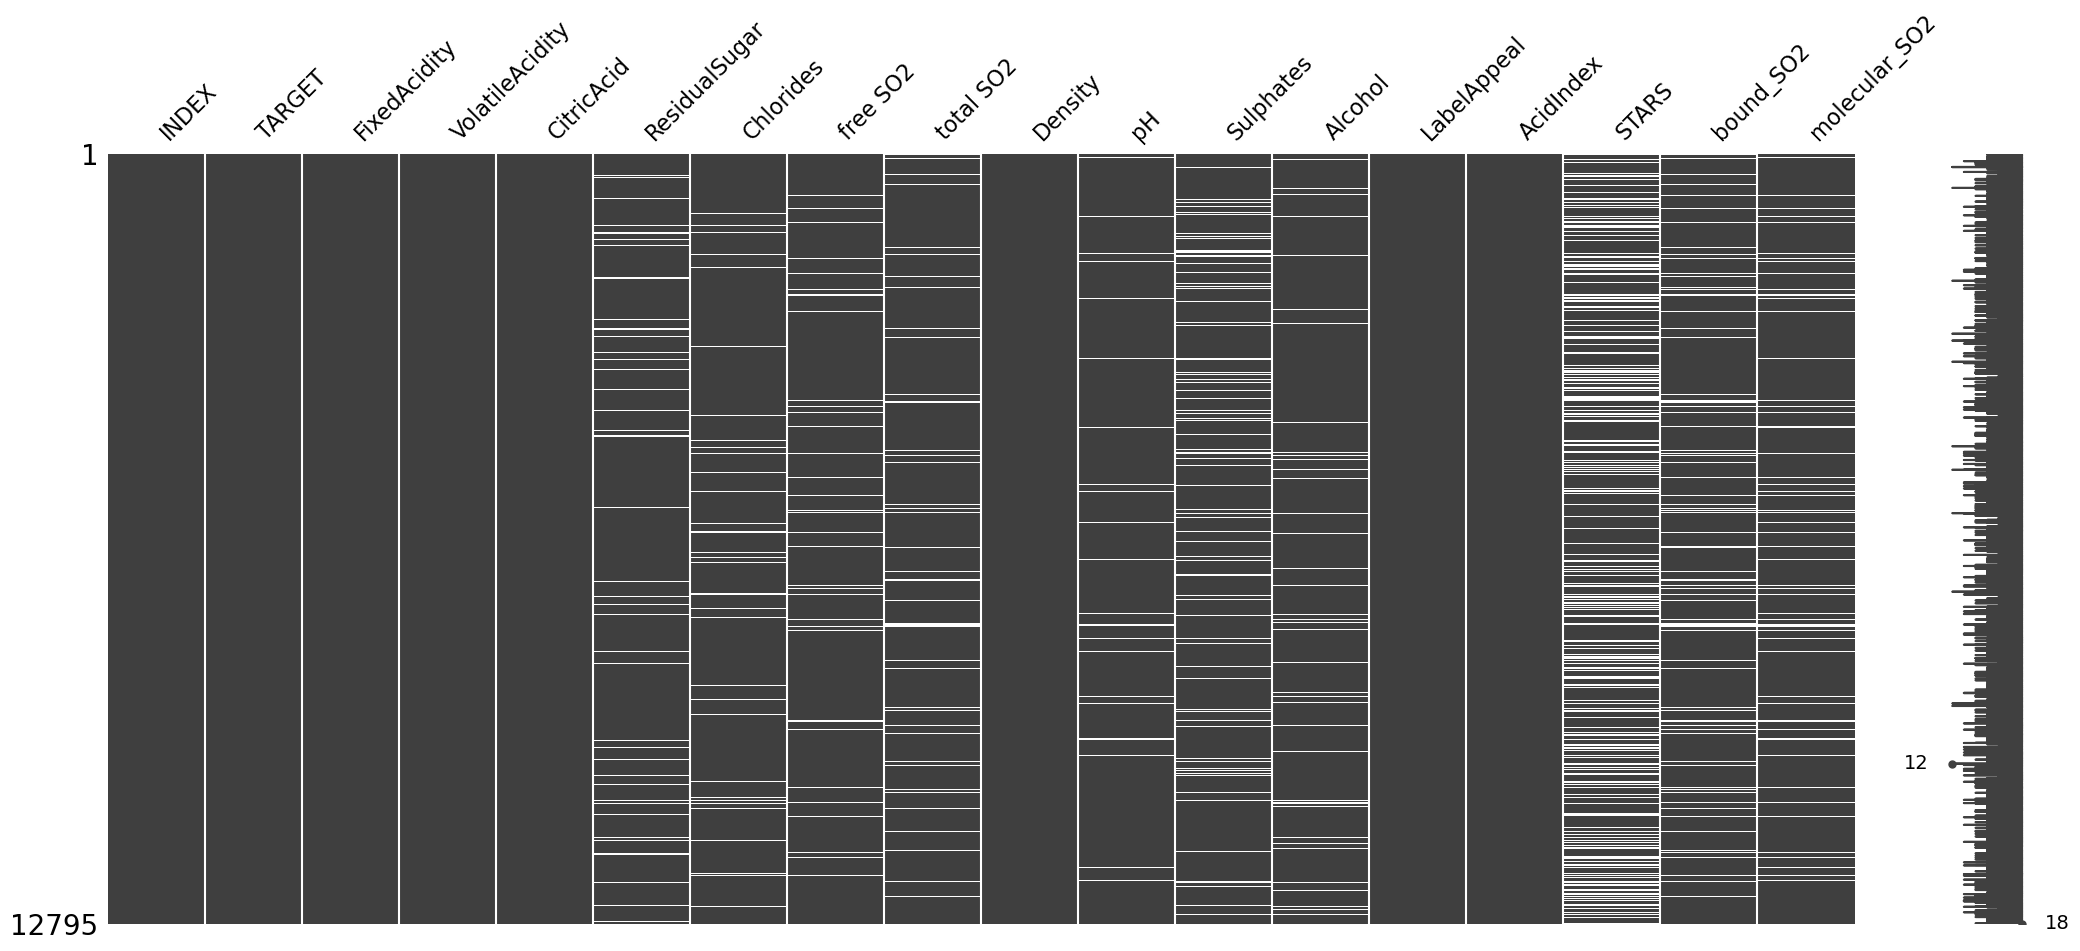

In [12]:
msno.matrix(wine_df)
plt.show()

From the above figure we can clearly see the density of the missing data. Columns like Sulphates and STARS has higher number of missing data

<Axes: >

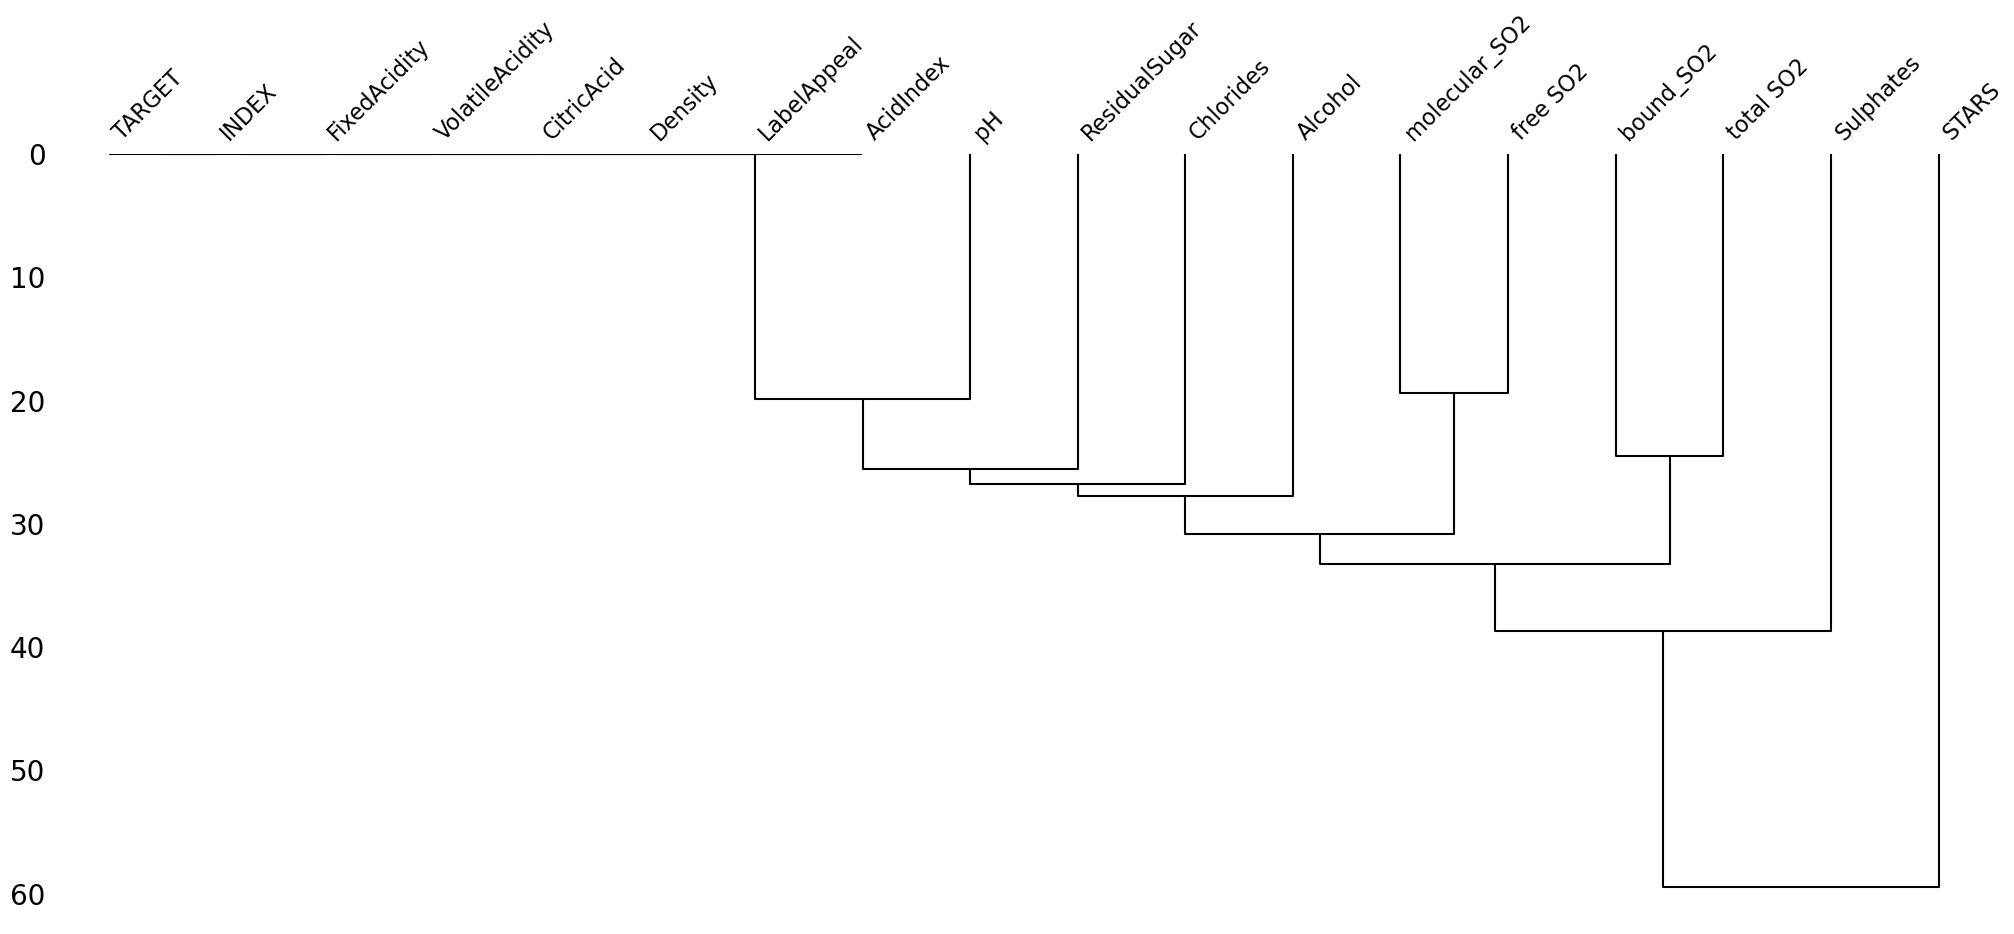

In [13]:
msno.dendrogram(wine_df)

We can see from the above figure that large portion of 'STARS' is missing

In [14]:
# Data Distribution
# Preparing numerical and categorical column groups

# Remove 'Unnamed: 0' and 'Index' from numeric_cols
numeric_cols = [col for col in wine_df.columns if col not in ['STARS', 'LabelAppeal']]

categorical_cols = ['STARS', 'LabelAppeal']

In [22]:

## Function to show plots
def plot(df, numeric_cols):
  """Generate histogram and box plot for a given numeric attribute.

  Args:
    wine_df: A Pandas DataFrame.
    numeric_cols: The name of the numeric attribute to plot.
  """

  fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True,dpi=100)

  # Histogram
  sns.histplot(ax=axes[0], x=df[numeric_cols], kde=True)
  axes[0].set_title('Histogram of {}'.format(numeric_cols))
  axes[0].set_xlabel(numeric_cols)

  # Box plot
  sns.boxenplot(ax=axes[1], x=df[numeric_cols])
  axes[1].set_title('Box Plot of {}'.format(numeric_cols))
  axes[1].set_ylabel('Count')

  # Tight layout
  plt.tight_layout()

  # Show the plot
  plt.show()

##Skewness distribution fucntion

def plot_skewness_distribution(df, col_name, figsize=(10, 5),dpi=100):
  """Plots the skewness distribution of a single column in a DataFrame, without axes.

  Args:
    df: A Pandas DataFrame.
    col_name: The name of the column to plot.
    figsize: The figure size.

  Returns:
    None.
  """

  # Create a figure
  fig = plt.figure(figsize=figsize)

  # Plot the skewness distribution
  sns.kdeplot(data=df, x=col_name)

  # Set the title and labels
  plt.title(f"Skewness Plot - {col_name}")
  plt.xlabel(col_name)
  plt.ylabel("Density")

  # Add a vertical line at the mean and median
  plt.axvline(df[col_name].mean(), color='red', linestyle='--', label='Mean')
  plt.axvline(df[col_name].median(), color='green', linestyle='--', label='Median')

  # Add a legend
  plt.legend()

  # Display the plot
  plt.show()

## categorical plot

def eda_cat_plot(df, col):
    '''Generate count plot for a given categorical attribute.'''
    plt.figure(figsize = (6,4))
    
    plt.title('Count of ' + col)
    sns.countplot(x = col, data = df)
    
    plt.tight_layout()
    plt.show()


## Function to show diagrams of new and old datas

 
def eda_modify(df_old, df_new, col):
  """Compares before-and-after histograms, box plots, and skewness distribution plots for a modified numeric attribute.

  Args:
    df_old: A Pandas DataFrame containing the old values of the attribute.
    df_new: A Pandas DataFrame containing the new values of the attribute.
    col: The name of the attribute to compare.

  Returns:
    None.
  """

  # Create a figure
  fig = plt.figure(figsize=(15, 10),dpi=150)

  # Plot the old histogram and box plot
  plt.subplot(3, 2, 1)
  plt.title(f"Old: {col}")
  sns.histplot(x=df_old[col], kde=True)
  plt.subplot(3, 2, 2)
  sns.boxenplot(x=df_old[col])

  # Plot the new histogram and box plot
  plt.subplot(3, 2, 3)
  plt.title(f"New: {col}")
  sns.histplot(x=df_new[col], kde=True)
  plt.subplot(3, 2, 4)
  sns.boxenplot(x=df_new[col])

  # Plot the old skewness distribution
  plt.subplot(3, 2, 5)
  sns.kdeplot(data=df_old, x=col, legend=False)
  plt.title(f"Old: Skewness Plot - {col}")
  plt.axvline(df_old[col].mean(), color='red', linestyle='--', label='Mean')
  plt.axvline(df_old[col].median(), color='green', linestyle='--', label='Median')
  plt.legend()

  # Plot the new skewness distribution
  plt.subplot(3, 2, 6)
  sns.kdeplot(data=df_new, x=col, legend=False)
  plt.title(f"New: Skewness Plot - {col}")
  plt.axvline(df_new[col].mean(), color='red', linestyle='--', label='Mean')
  plt.axvline(df_new[col].median(), color='green', linestyle='--', label='Median')
  plt.legend()

  # Adjust the layout
  plt.tight_layout()

  # Display the plot
  plt.show()

  

In [23]:
wine_df

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0          1       3           3.2            1.160        0.98   
1          2       3           4.5            0.160        0.81   
2          4       5           7.1            2.640        0.88   
3          5       3           5.7            0.385        0.04   
4          6       4           8.0            0.330        1.26   
...      ...     ...           ...              ...         ...   
12790  16120       0           5.0            0.790        2.01   
12791  16123       5           8.9            0.470        0.29   
12792  16127       4           6.0            0.170        1.10   
12793  16128       3           7.7            0.320        0.12   
12794  16129       4           5.2            0.040        0.81   

       ResidualSugar  Chlorides  free SO2  total SO2  Density    pH  \
0               54.2      0.567       NaN      268.0  0.99280  3.33   
1               26.1      0.425      15.0      327.0  1.02792  3.38   
2               14.8      0.037     214.0      142.0  0.99518  3.12   
3               18.8      0.425      22.0      115.0  0.99640  2.24   
4                9.4        NaN     167.0      108.0  0.99457  3.12   
...              ...        ...       ...        ...      ...   ...   
12790            5.0      0.043      17.0      101.0  1.01077  3.39   
12791           84.9      0.259      54.0        NaN  0.99518  4.46   
12792           37.0      0.078      25.0      108.0  0.99076  3.25   
12793            NaN      0.029      26.0      274.0  0.99060  3.97   
12794           52.7        NaN     106.0      242.0  0.99454  3.94   

       Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  bound_SO2  \
0           0.59      9.9            0          8    2.0        NaN   
1           0.70      NaN           -1          7    3.0      312.0   
2           0.48     22.0           -1          8    3.0      -72.0   
3           1.83      6.2           -1          6    1.0       93.0   
4           1.77     13.7            0          9    2.0      -59.0   
...          ...      ...          ...        ...    ...        ...   
12790       0.57      4.9            1          5    NaN       84.0   
12791       1.20      NaN           -1          8    2.0        NaN   
12792        NaN     12.3            0          6    2.0       83.0   
12793       0.62     11.0           -1          6    2.0      248.0   
12794       0.12      9.9            0          7    2.0      136.0   

       molecular_SO2  
0                NaN  
1           0.393148  
2           9.991885  
3           5.959581  
4           7.797406  
...              ...  
12790       0.435686  
12791       0.120621  
12792       0.875893  
12793       0.178640  
12794       0.780007  

[12795 rows x 18 columns]

In [24]:
numerics = ['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
            'ResidualSugar', 'Chlorides','bound_SO2','molecular_SO2','Density', 'pH', 'Sulphates', 'Alcohol', 'AcidIndex']

## Analysing the numerical columns

### Alcohol

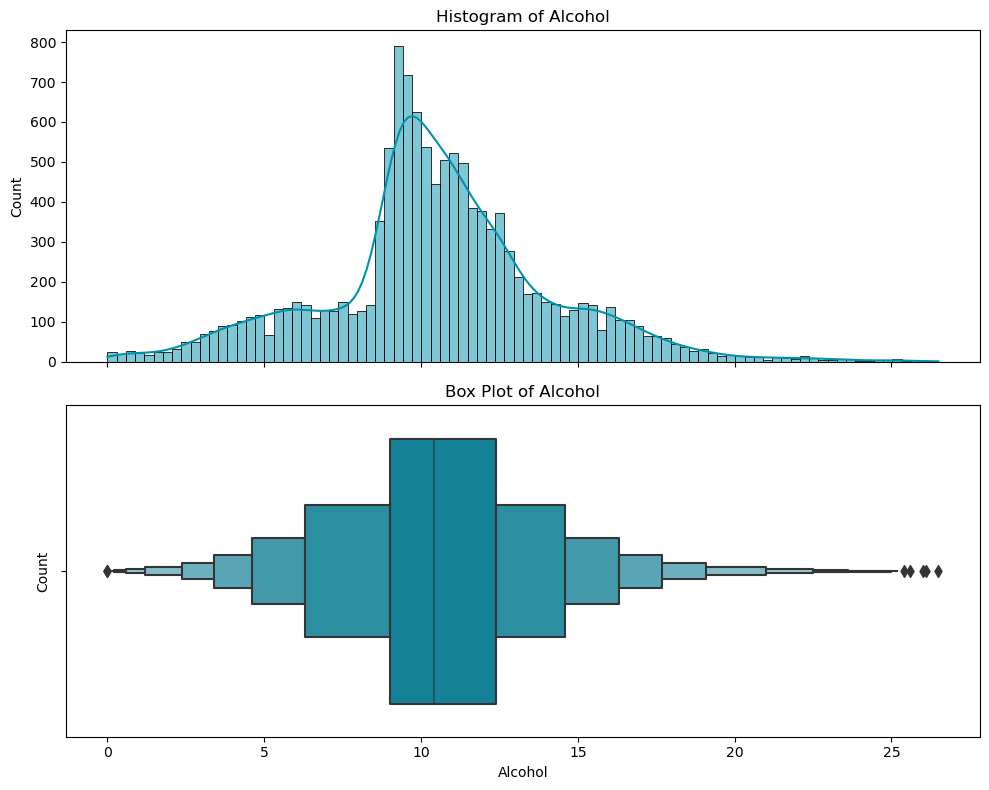

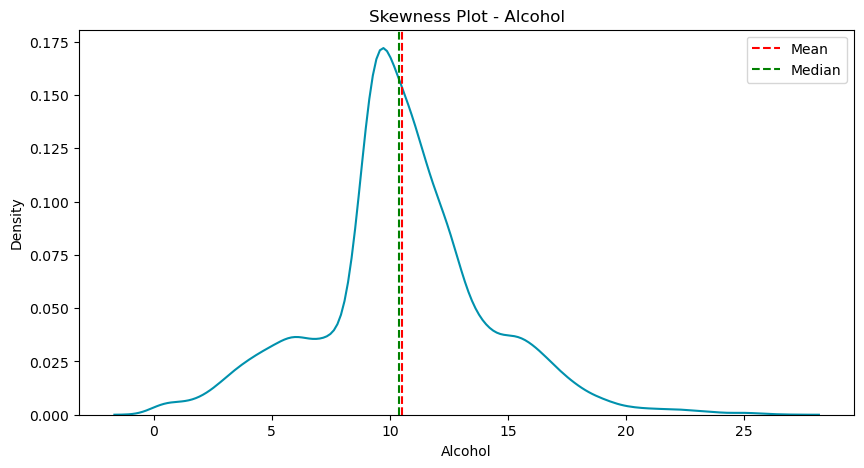

In [25]:
plot(wine_df,'Alcohol')
plot_skewness_distribution(wine_df,'Alcohol')



The histogram shows that the majority of wines have an alcohol content between 10% and 15%, with a smaller number of wines having an alcohol content above 15% or below 10%. 
The box plot shows the median alcohol content is 12.5%, with the 25th percentile being 11.25% and the 75th percentile being 13.75%. The whiskers of the box plot show that there are a few wines with alcohol contents below 10% or above 15%. 
The skewness plot shows that alcohol consumption is a right-skewed distribution with a few outliers. 

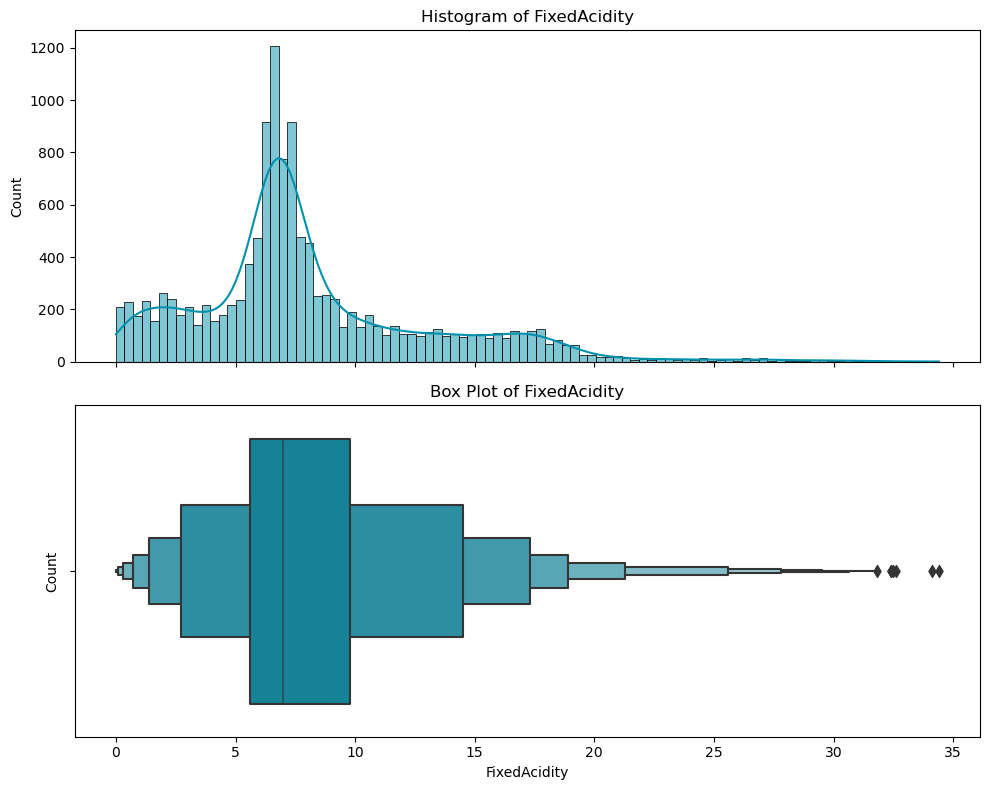

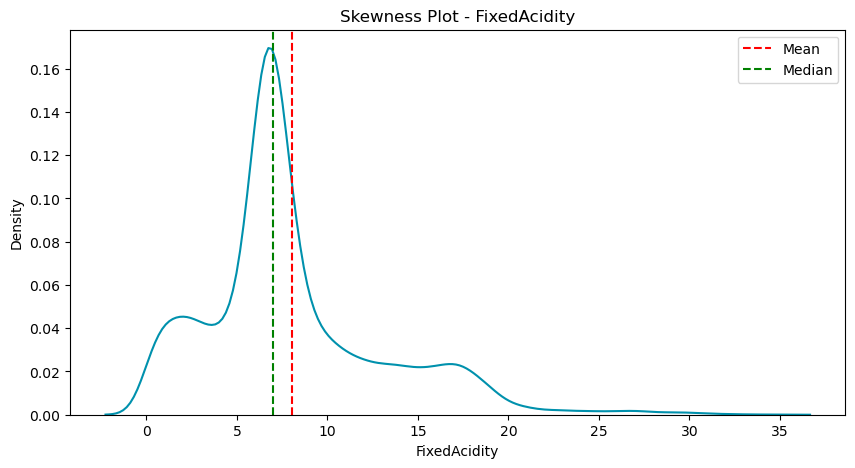

In [26]:
plot(wine_df,'FixedAcidity')
plot_skewness_distribution(wine_df,'FixedAcidity')

The box plot and skewness plot show that the distribution of fixed acidity in wine is right-skewed with a median fixed acidity of 6.8 g/L. This means that most wines have a relatively low fixed acidity, with a smaller number of wines having a higher fixed acidity.

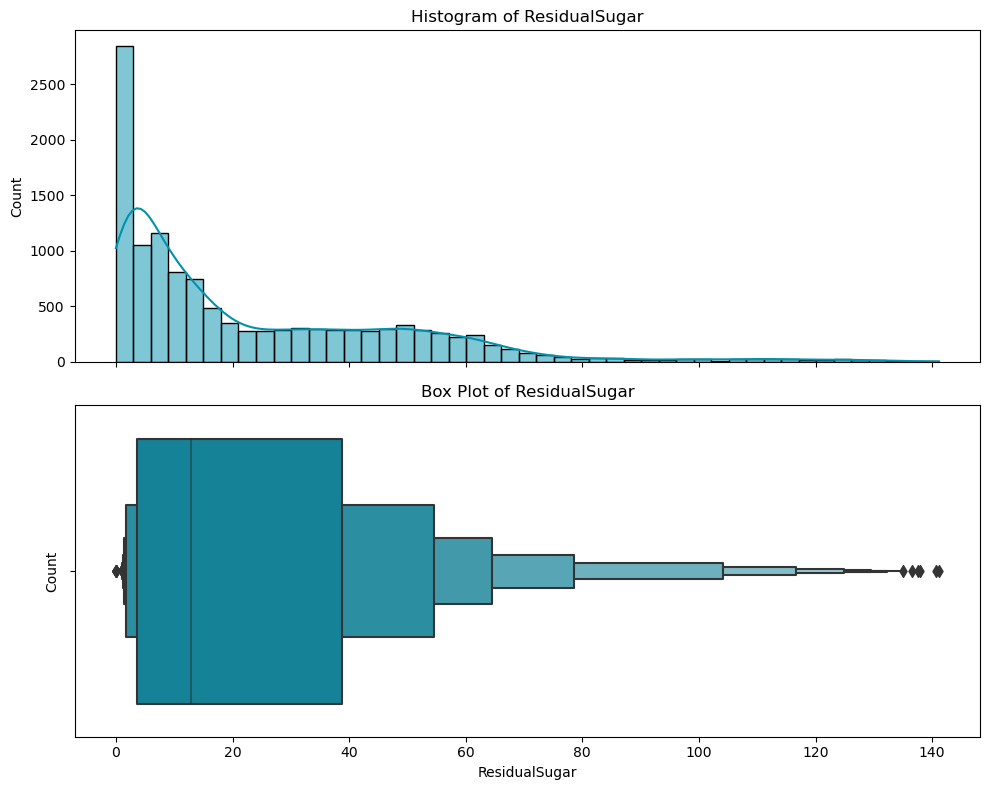

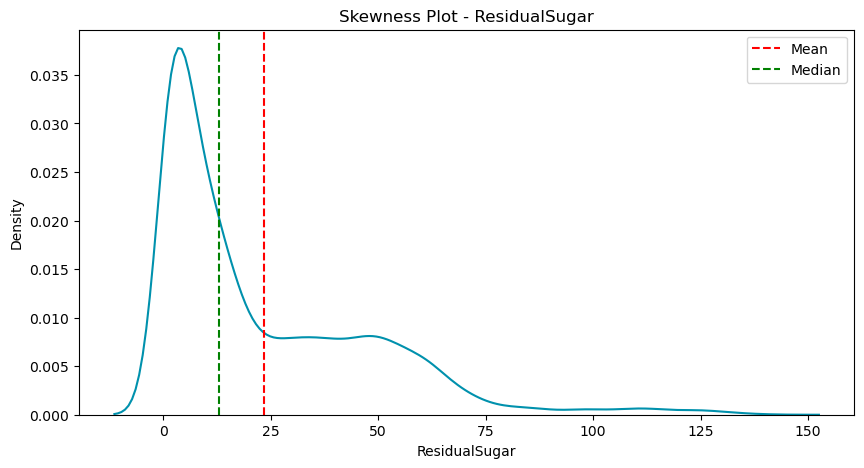

In [27]:
plot(wine_df,'ResidualSugar')
plot_skewness_distribution(wine_df,'ResidualSugar')

The histogram shows that the distribution of residual sugar is right-skewed. This means that most wines have a relatively low residual sugar content, with a smaller number of wines having a higher residual sugar content. The median residual sugar content is approximately 2.2 grams per liter, while the mean residual sugar content is approximately 2.5 grams per liter.

The box plot shows that the middle 50% of wines have a residual sugar content between approximately 1.9 and 2.6 grams per liter. The whiskers of the box plot show that there are a few wines with residual sugar contents below approximately 1.2 grams per liter or above approximately 15.5 grams per liter.

### TARGET

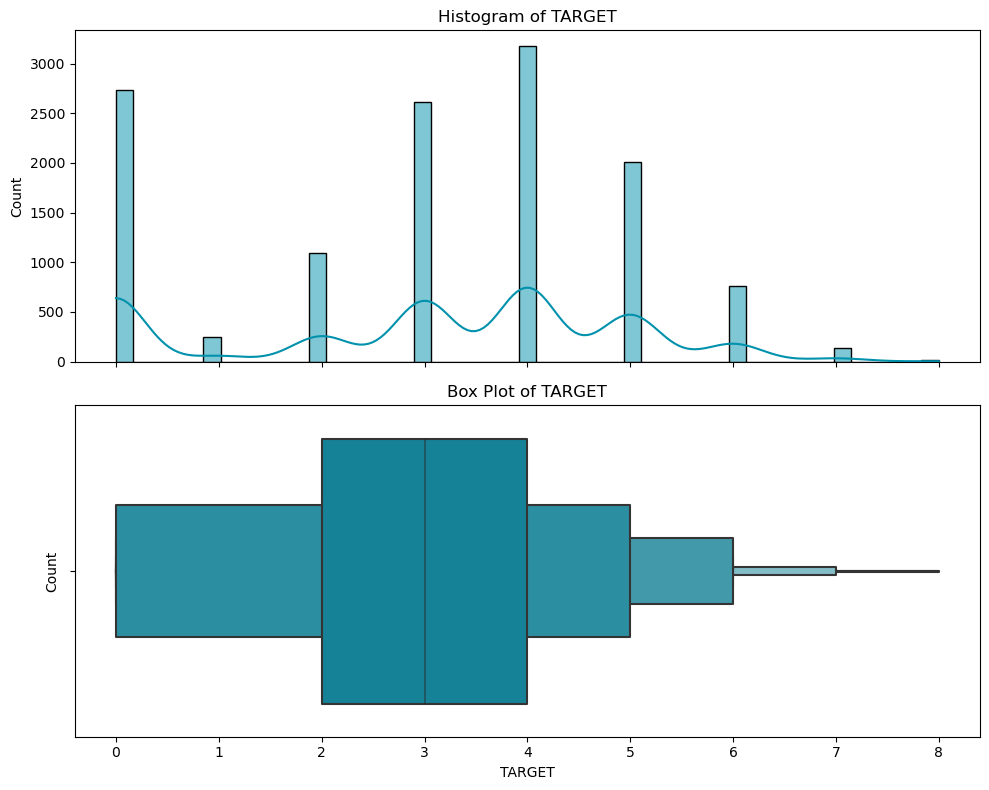

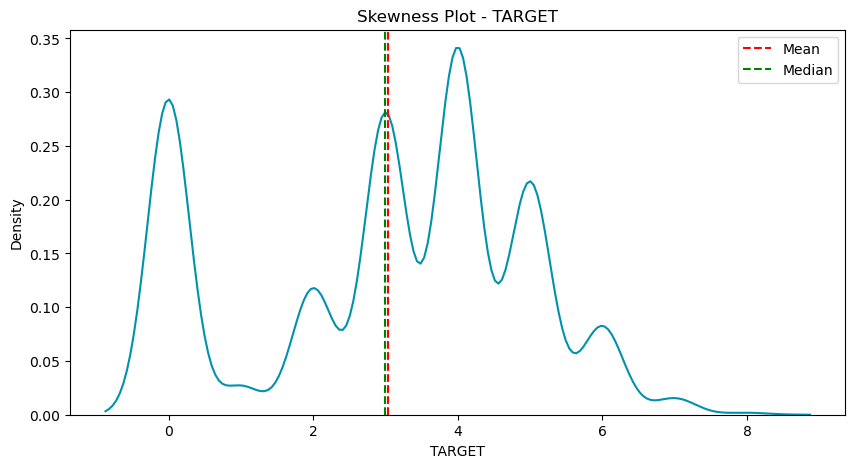

In [28]:
plot(wine_df,'TARGET')
plot_skewness_distribution(wine_df,'TARGET')

The above histogram is effectively left skewed. This variable has no missing data.

### Sulphates

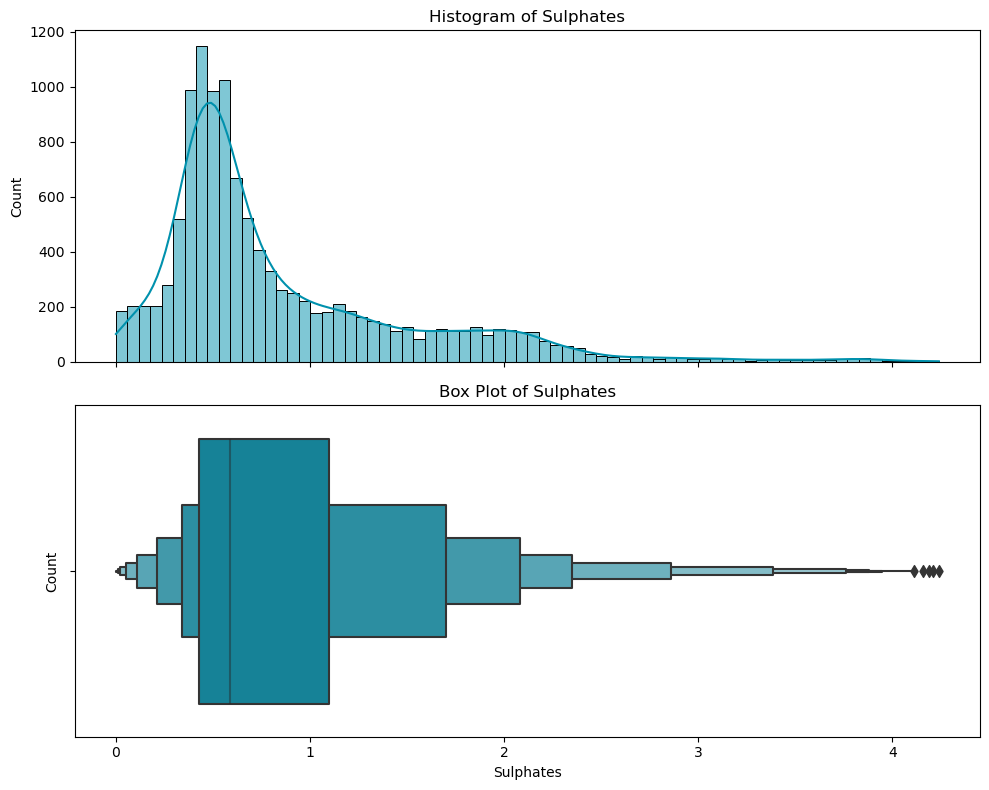

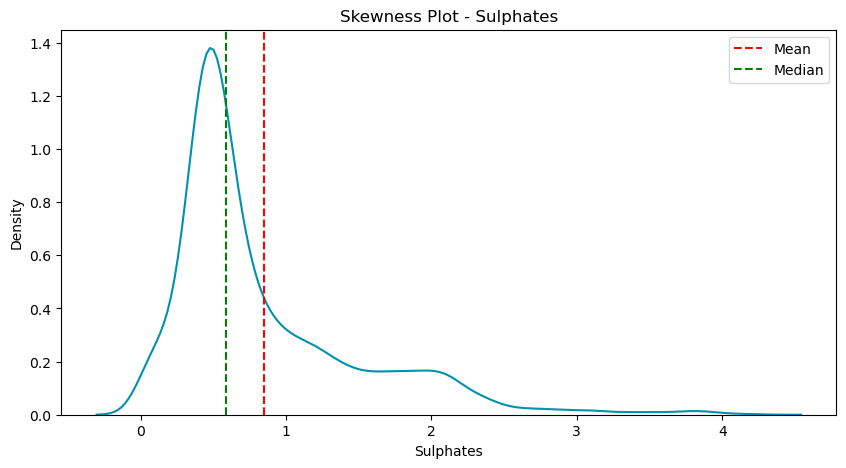

In [29]:
plot(wine_df,'Sulphates')
plot_skewness_distribution(wine_df,'Sulphates')

Sulphates also demonstrates a right-skewed distribution and has a significant amount of missing data, approximately around 10%.

### bound_SO2

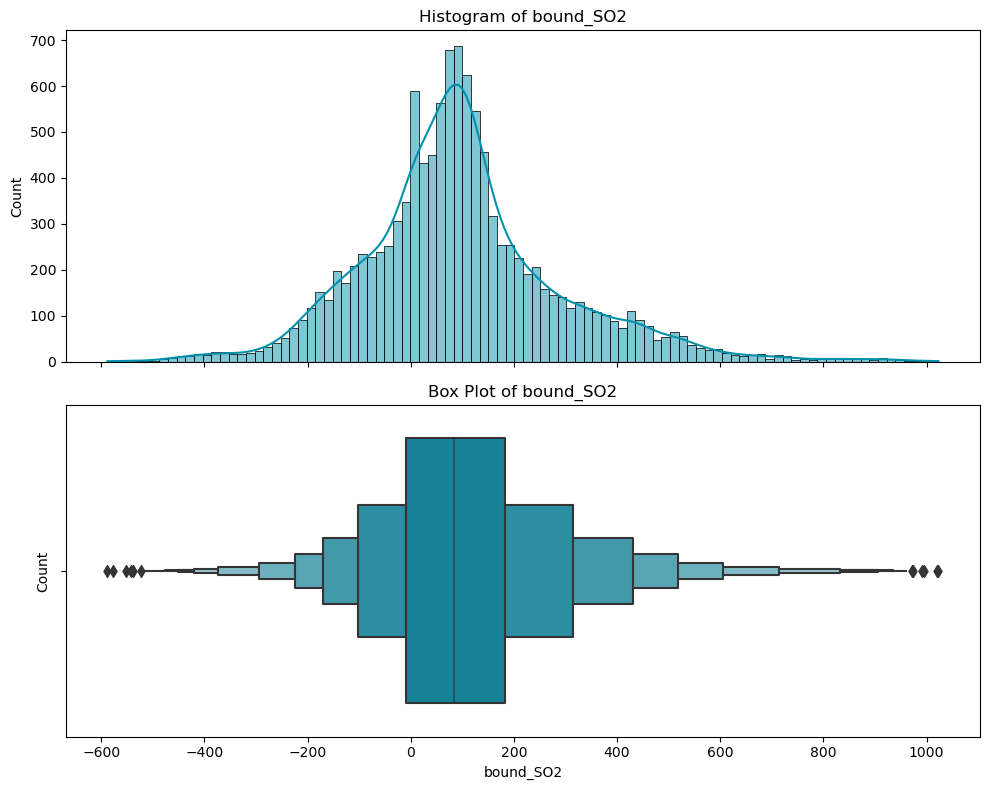

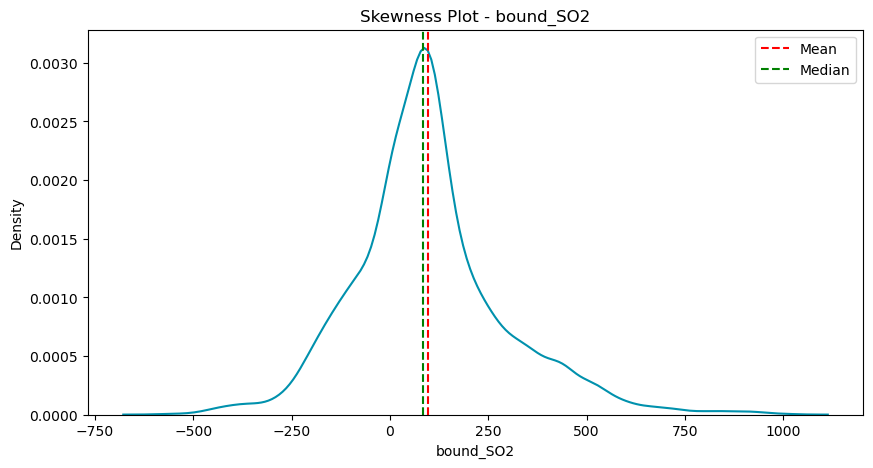

In [30]:
plot(wine_df,'bound_SO2')
plot_skewness_distribution(wine_df,'bound_SO2')

The distribution is non-normal with a narrow peak flanked by a broad plateau. This means that most of the values are concentrated around a single value, but there are a few values that are much higher or lower.

### molecular_SO2

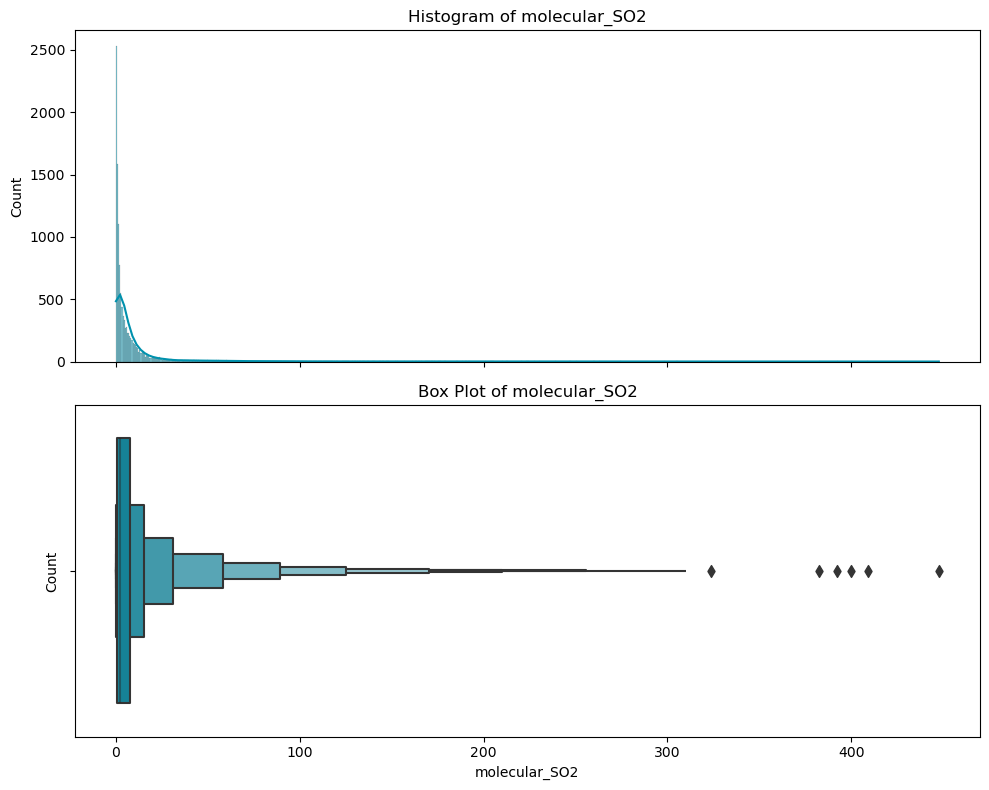

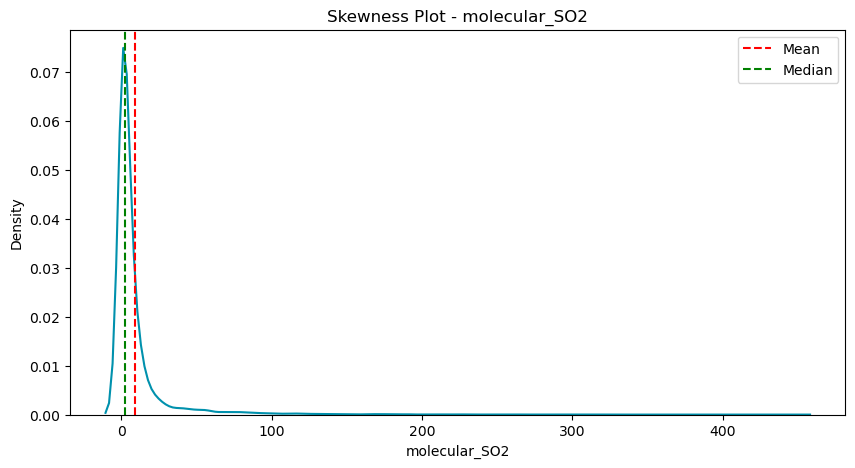

In [31]:
plot(wine_df,'molecular_SO2')
plot_skewness_distribution(wine_df,'molecular_SO2')

We can see that molecular_SO2 is heavily right skewed.

### Chlorides

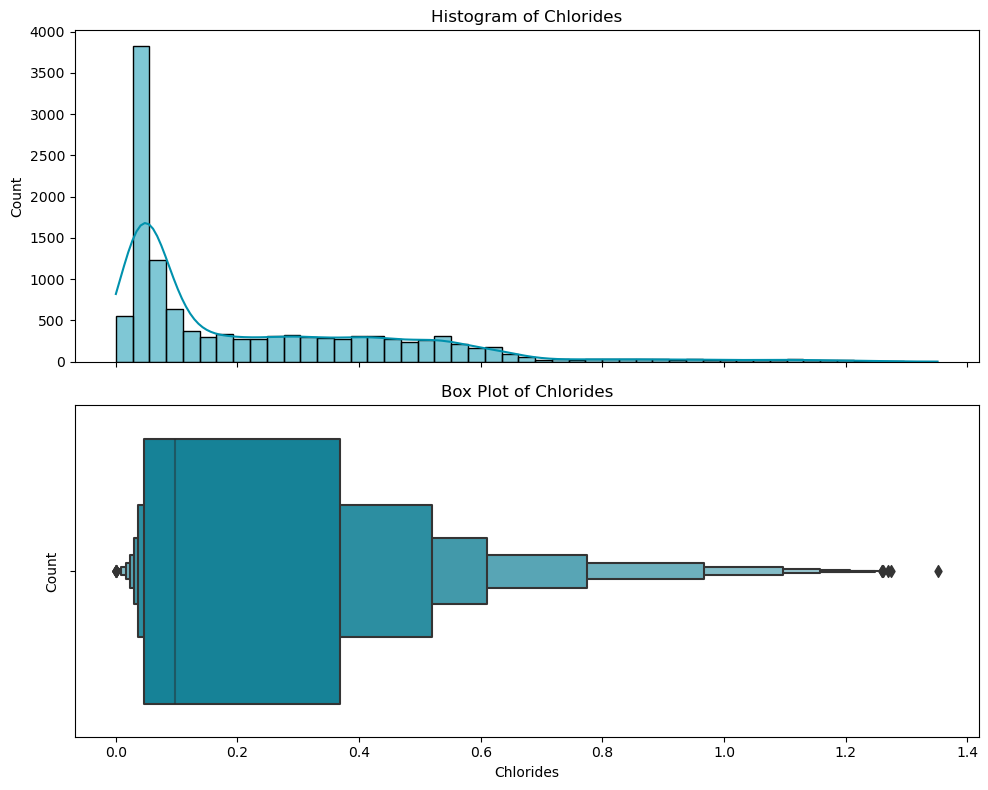

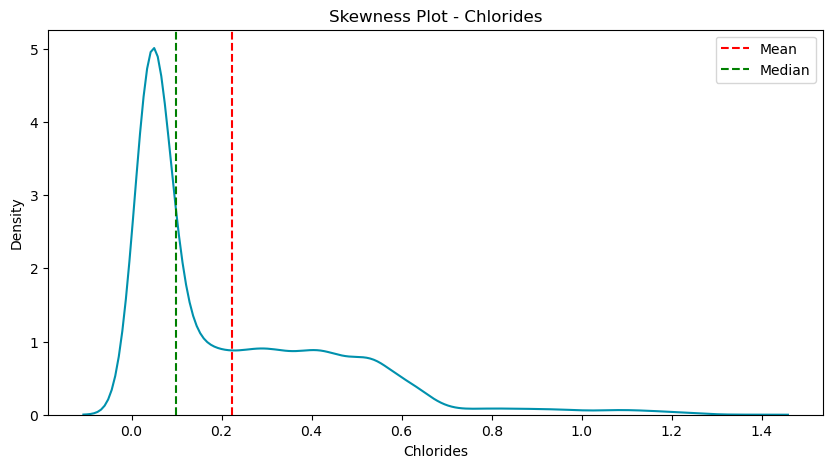

In [32]:
plot(wine_df,'Chlorides')
plot_skewness_distribution(wine_df,'Chlorides')

Chlorides is a feature that is very skewed, with most of its values concentrated in a narrow range around 0.2, but a small number of values that are much higher. This means that most of the data points for this feature have similar values, but there are a few data points that are very different. This type of distribution is often called a long-tailed distribution.

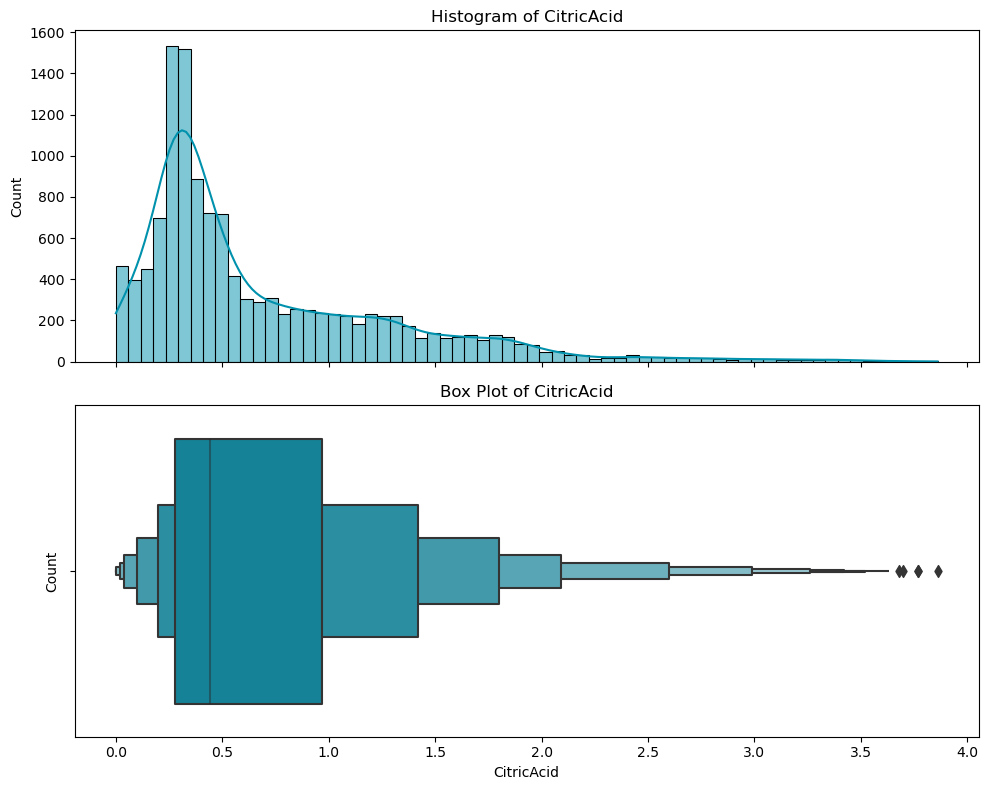

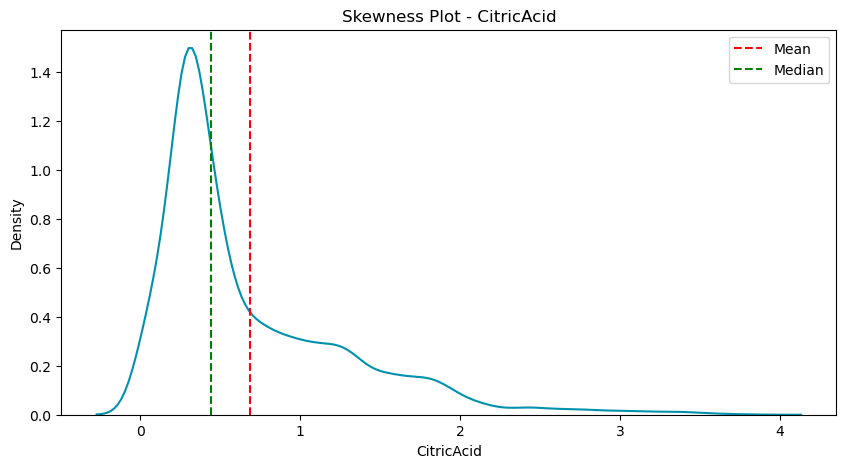

In [33]:
plot(wine_df,'CitricAcid')
plot_skewness_distribution(wine_df,'CitricAcid')

CitricAcid has a heavily skewed distribution with a fat right tail, which means that most of the values are concentrated on the left side of the distribution, but there are a few values that are much higher. This type of distribution is also known as a long-tailed distribution.

### VolatileAcidity

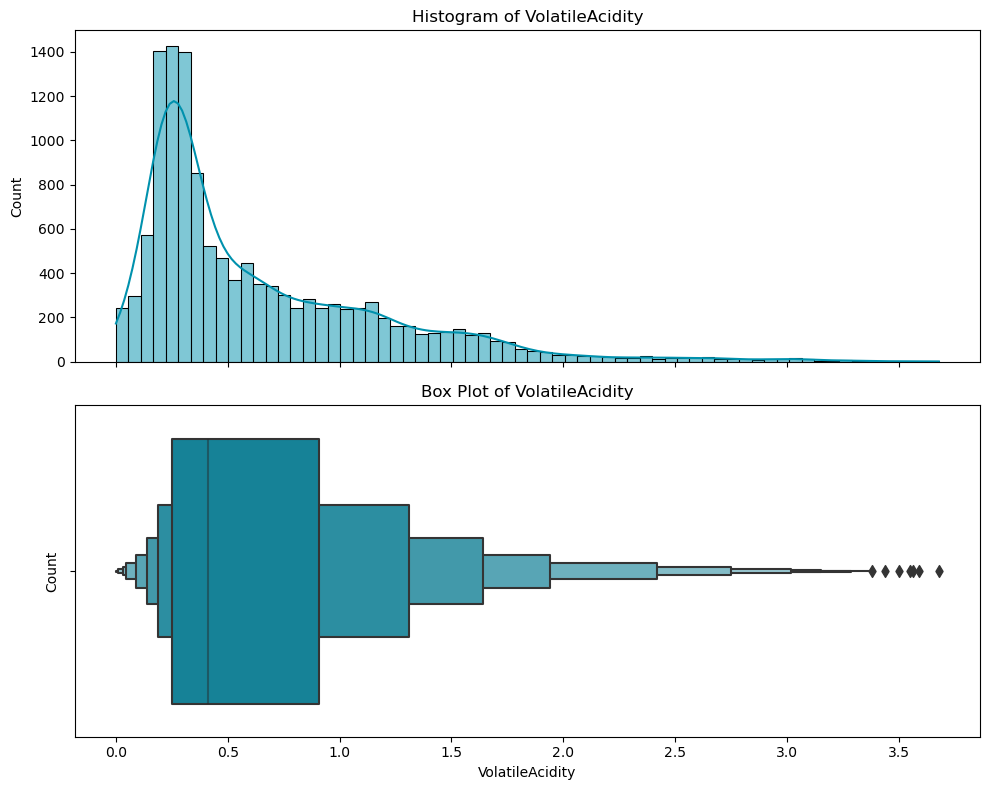

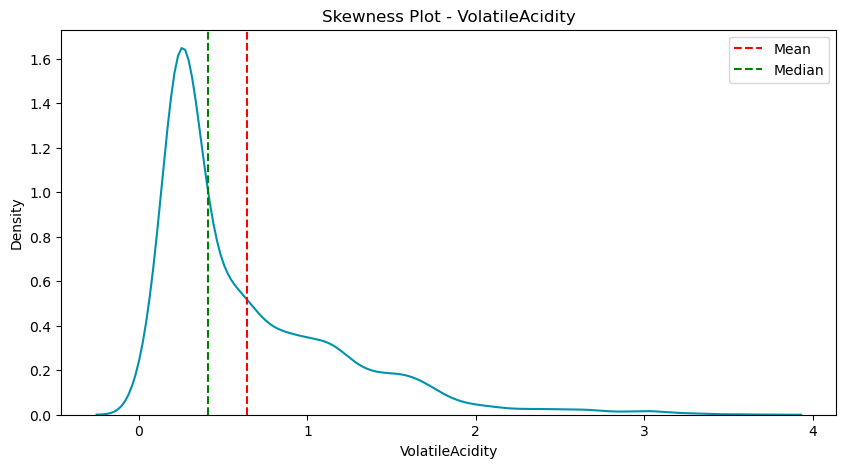

In [34]:
plot(wine_df,'VolatileAcidity')
plot_skewness_distribution(wine_df,'VolatileAcidity')

VolatileAcidity is another attribute that displays a strong right-skewed distribution, and it's noteworthy that there are no data gaps or missing values.

### Density

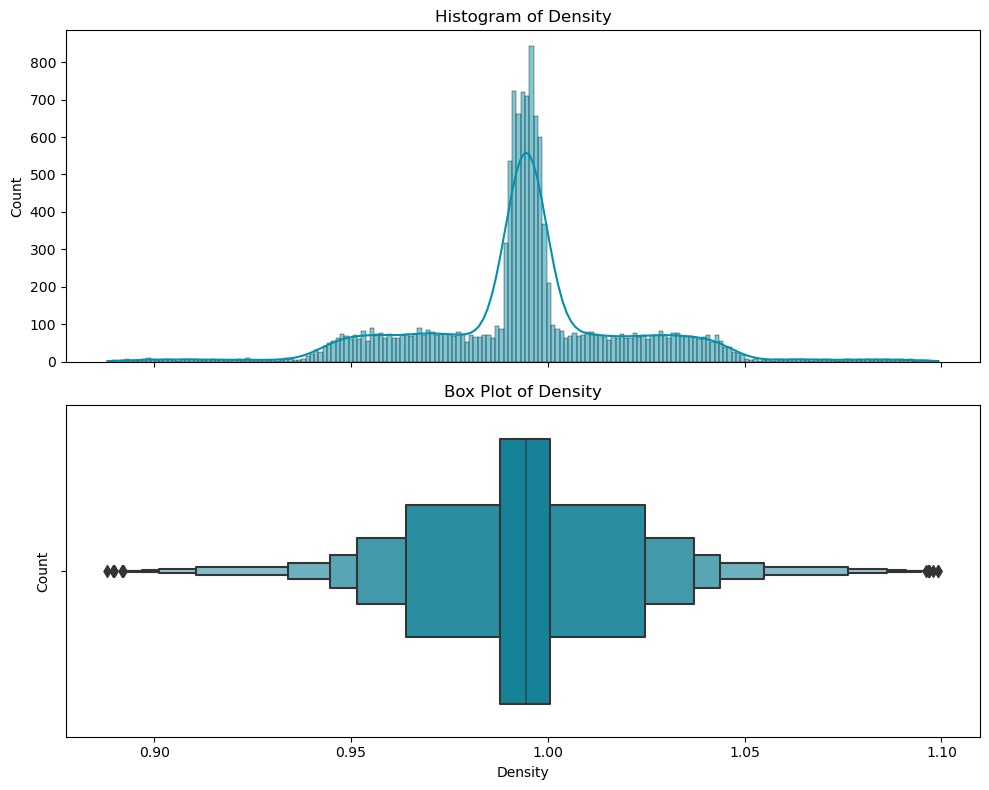

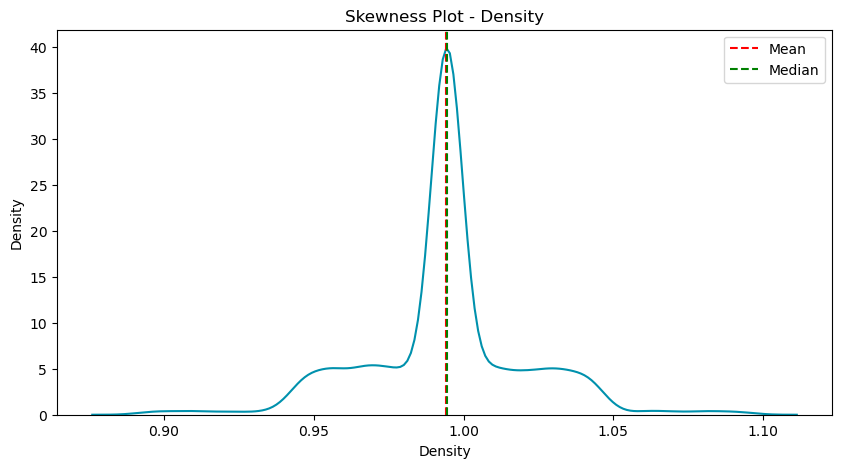

In [35]:
plot(wine_df,'Density')
plot_skewness_distribution(wine_df,'Density')

The  density distribution is not symmetrical, but it is also not normally distributed. The distribution has a very narrow but sharp peak surrounded by a plateau, which means that most of the values are concentrated around a single value, but there are a few values that are much higher or lower.

### pH

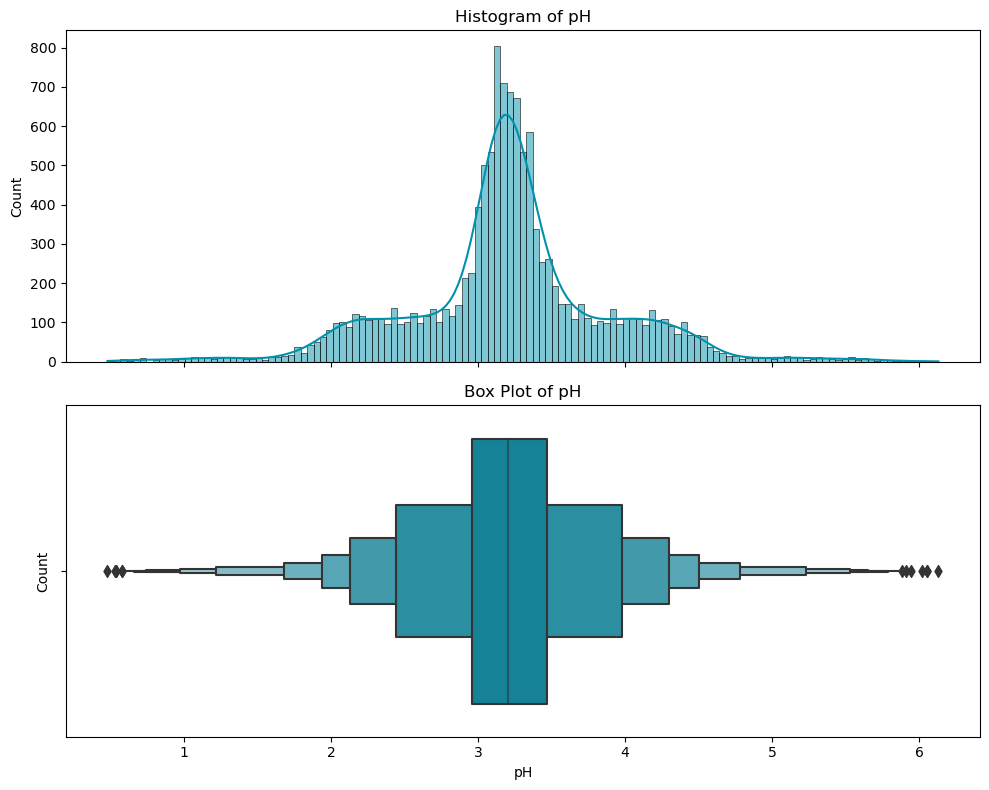

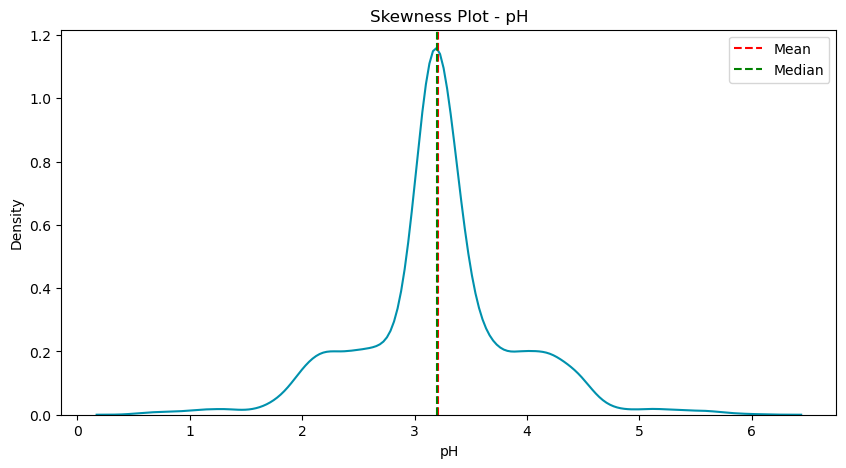

In [36]:
plot(wine_df,'pH')
plot_skewness_distribution(wine_df,'pH')

pH follows a distribution pattern that is not skewed, characterized by a slender peak surrounded by a wide plateau, akin to the distribution seen in the Density attribute. Additionally, there is a minor amount of data that is absent.

### AcidIndex

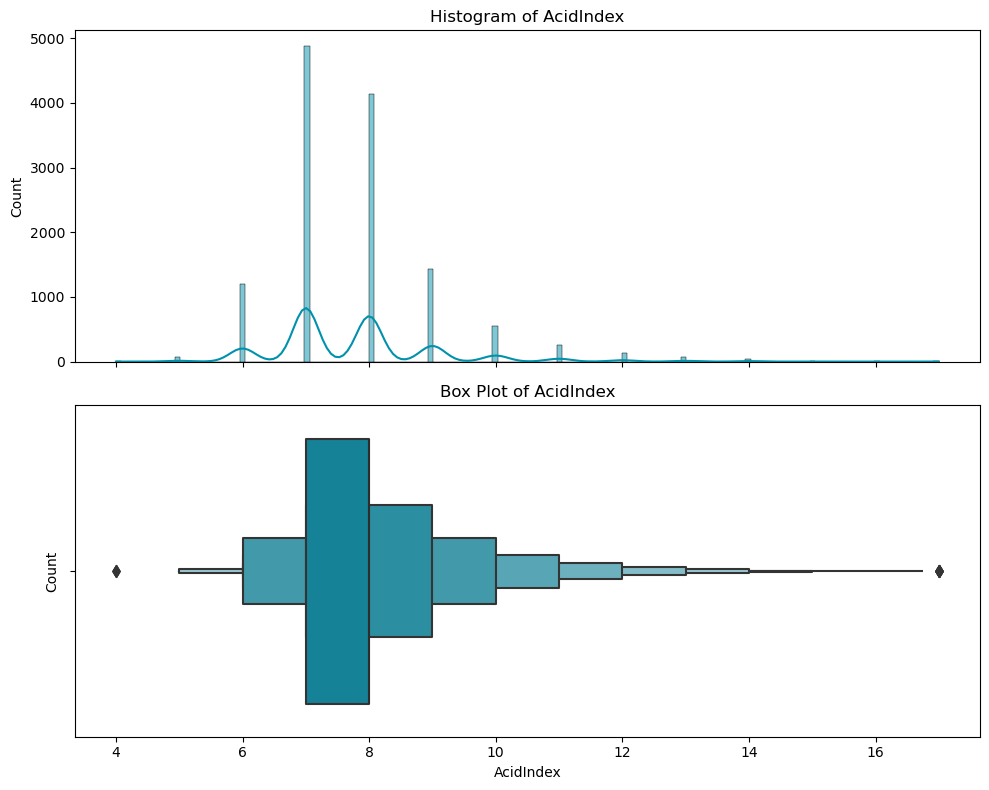

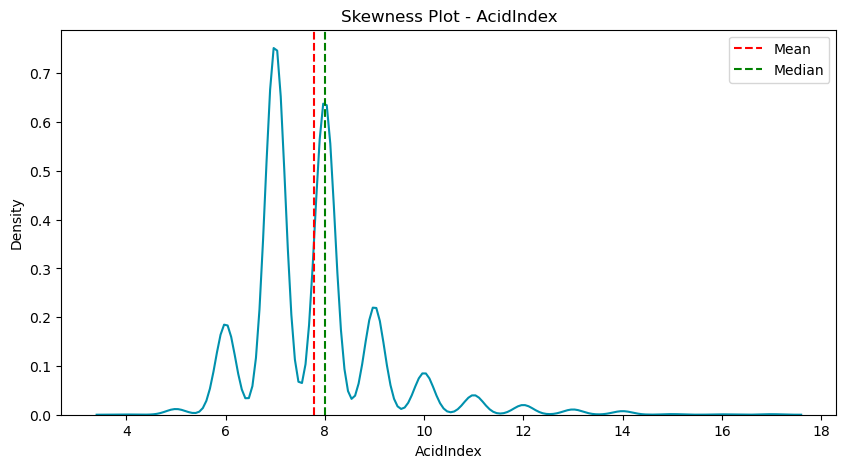

In [37]:
plot(wine_df,'AcidIndex')
plot_skewness_distribution(wine_df,'AcidIndex')

### Categorical variable

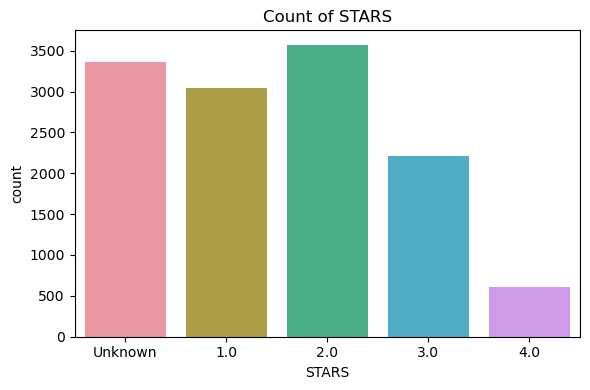

In [38]:
wine_df['STARS'] = wine_df['STARS'].fillna('Unknown').astype(str)
# in pandas we can order categorical data by column as done below
wine_df['STARS'] = pd.Categorical(wine_df['STARS'], ['Unknown','1.0','2.0','3.0','4.0'])
eda_cat_plot(wine_df, 'STARS')


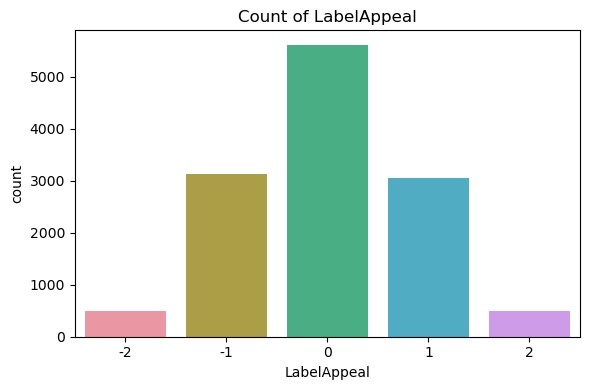

In [39]:
eda_cat_plot(wine_df,'LabelAppeal')

In [40]:
numerics = ['TARGET', 'FixedAcidity', 'VolatileAcidity', 'CitricAcid',
            'ResidualSugar', 'Chlorides','bound_SO2','molecular_SO2','Density', 'pH', 'Sulphates', 'Alcohol', 'AcidIndex']

## Data Preparation & Handling Missing data

#### Filling Missing value with KNN imputation

Before we can use our data for machine learning, we need to fill in any missing values. We use a K-nearest neighbors (KNN) imputation method from the scikit-learn library. We choose to use 10 neighbors instead of the default of 5 neighbors, so that we can incorporate more data from nearby points, even though this may take a little longer to compute. Our dataset is small, so computing power is not a limiting factor.

In [41]:
knn = KNNImputer(n_neighbors = 10)

knn_imput_data = knn.fit_transform(wine_df[numerics])

print(knn_imput_data.shape)

knn_imput_data = pd.DataFrame(knn_imput_data, columns = numerics)

knn_imput_data.head()

(12795, 13)


TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0     3.0           3.2            1.160        0.98           54.2   
1     3.0           4.5            0.160        0.81           26.1   
2     5.0           7.1            2.640        0.88           14.8   
3     3.0           5.7            0.385        0.04           18.8   
4     4.0           8.0            0.330        1.26            9.4   

   Chlorides  bound_SO2  molecular_SO2  Density    pH  Sulphates  Alcohol  \
0     0.5670      106.7       1.924502  0.99280  3.33       0.59     9.90   
1     0.4250      312.0       0.393148  1.02792  3.38       0.70    12.85   
2     0.0370      -72.0       9.991885  0.99518  3.12       0.48    22.00   
3     0.4250       93.0       5.959581  0.99640  2.24       1.83     6.20   
4     0.1671      -59.0       7.797406  0.99457  3.12       1.77    13.70   

   AcidIndex  
0        8.0  
1        7.0  
2        8.0  
3        6.0  
4        9.0

In [42]:
knn_imput_data.isnull().sum()

TARGET             0
FixedAcidity       0
VolatileAcidity    0
CitricAcid         0
ResidualSugar      0
Chlorides          0
bound_SO2          0
molecular_SO2      0
Density            0
pH                 0
Sulphates          0
Alcohol            0
AcidIndex          0
dtype: int64

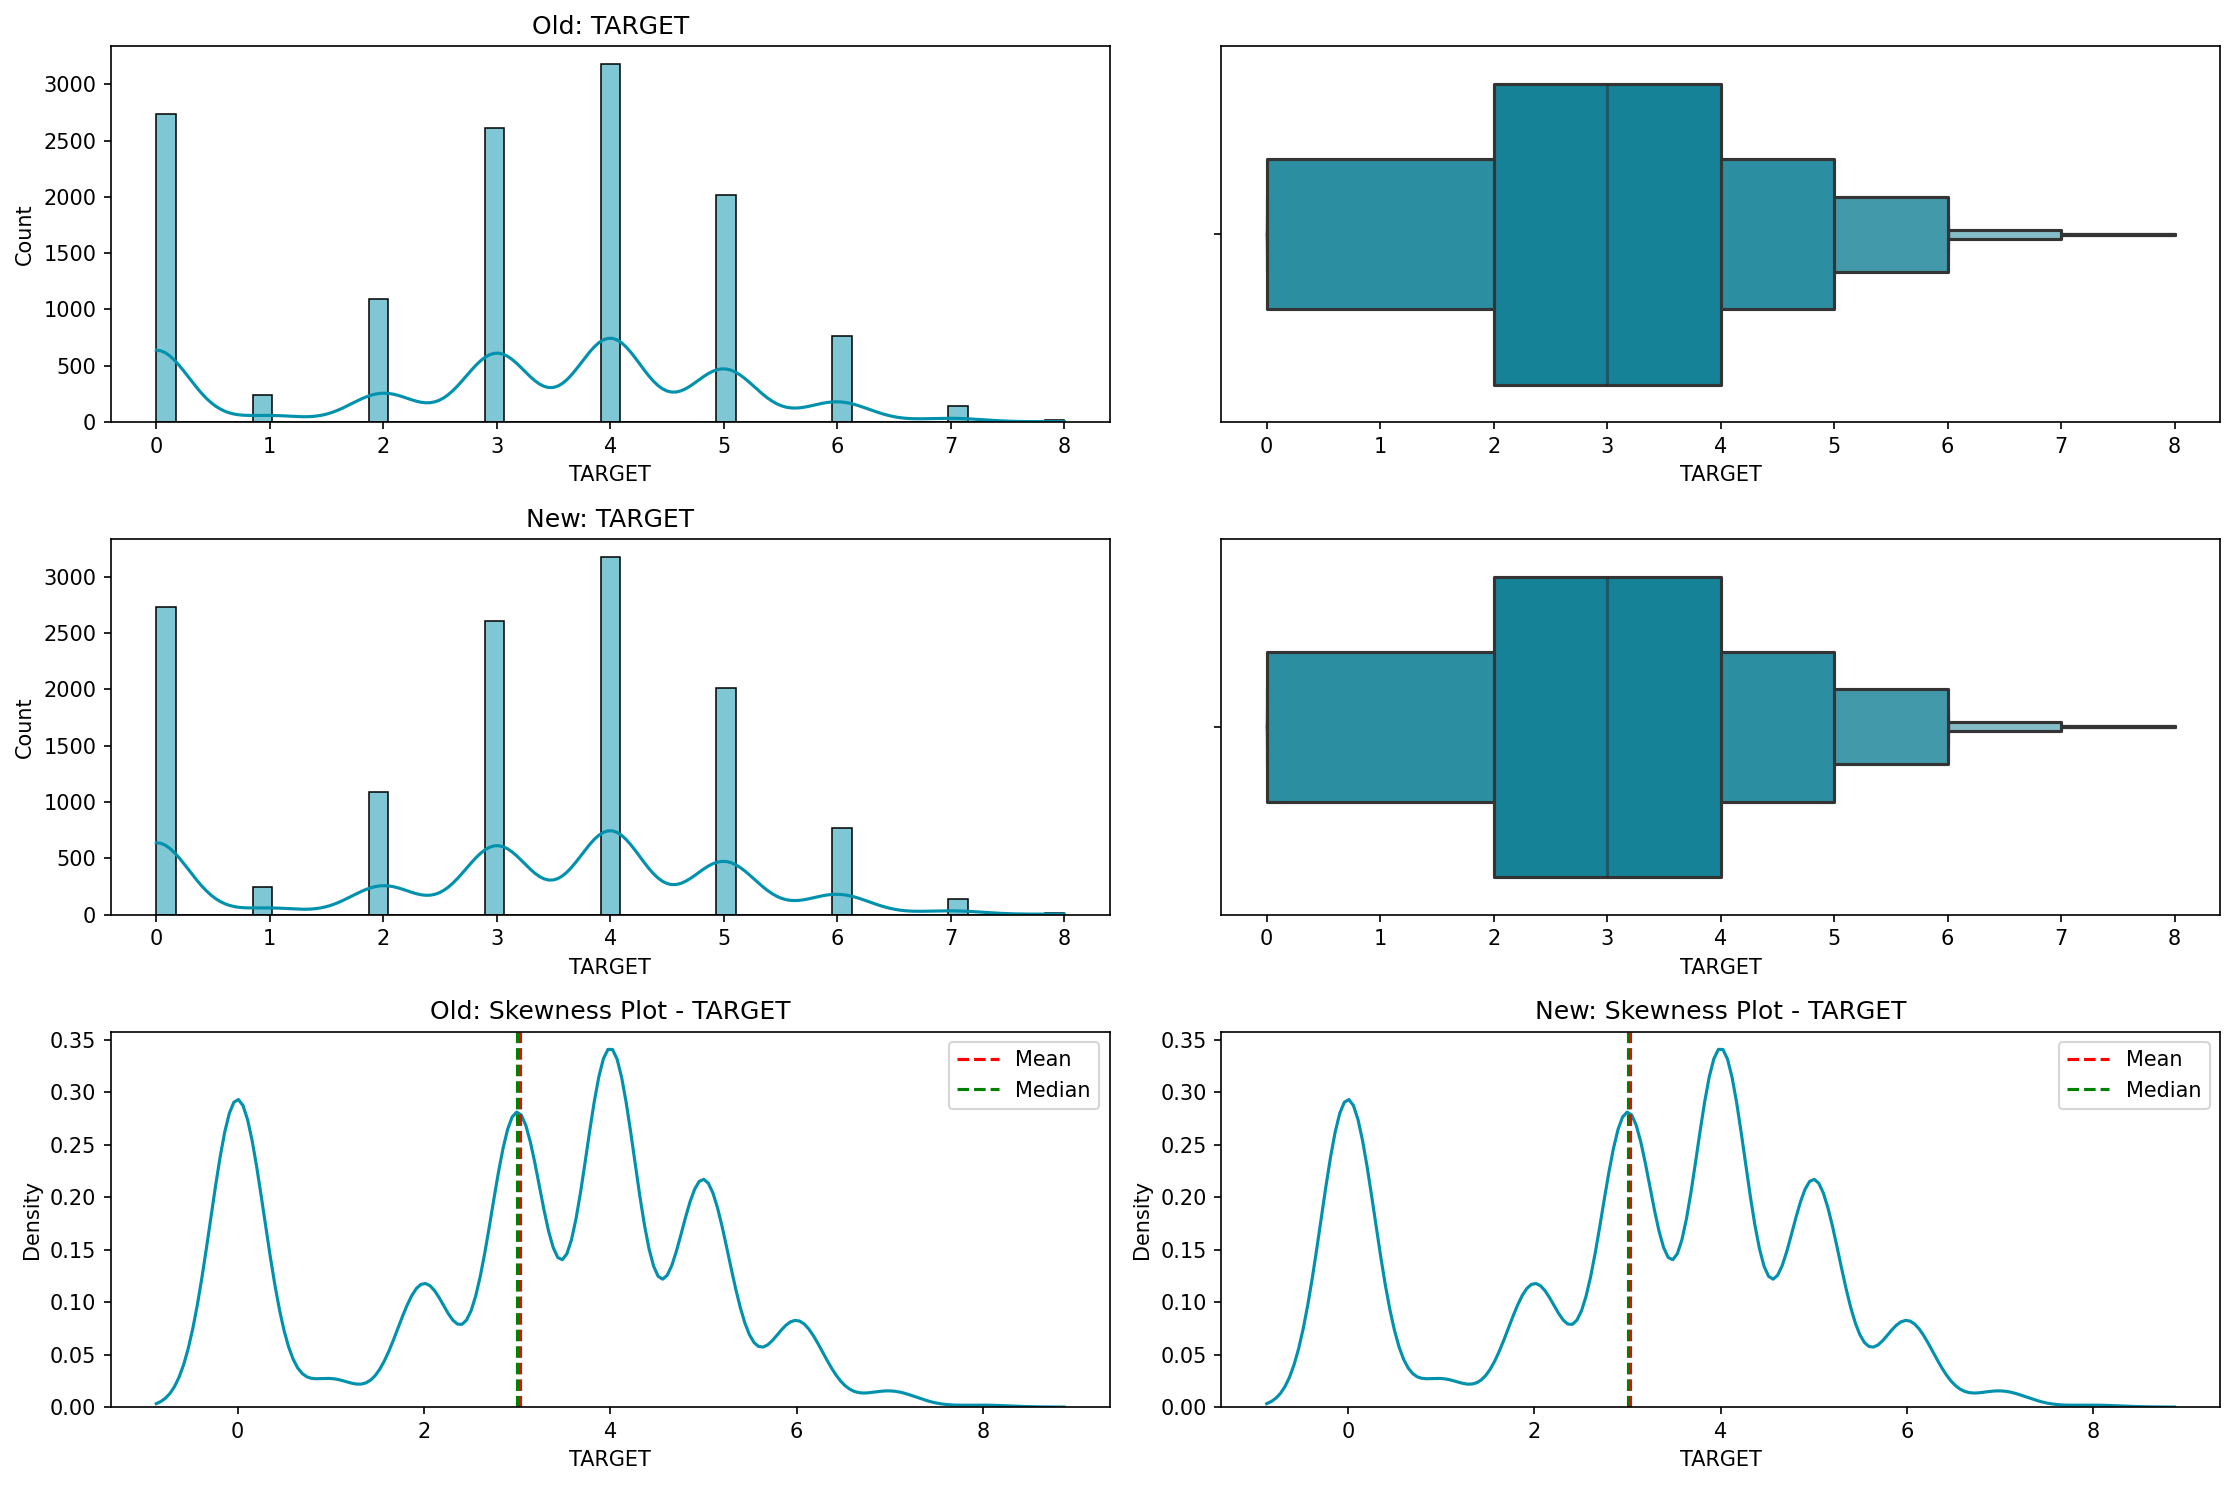

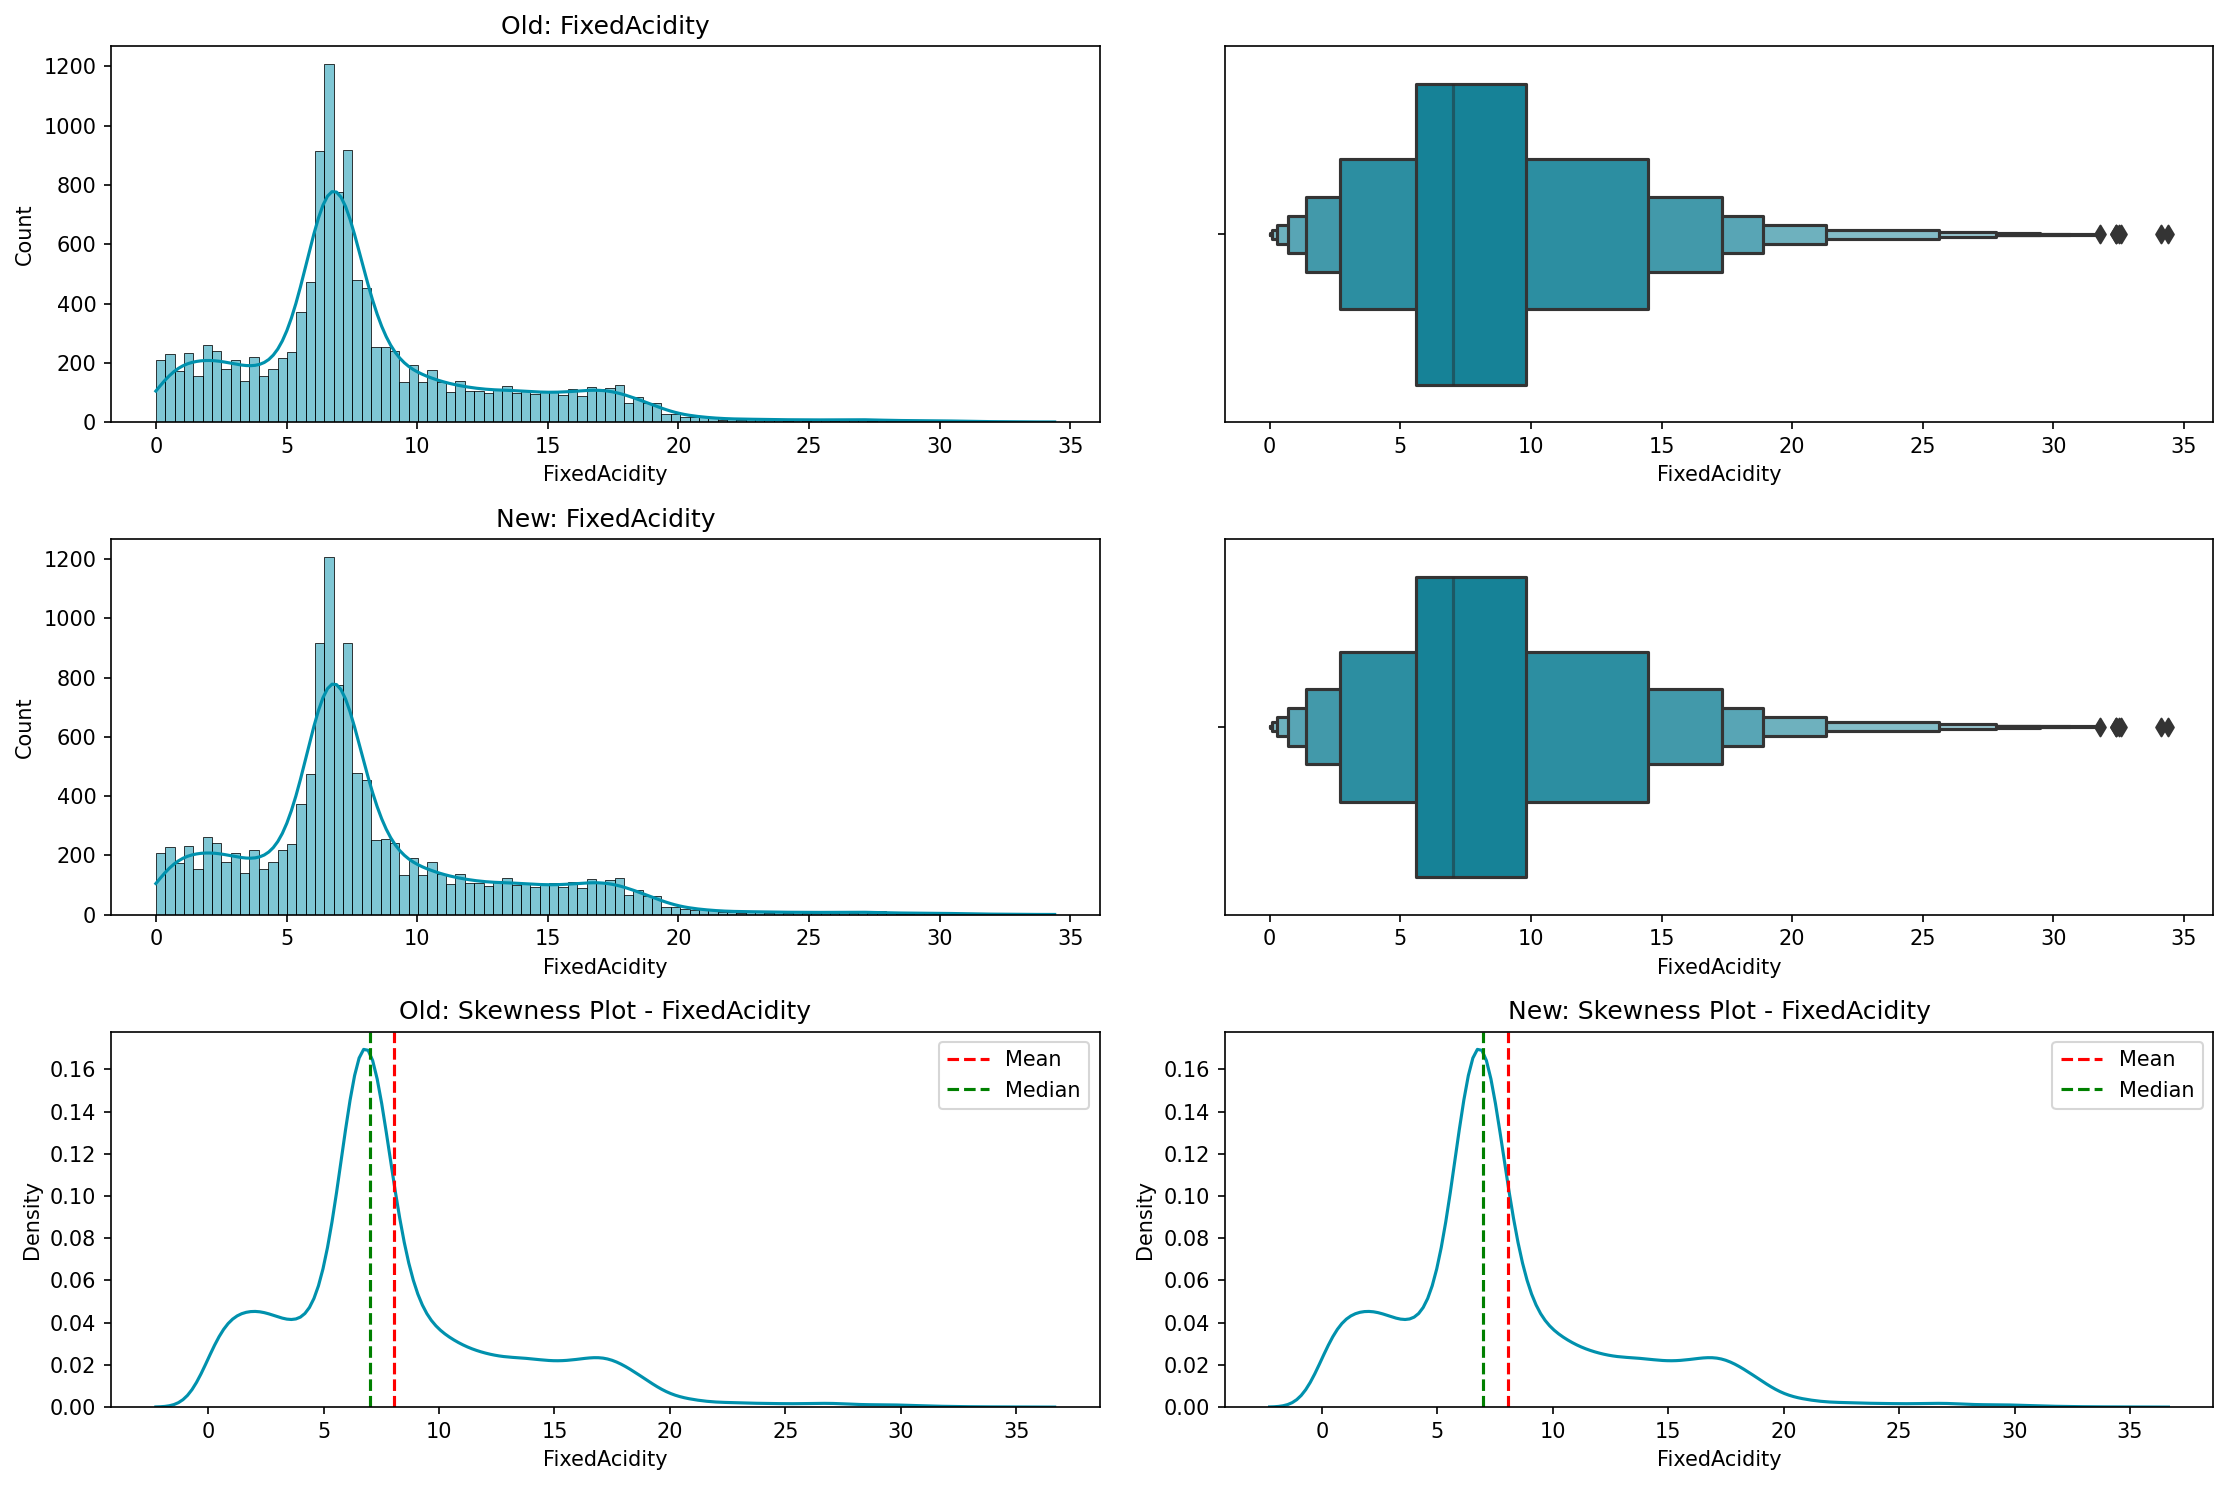

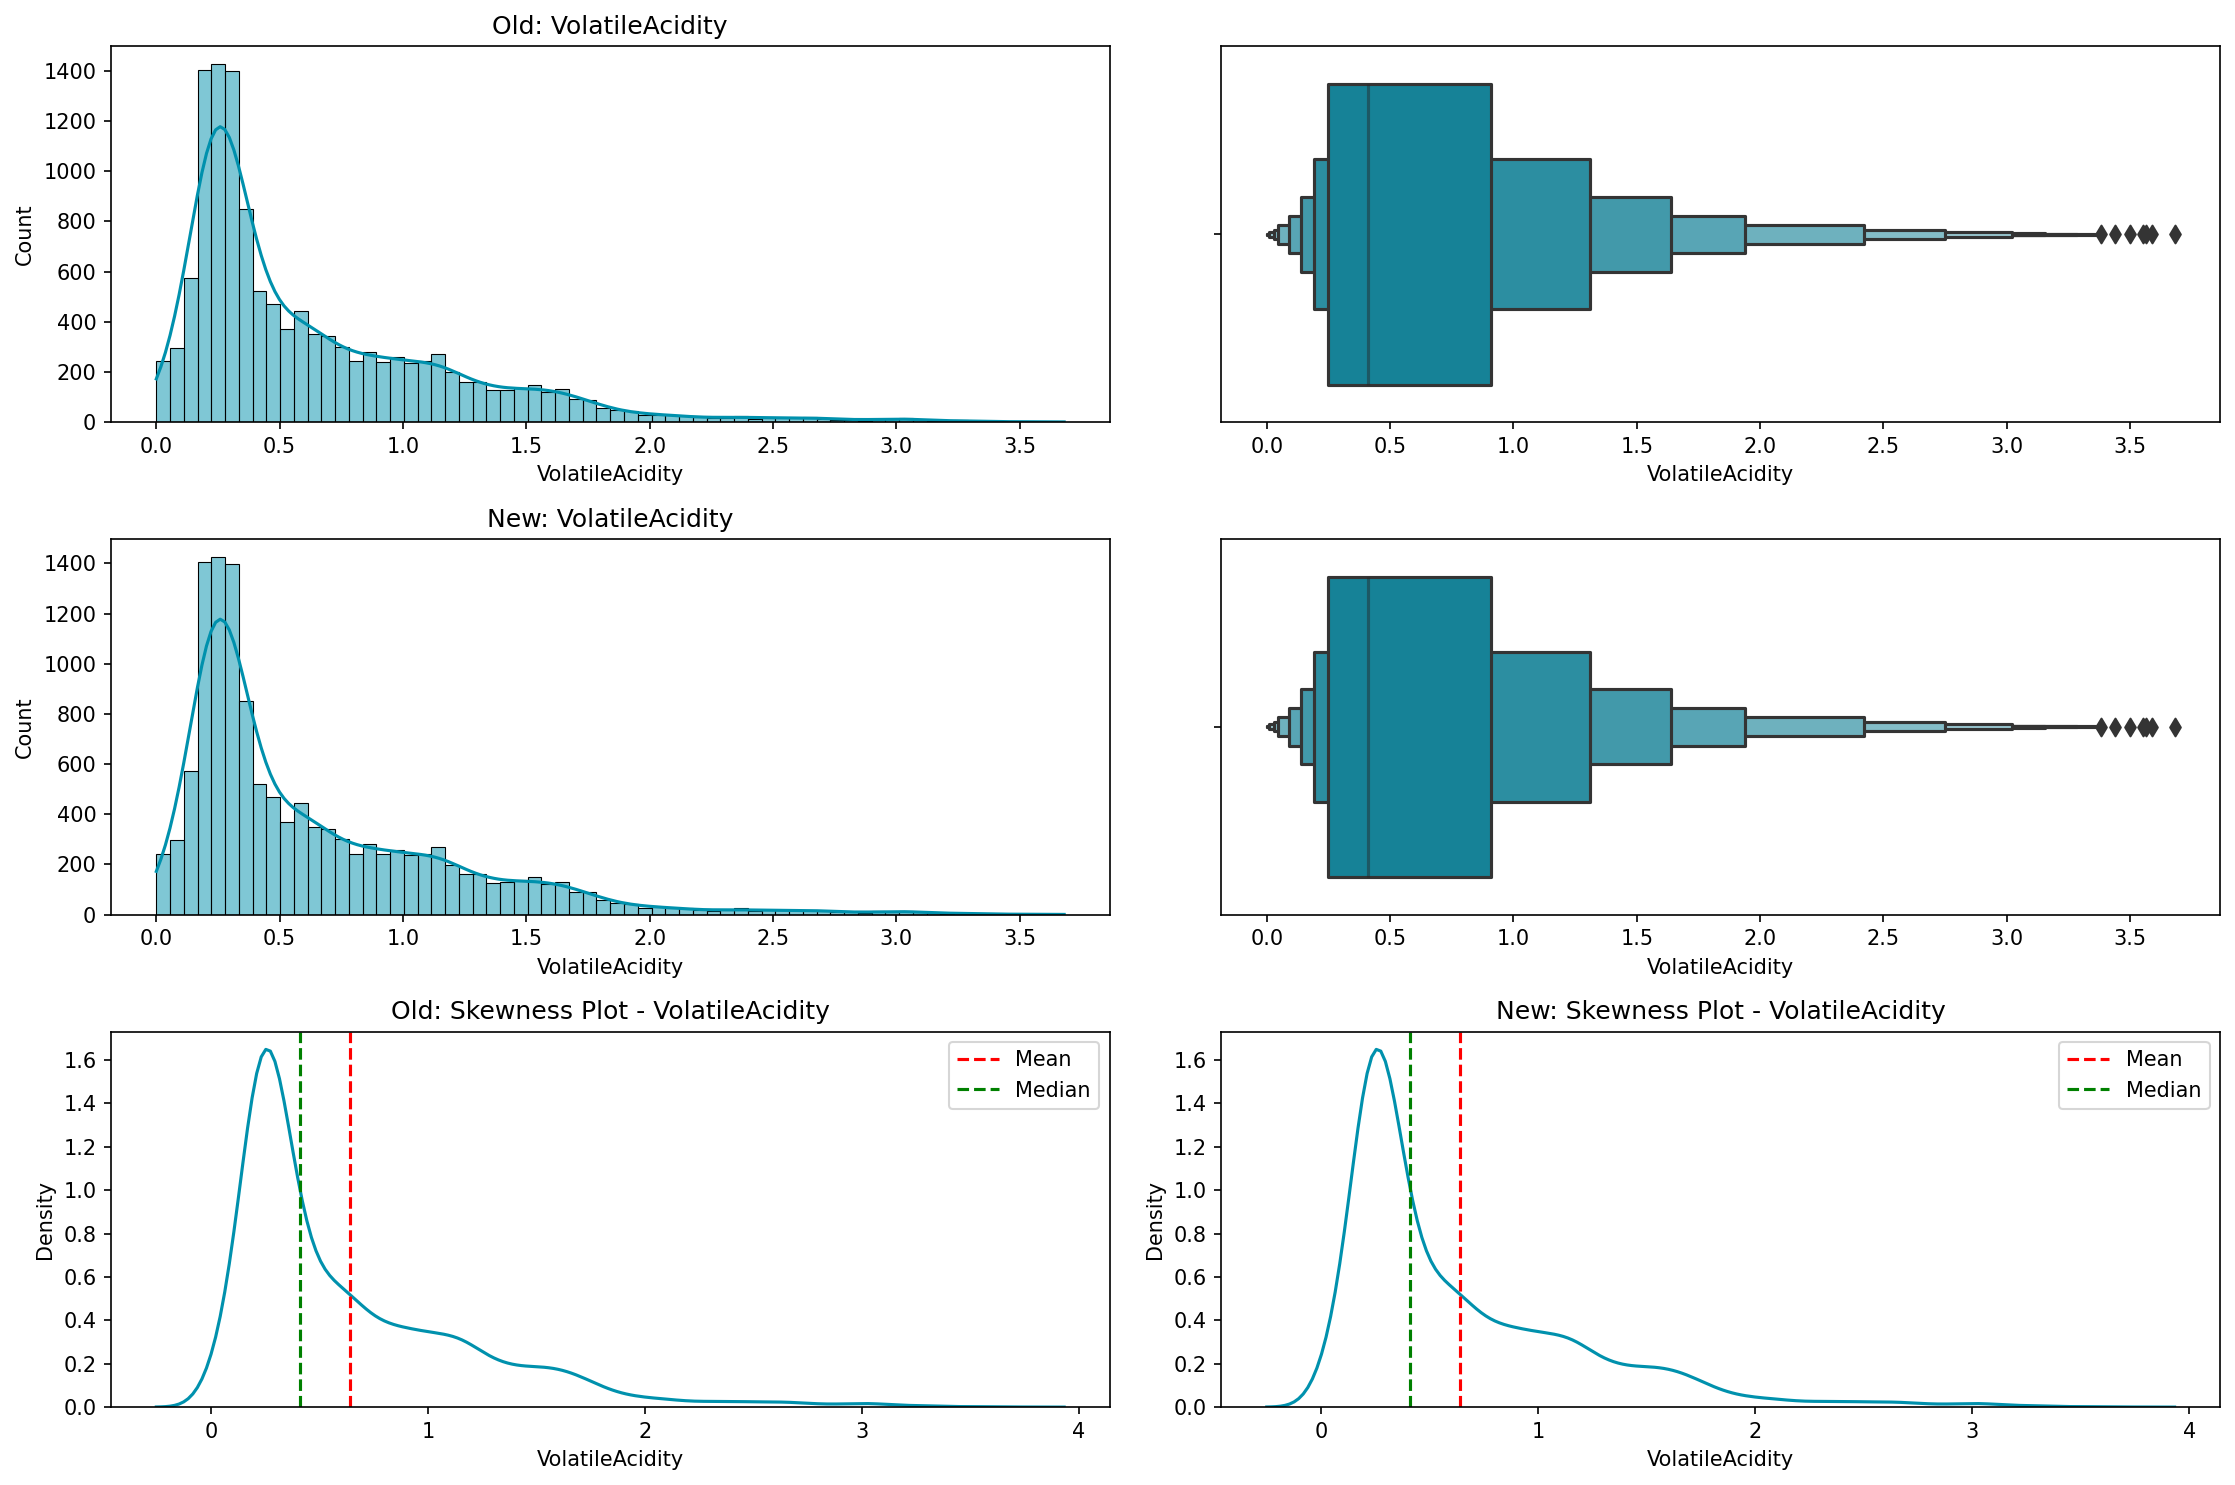

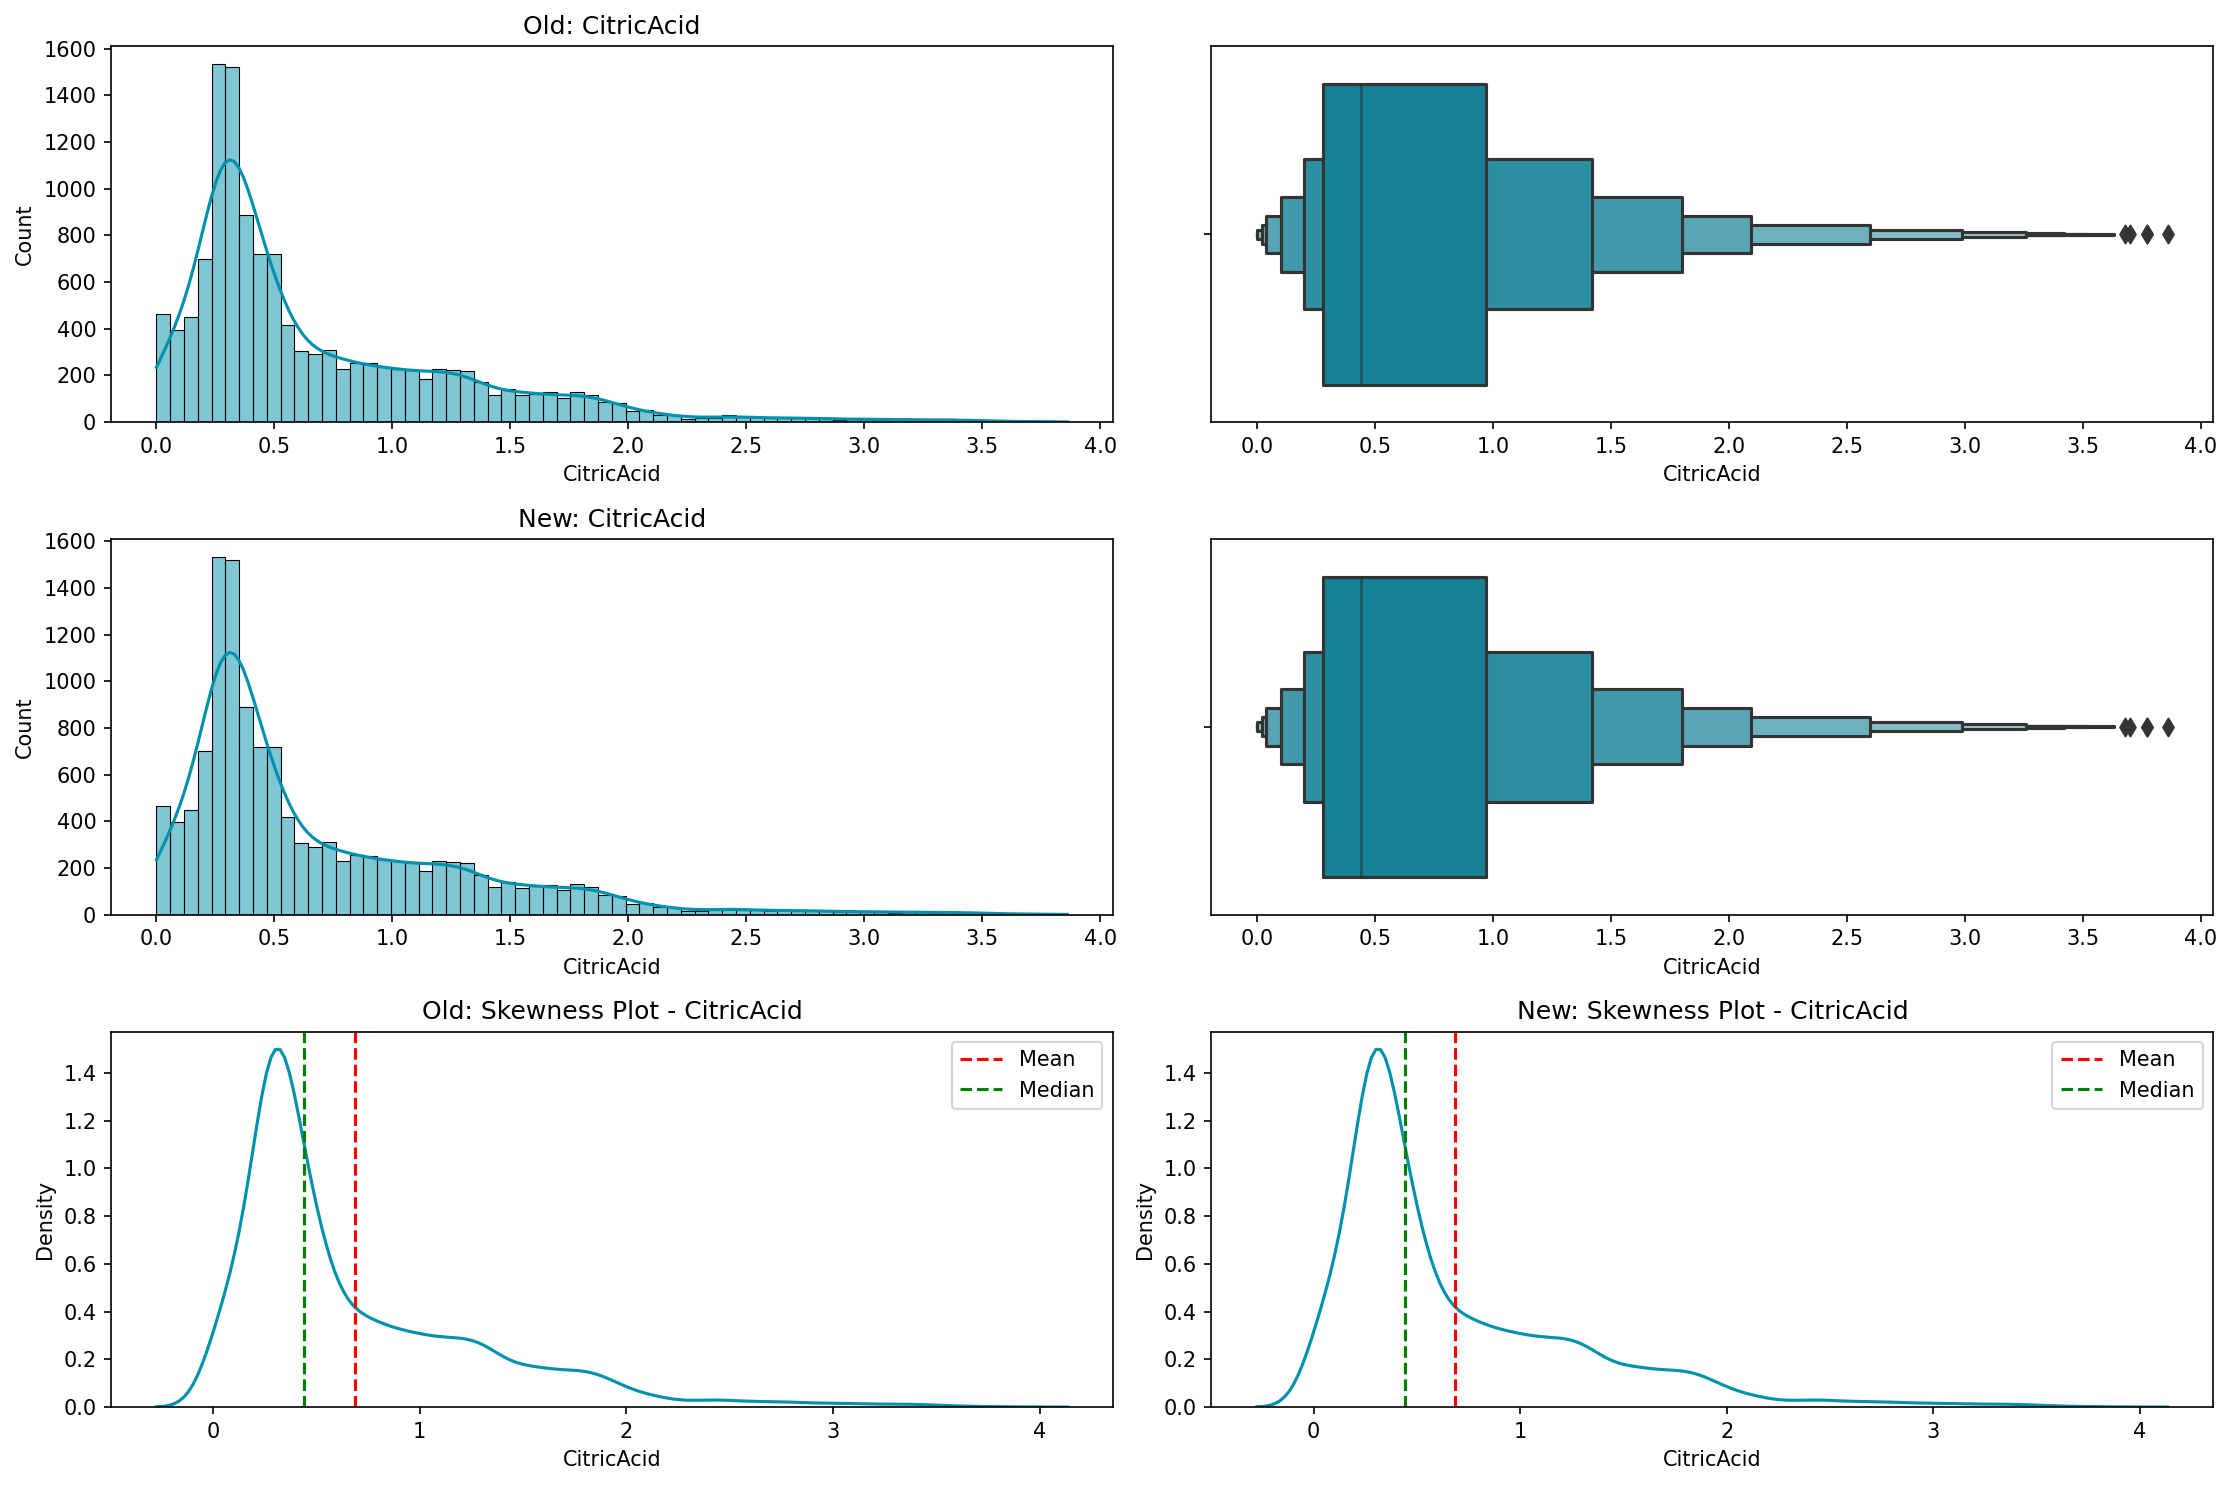

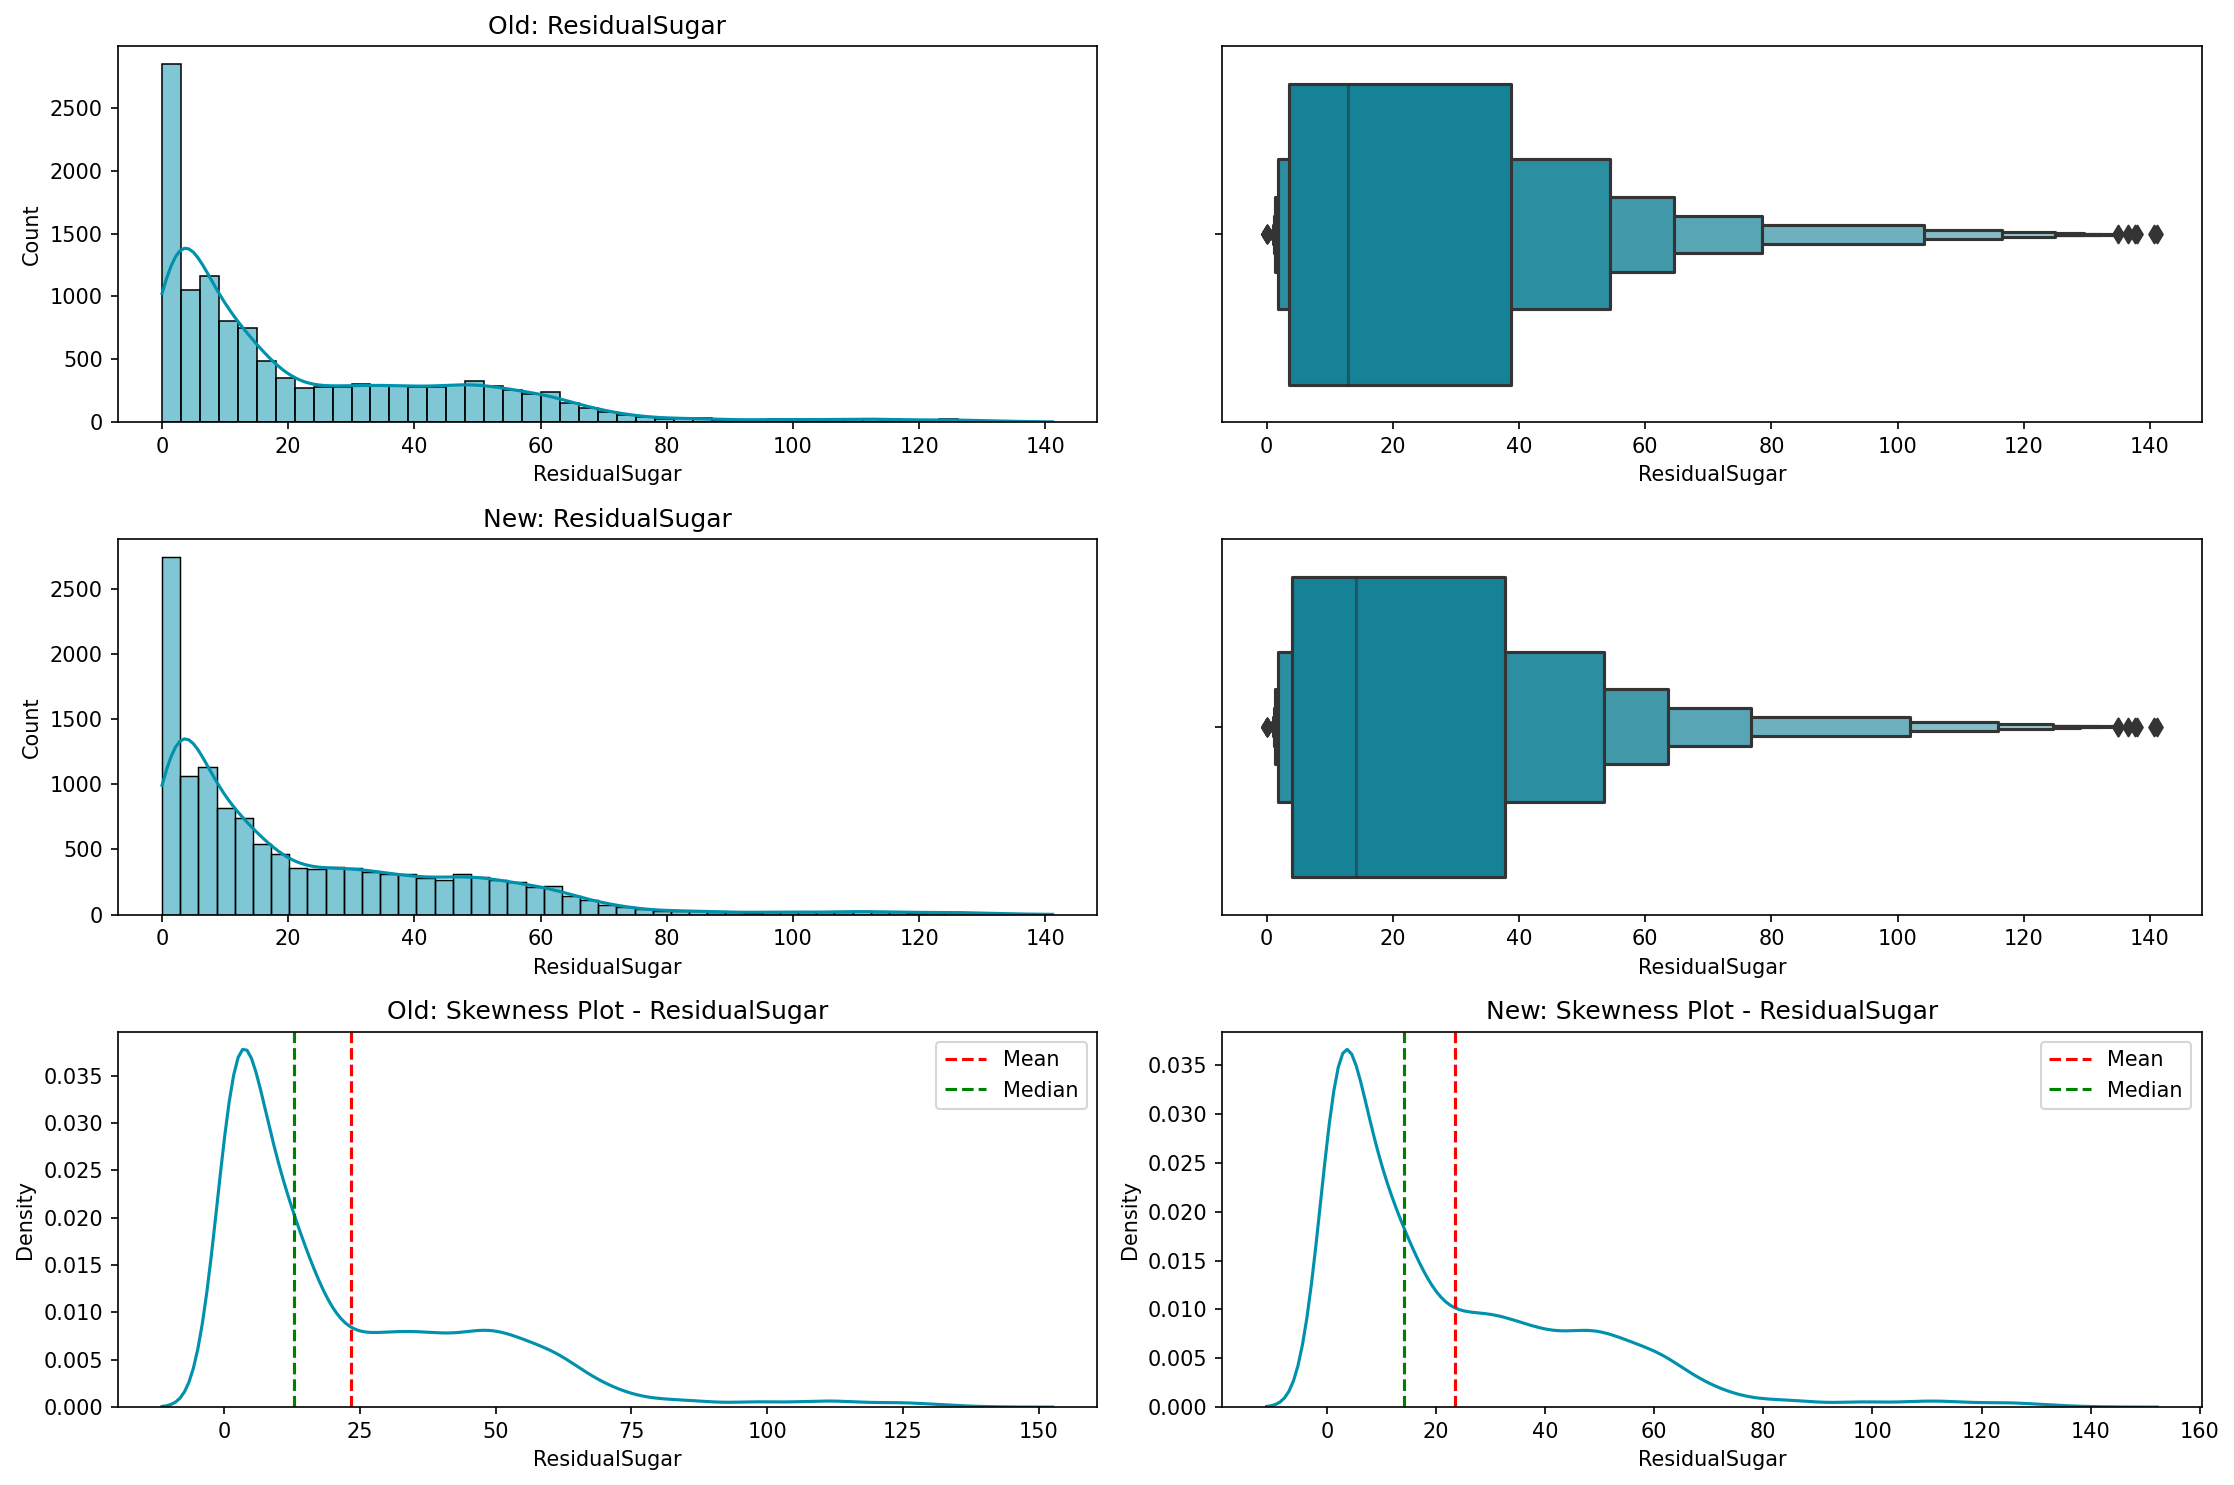

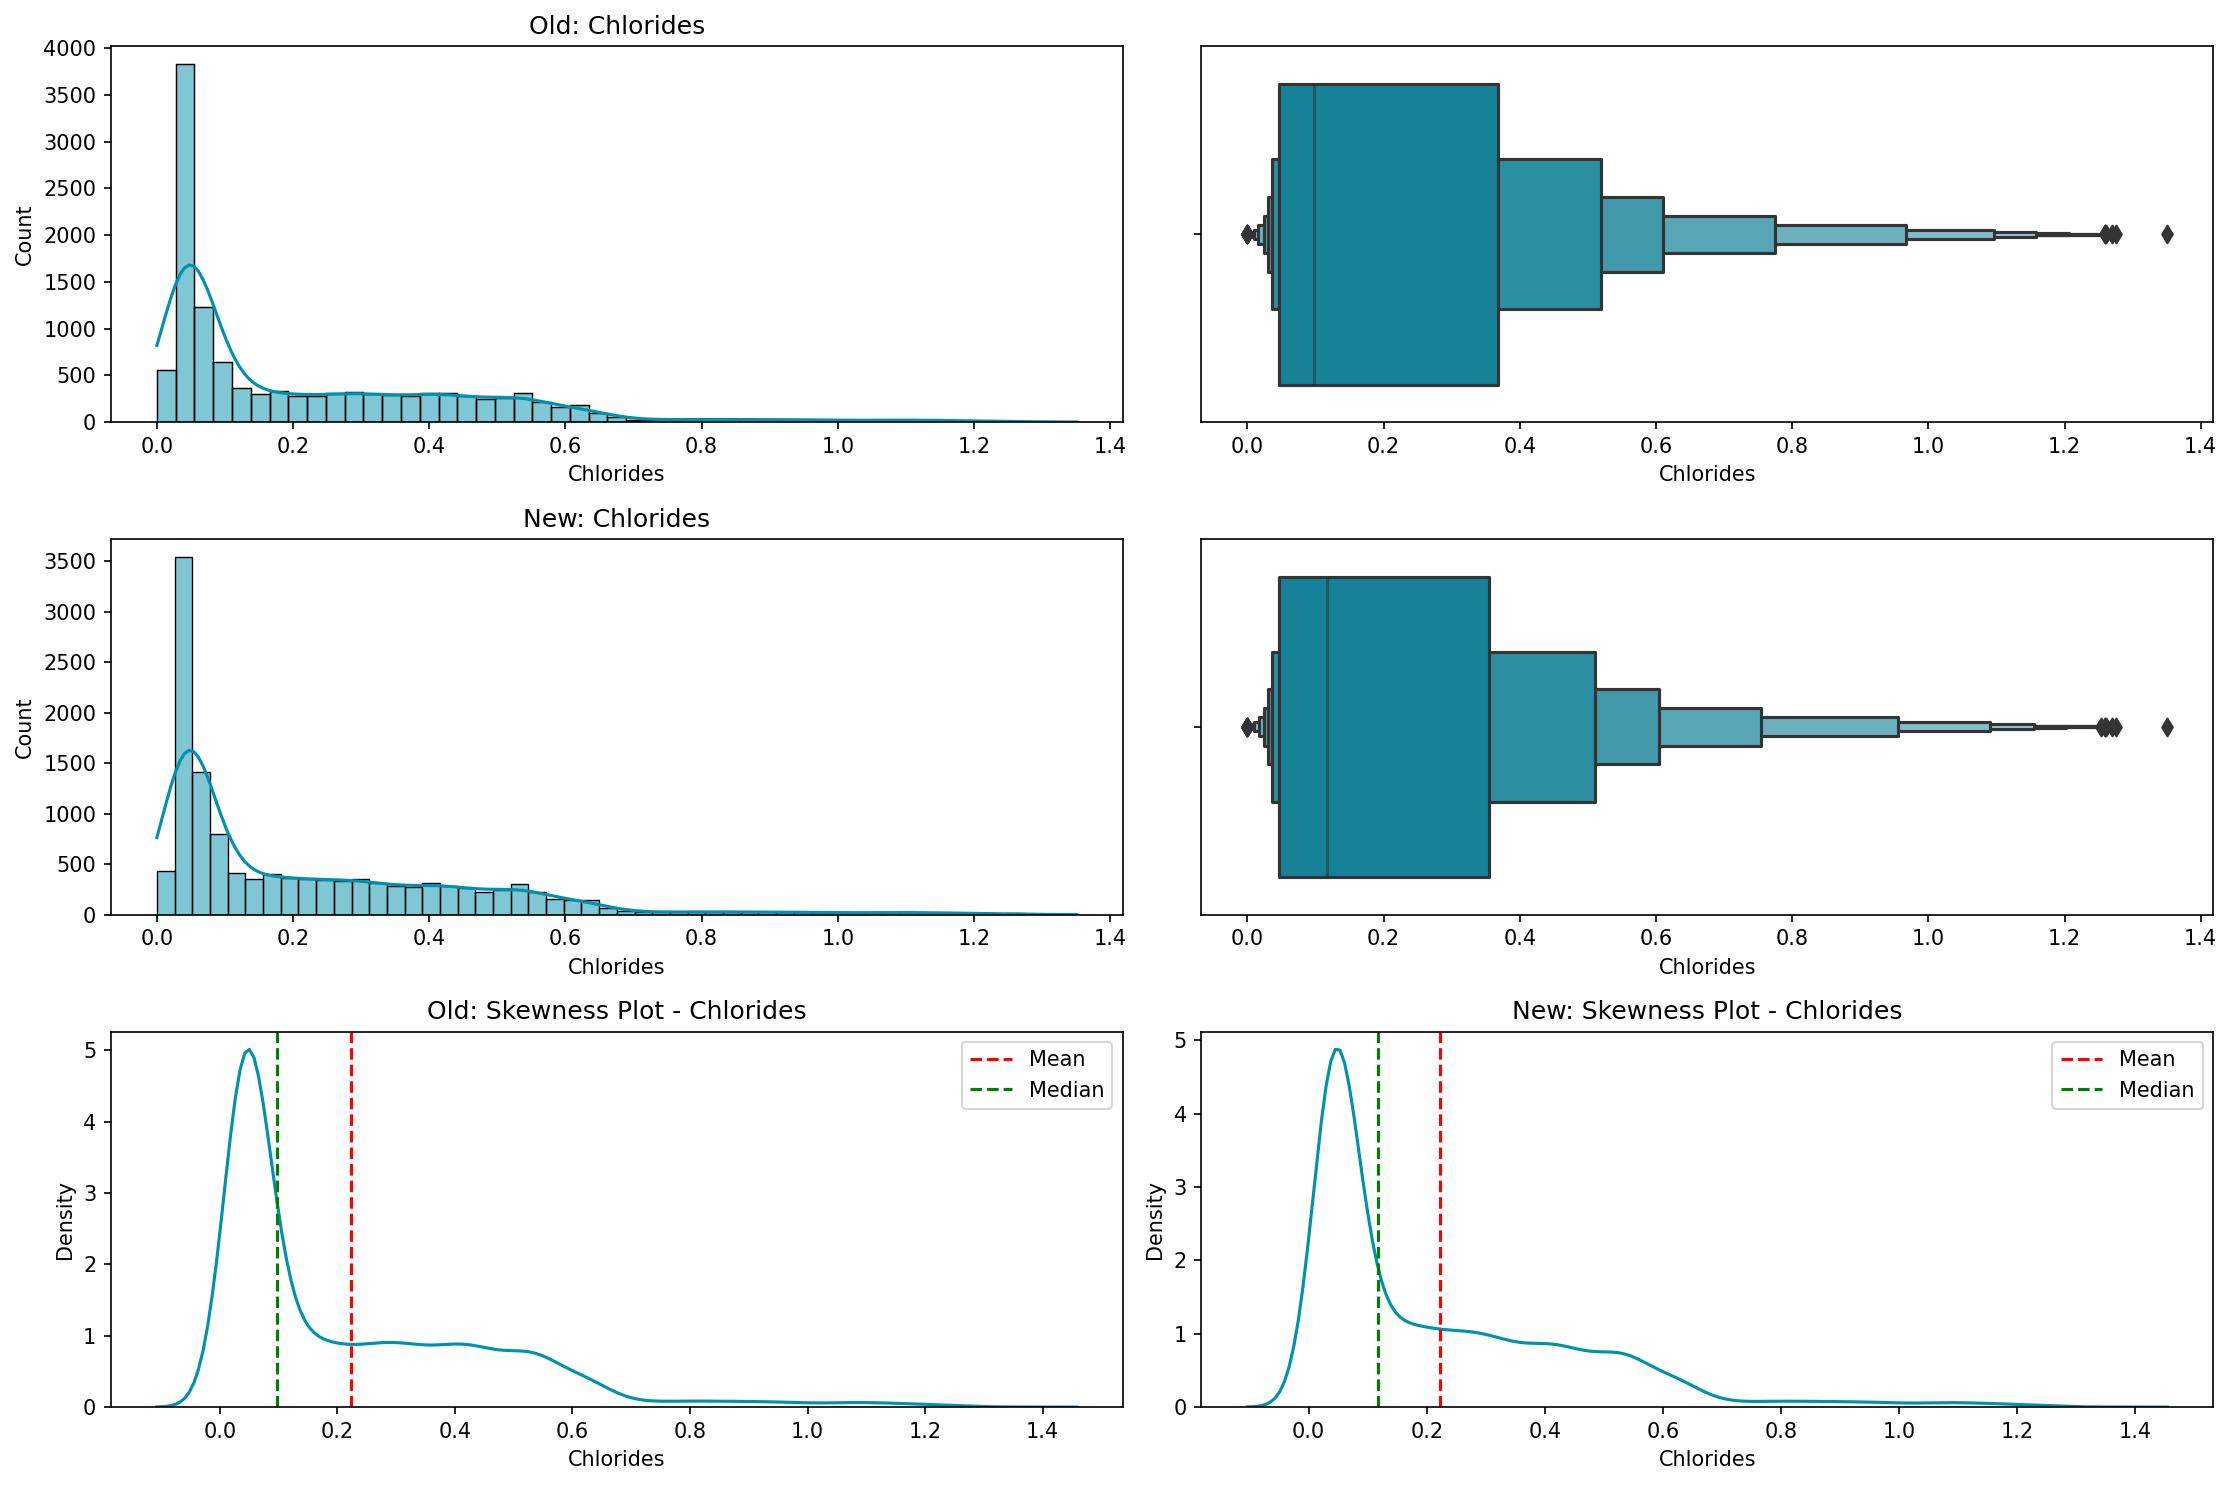

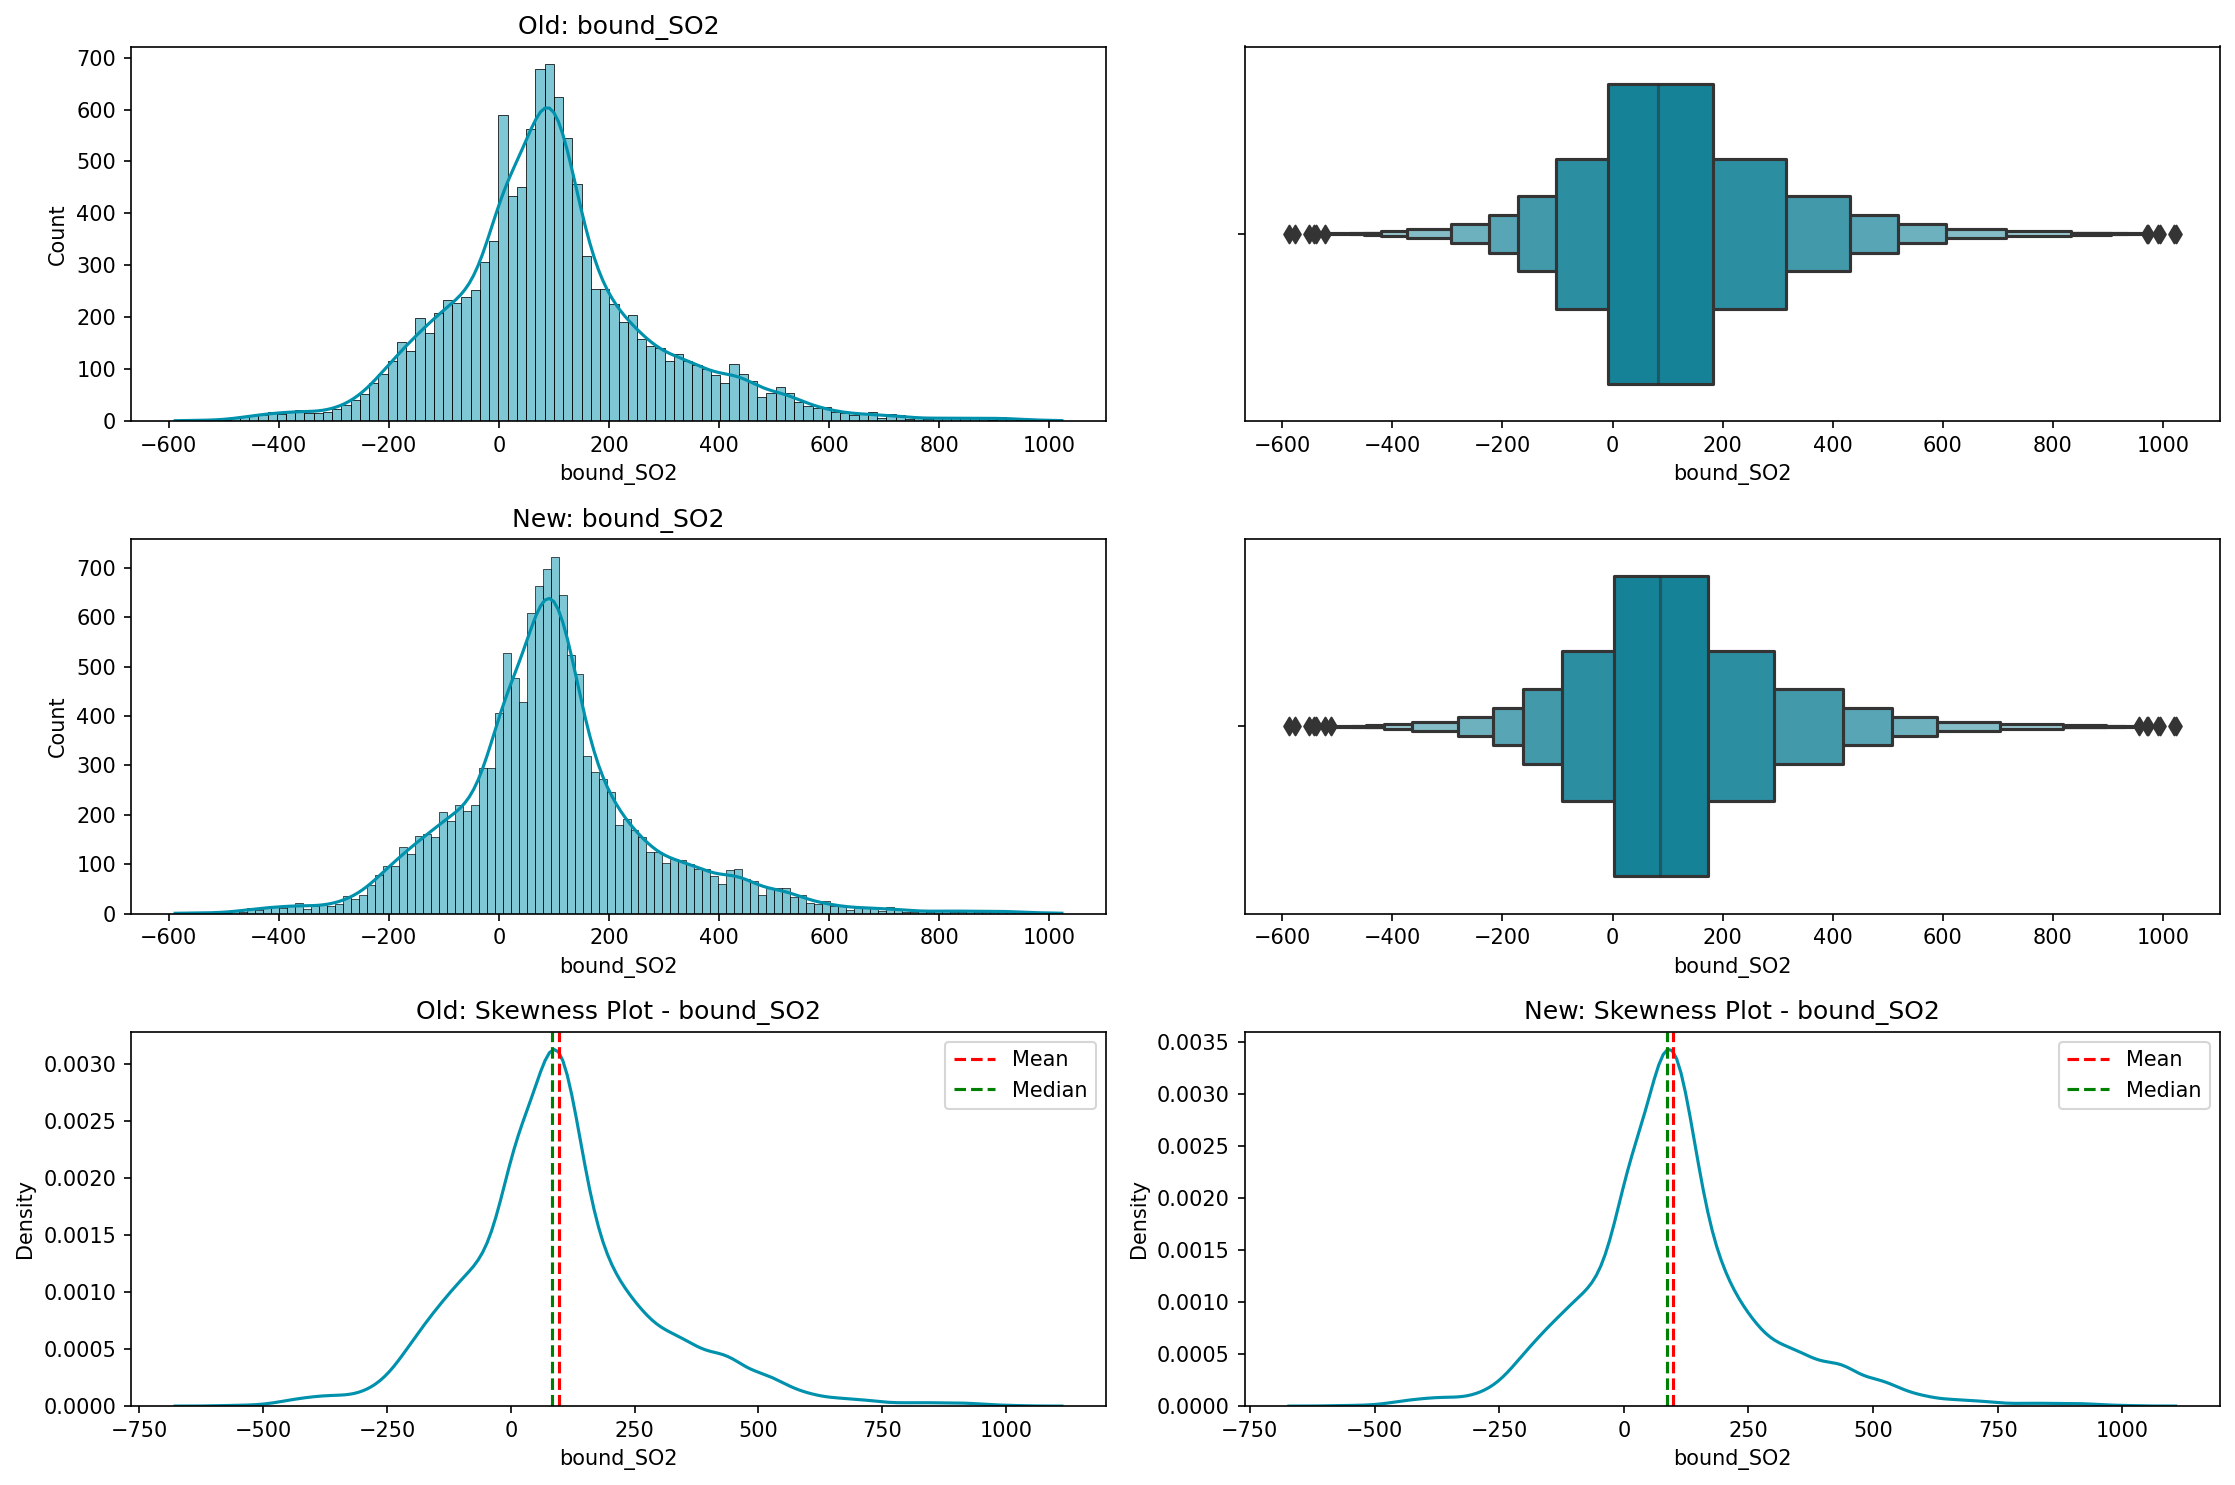

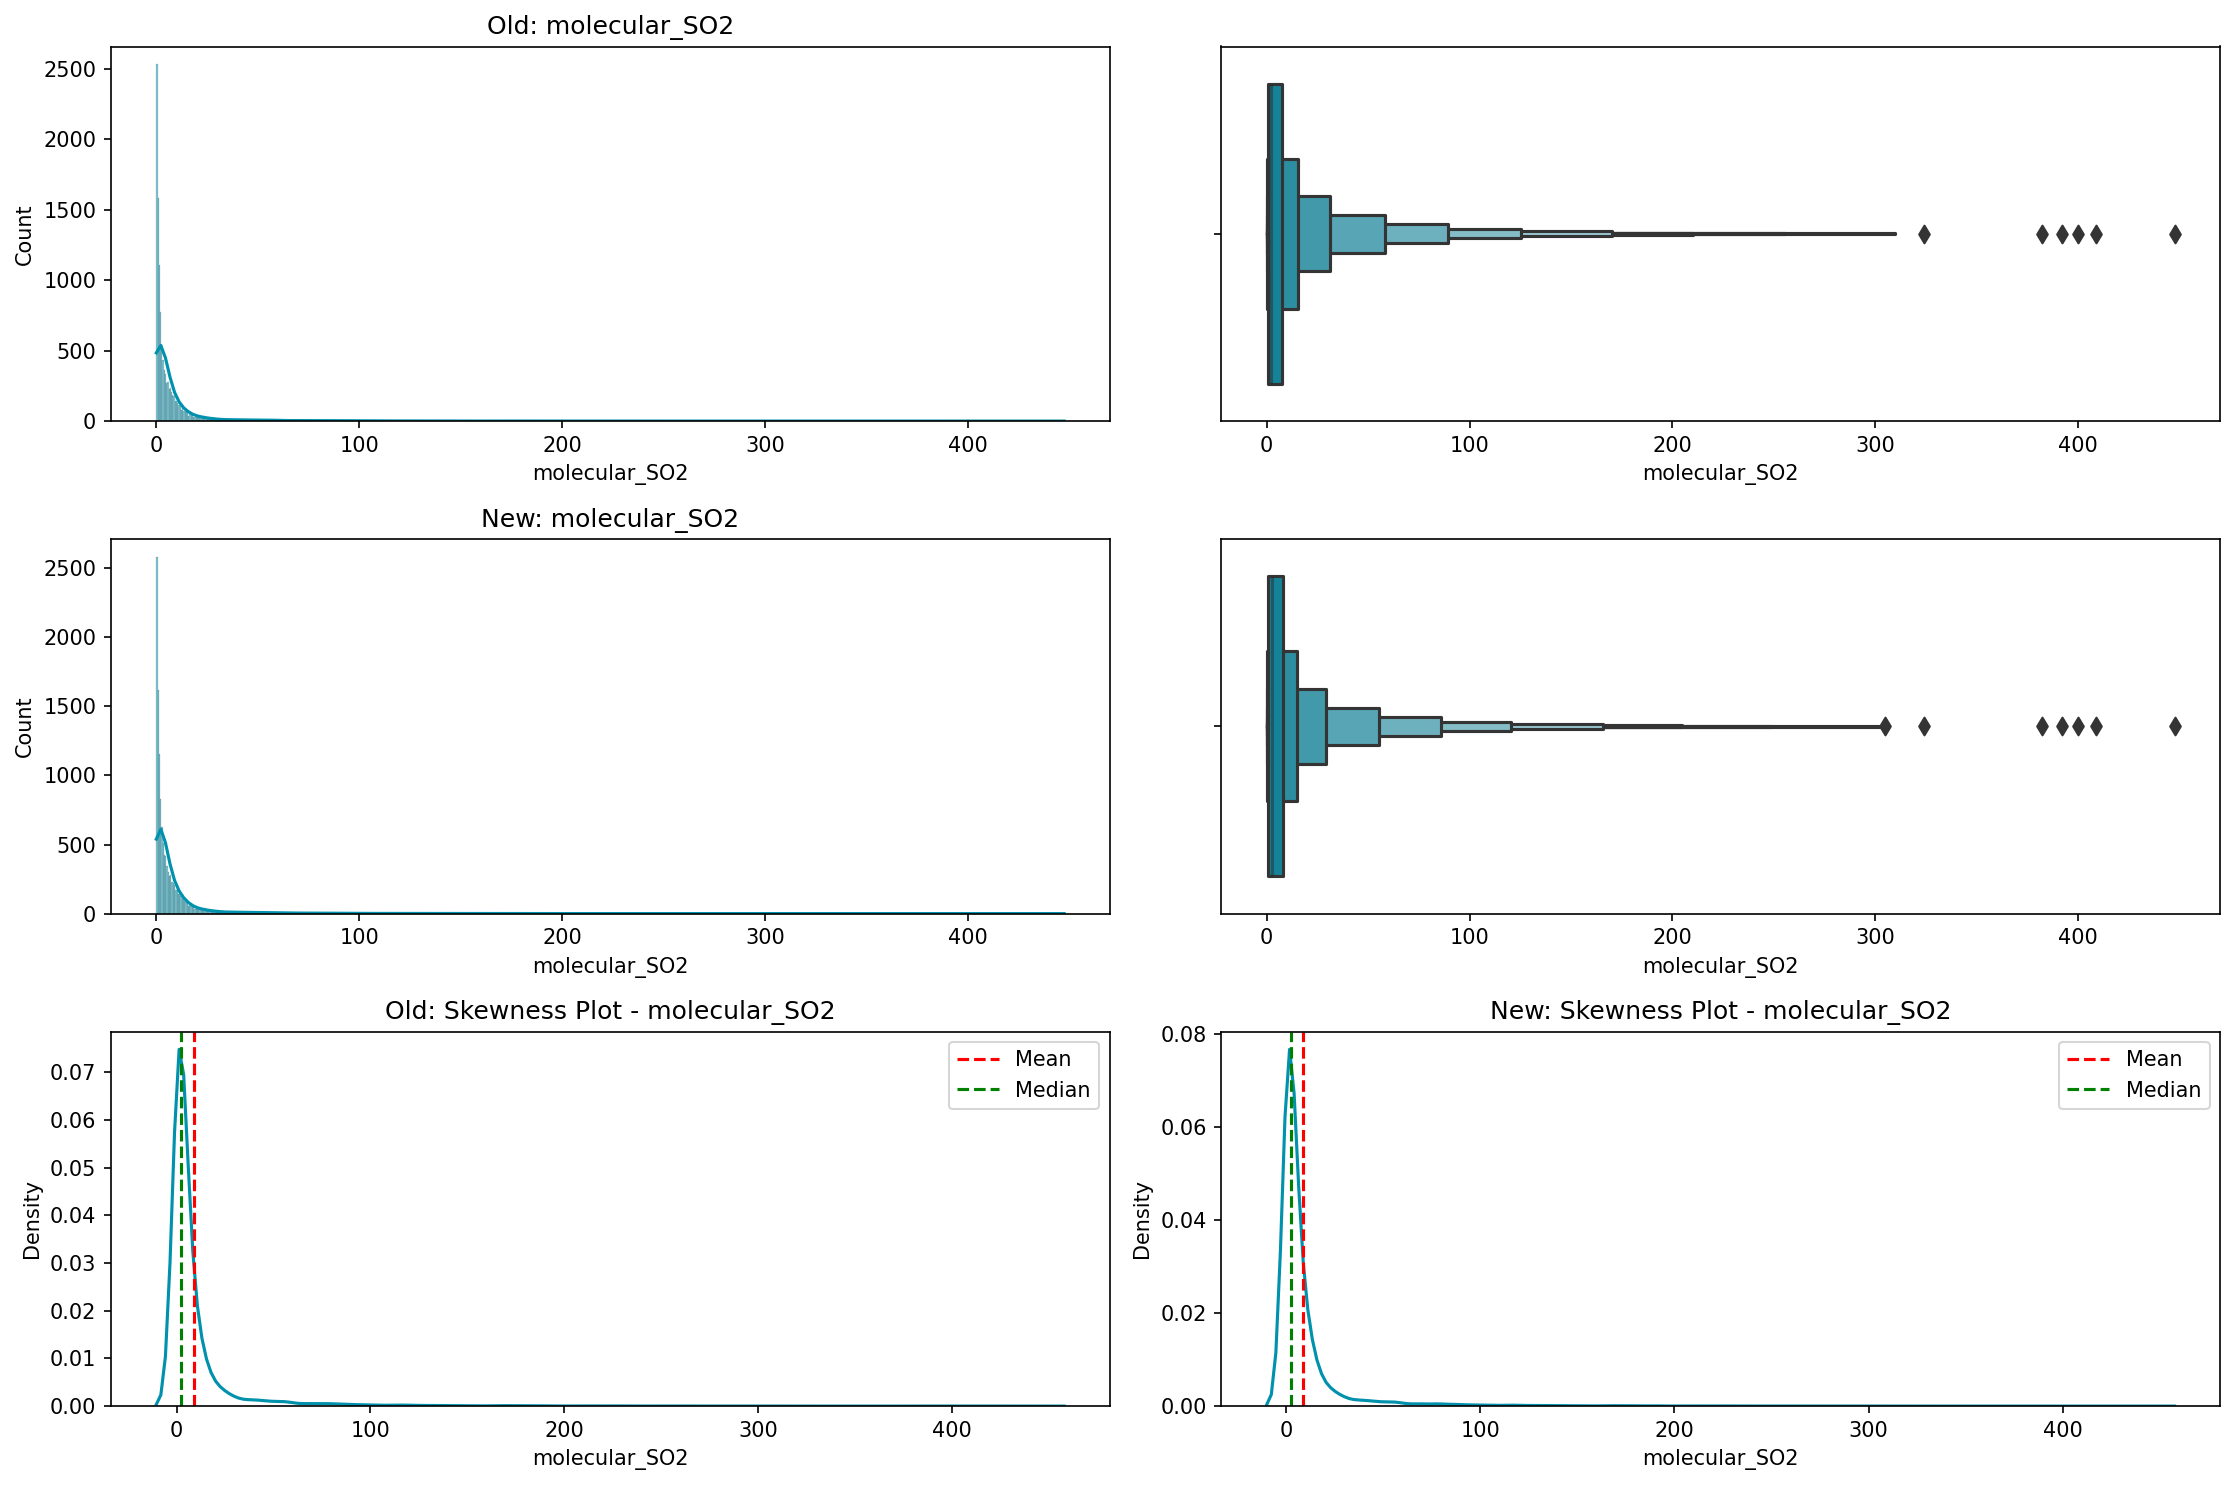

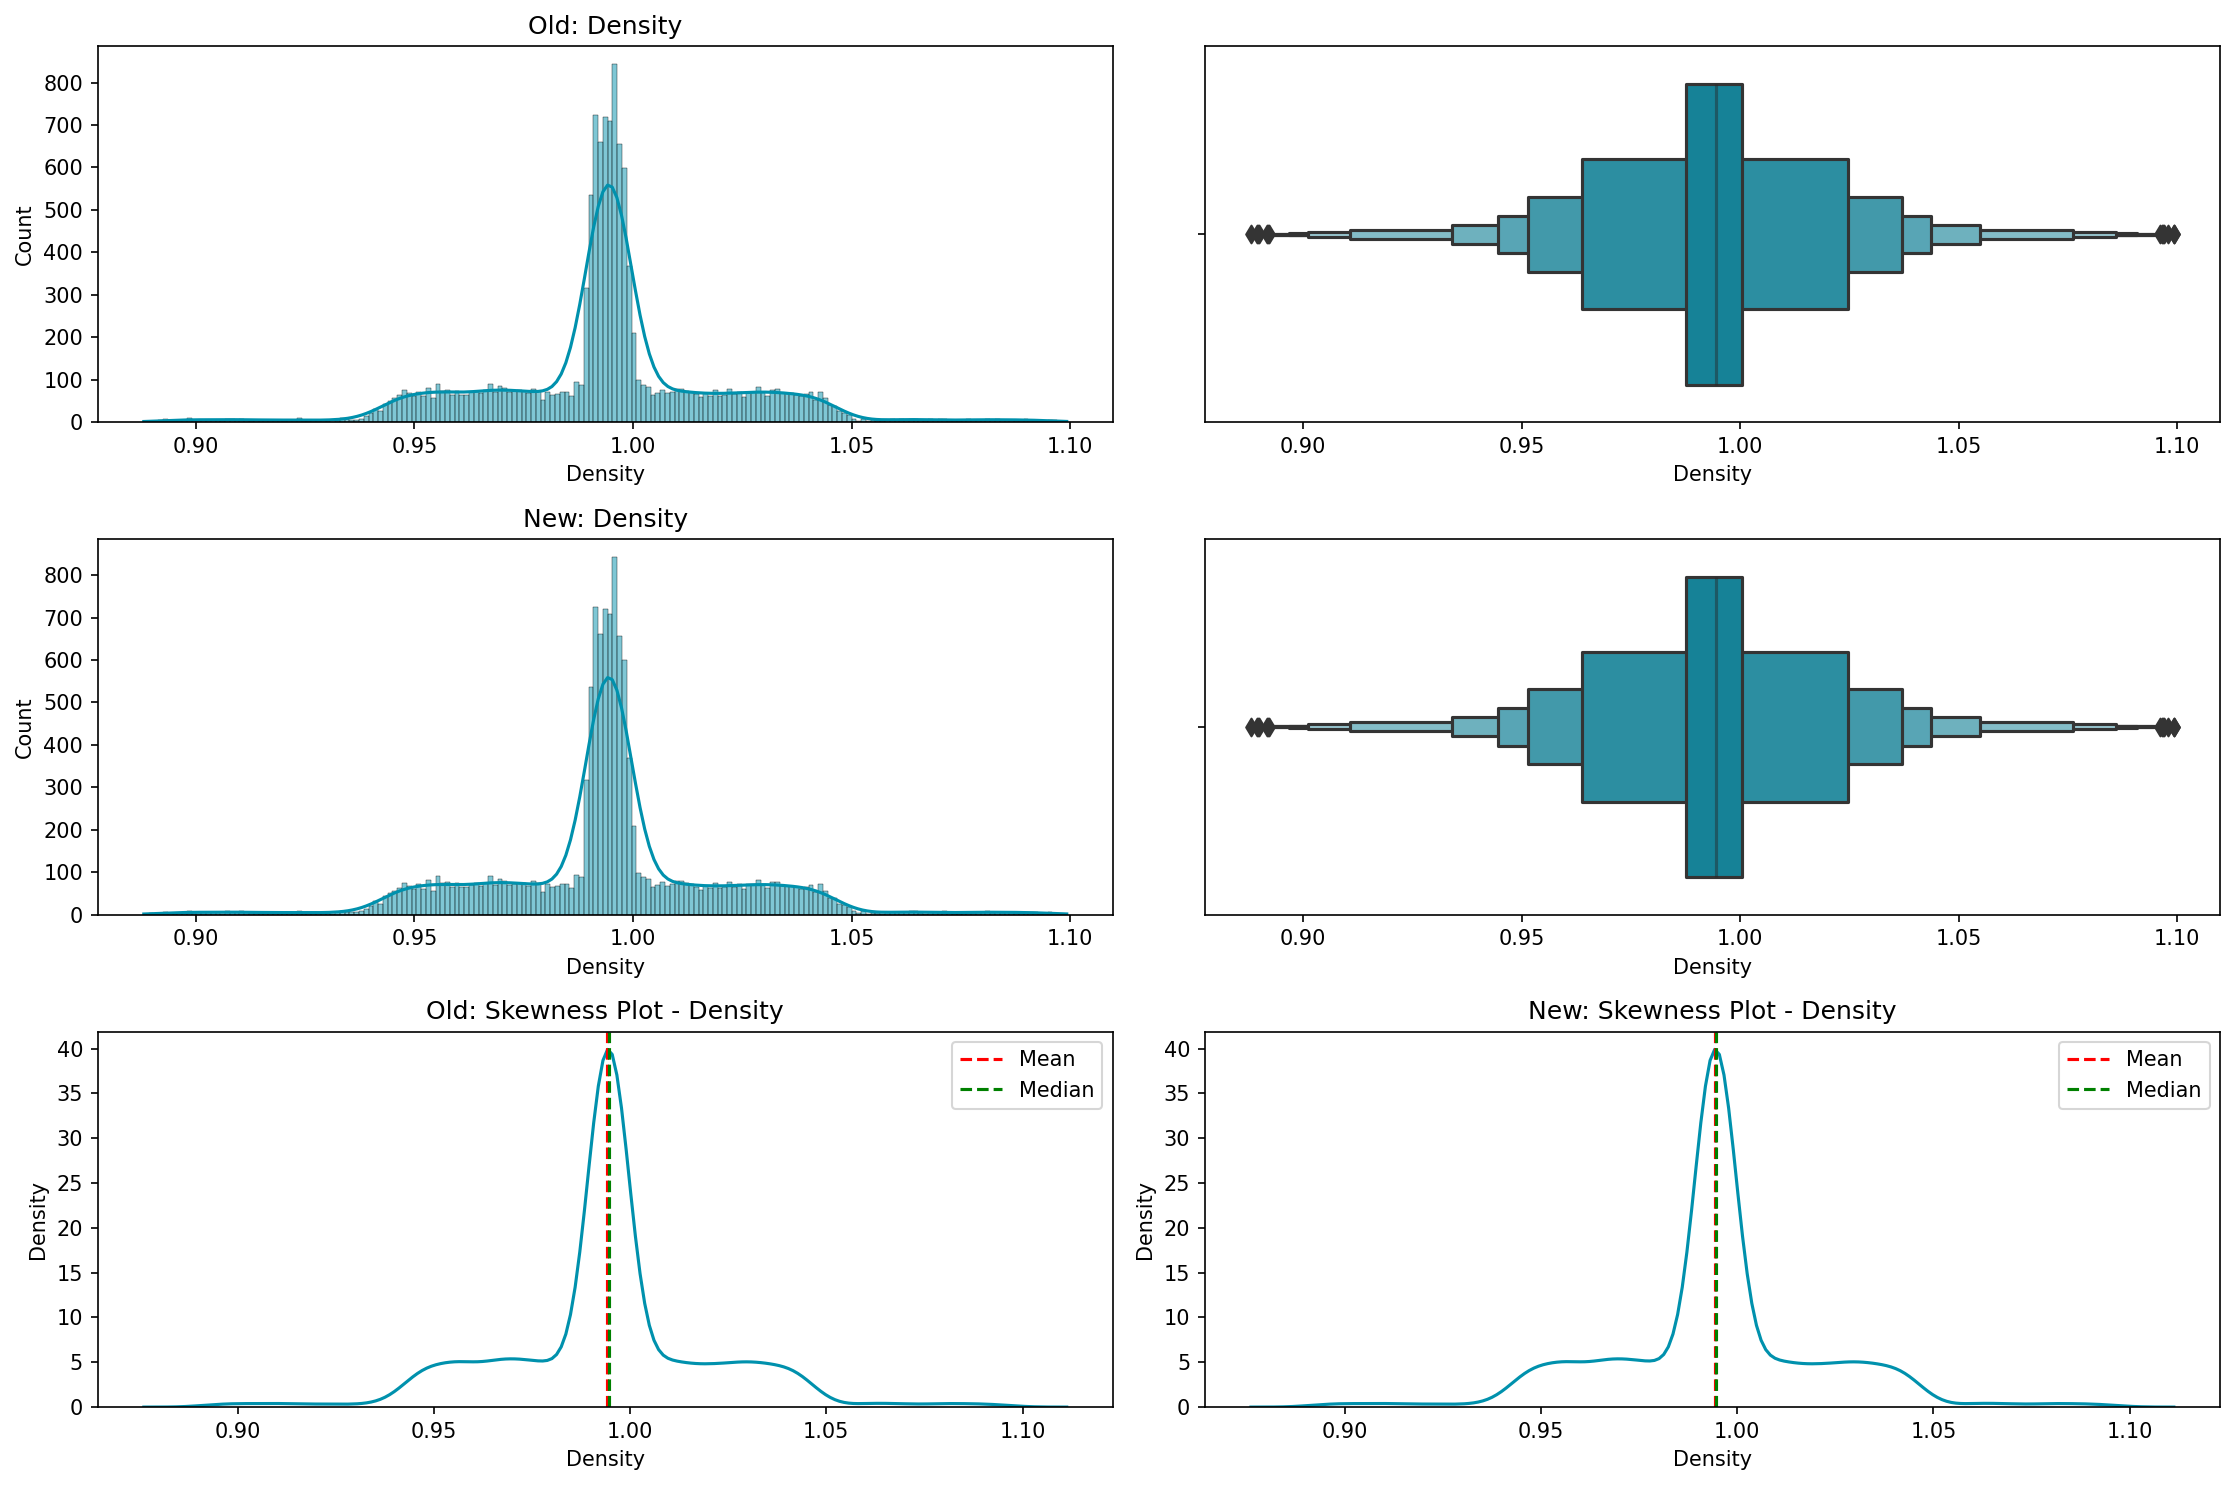

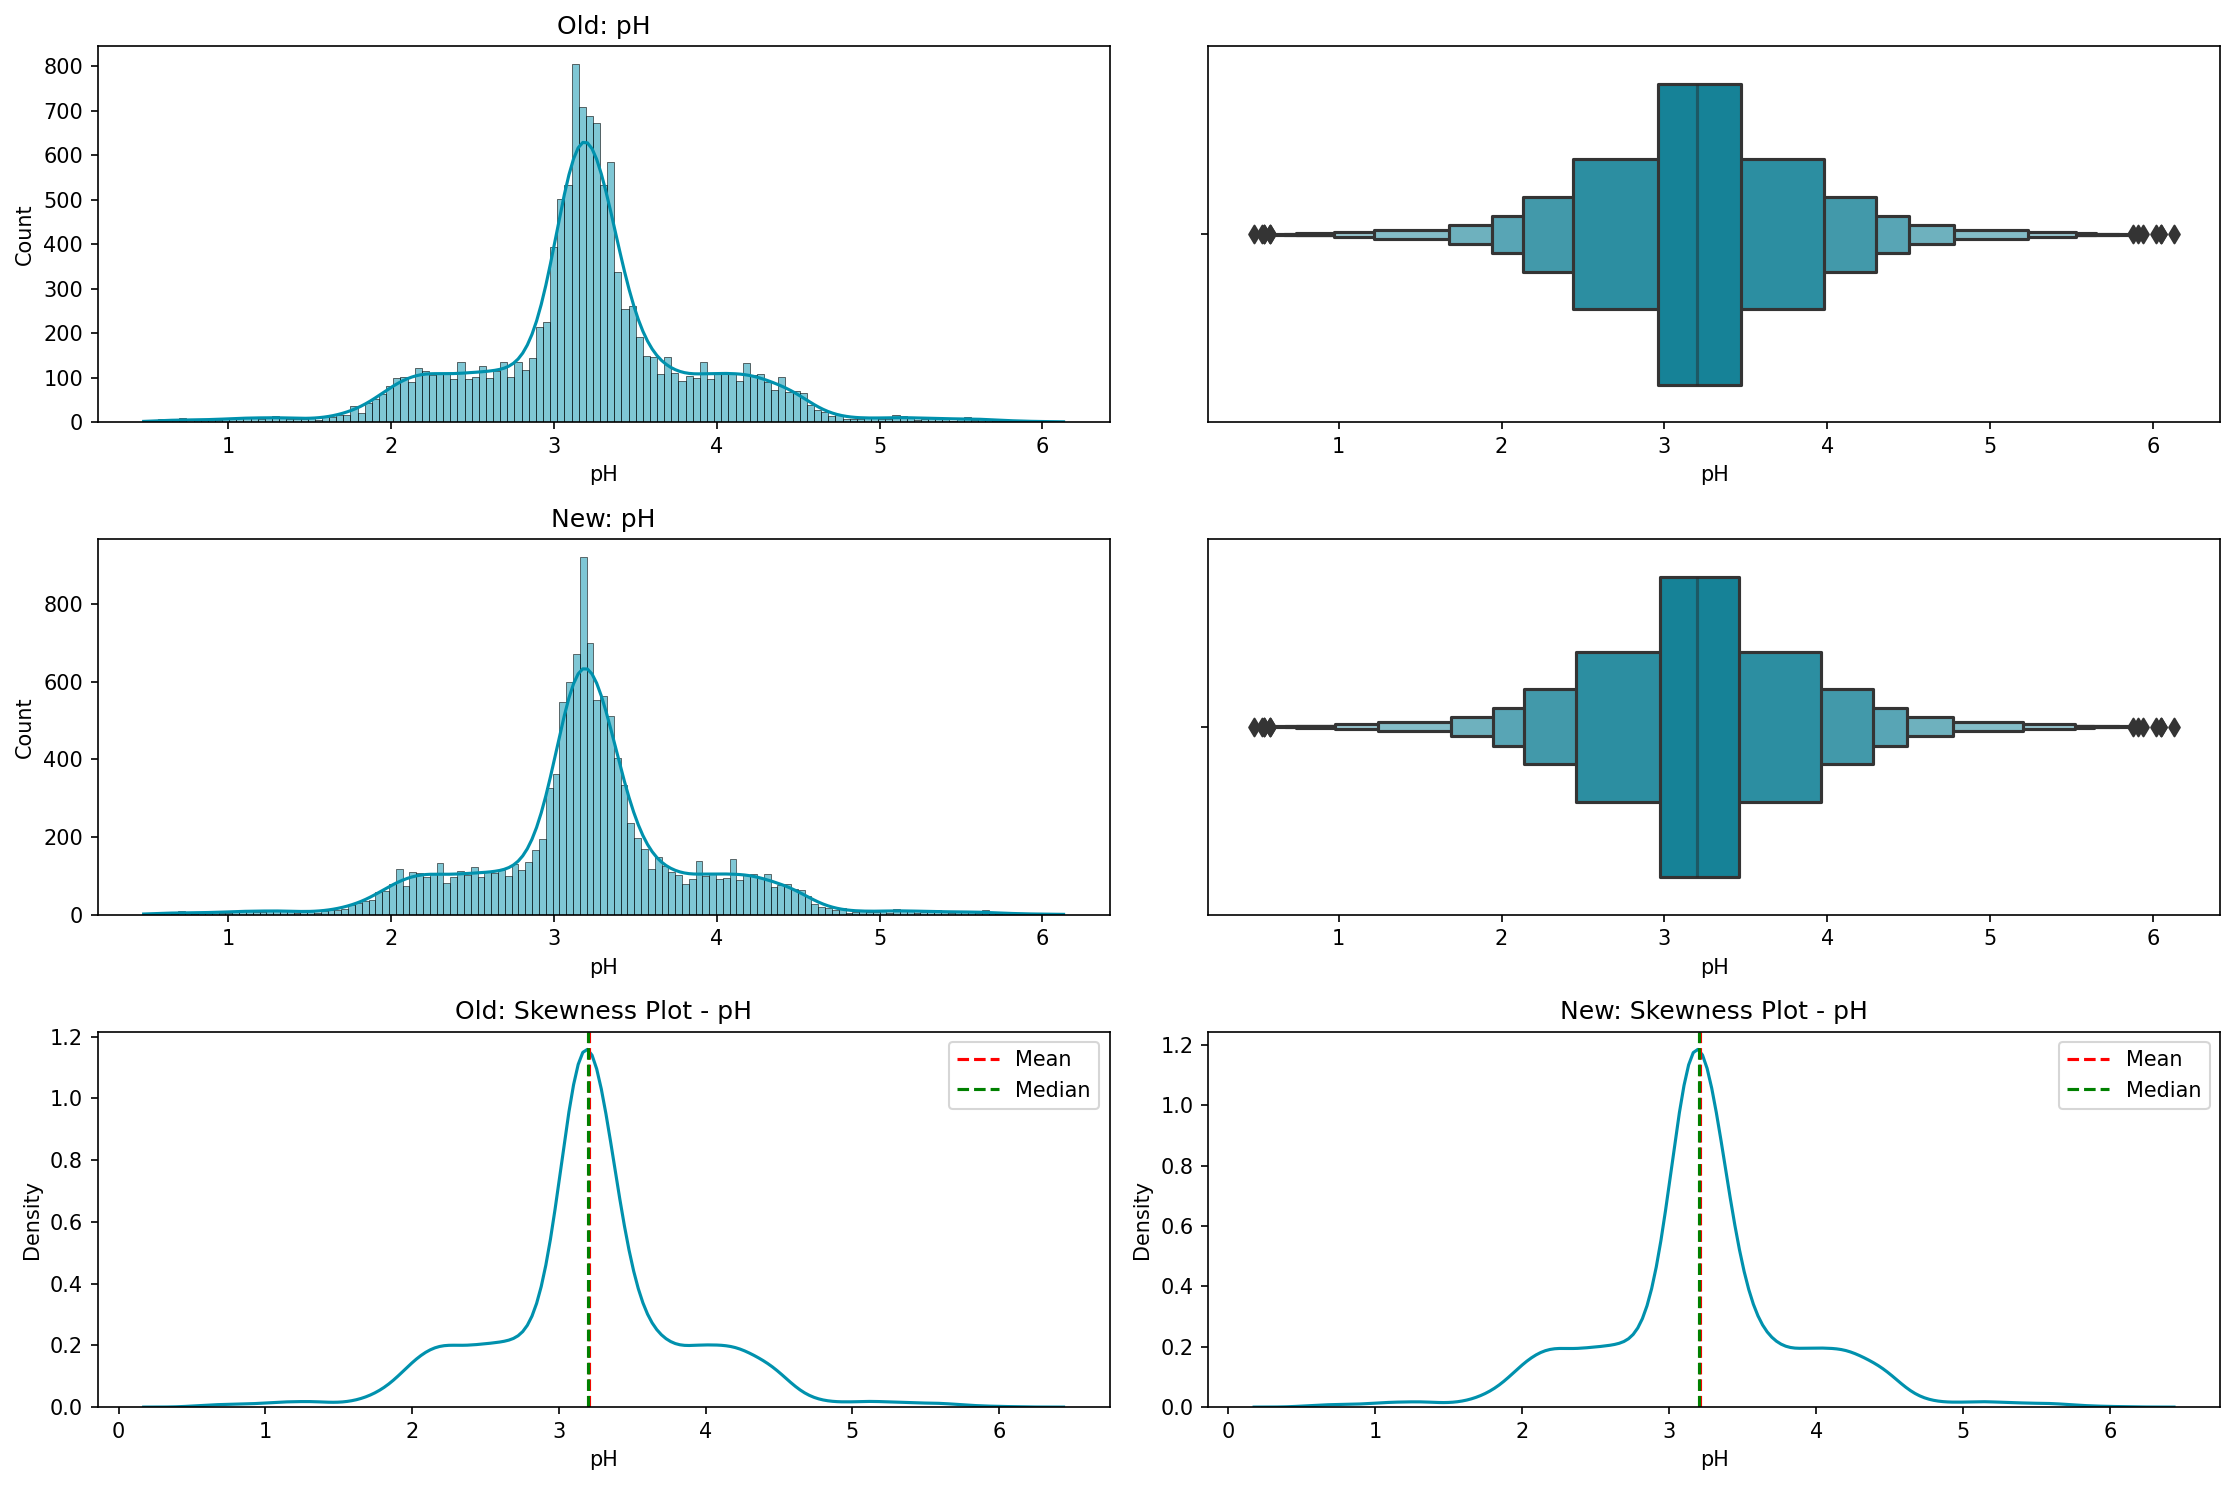

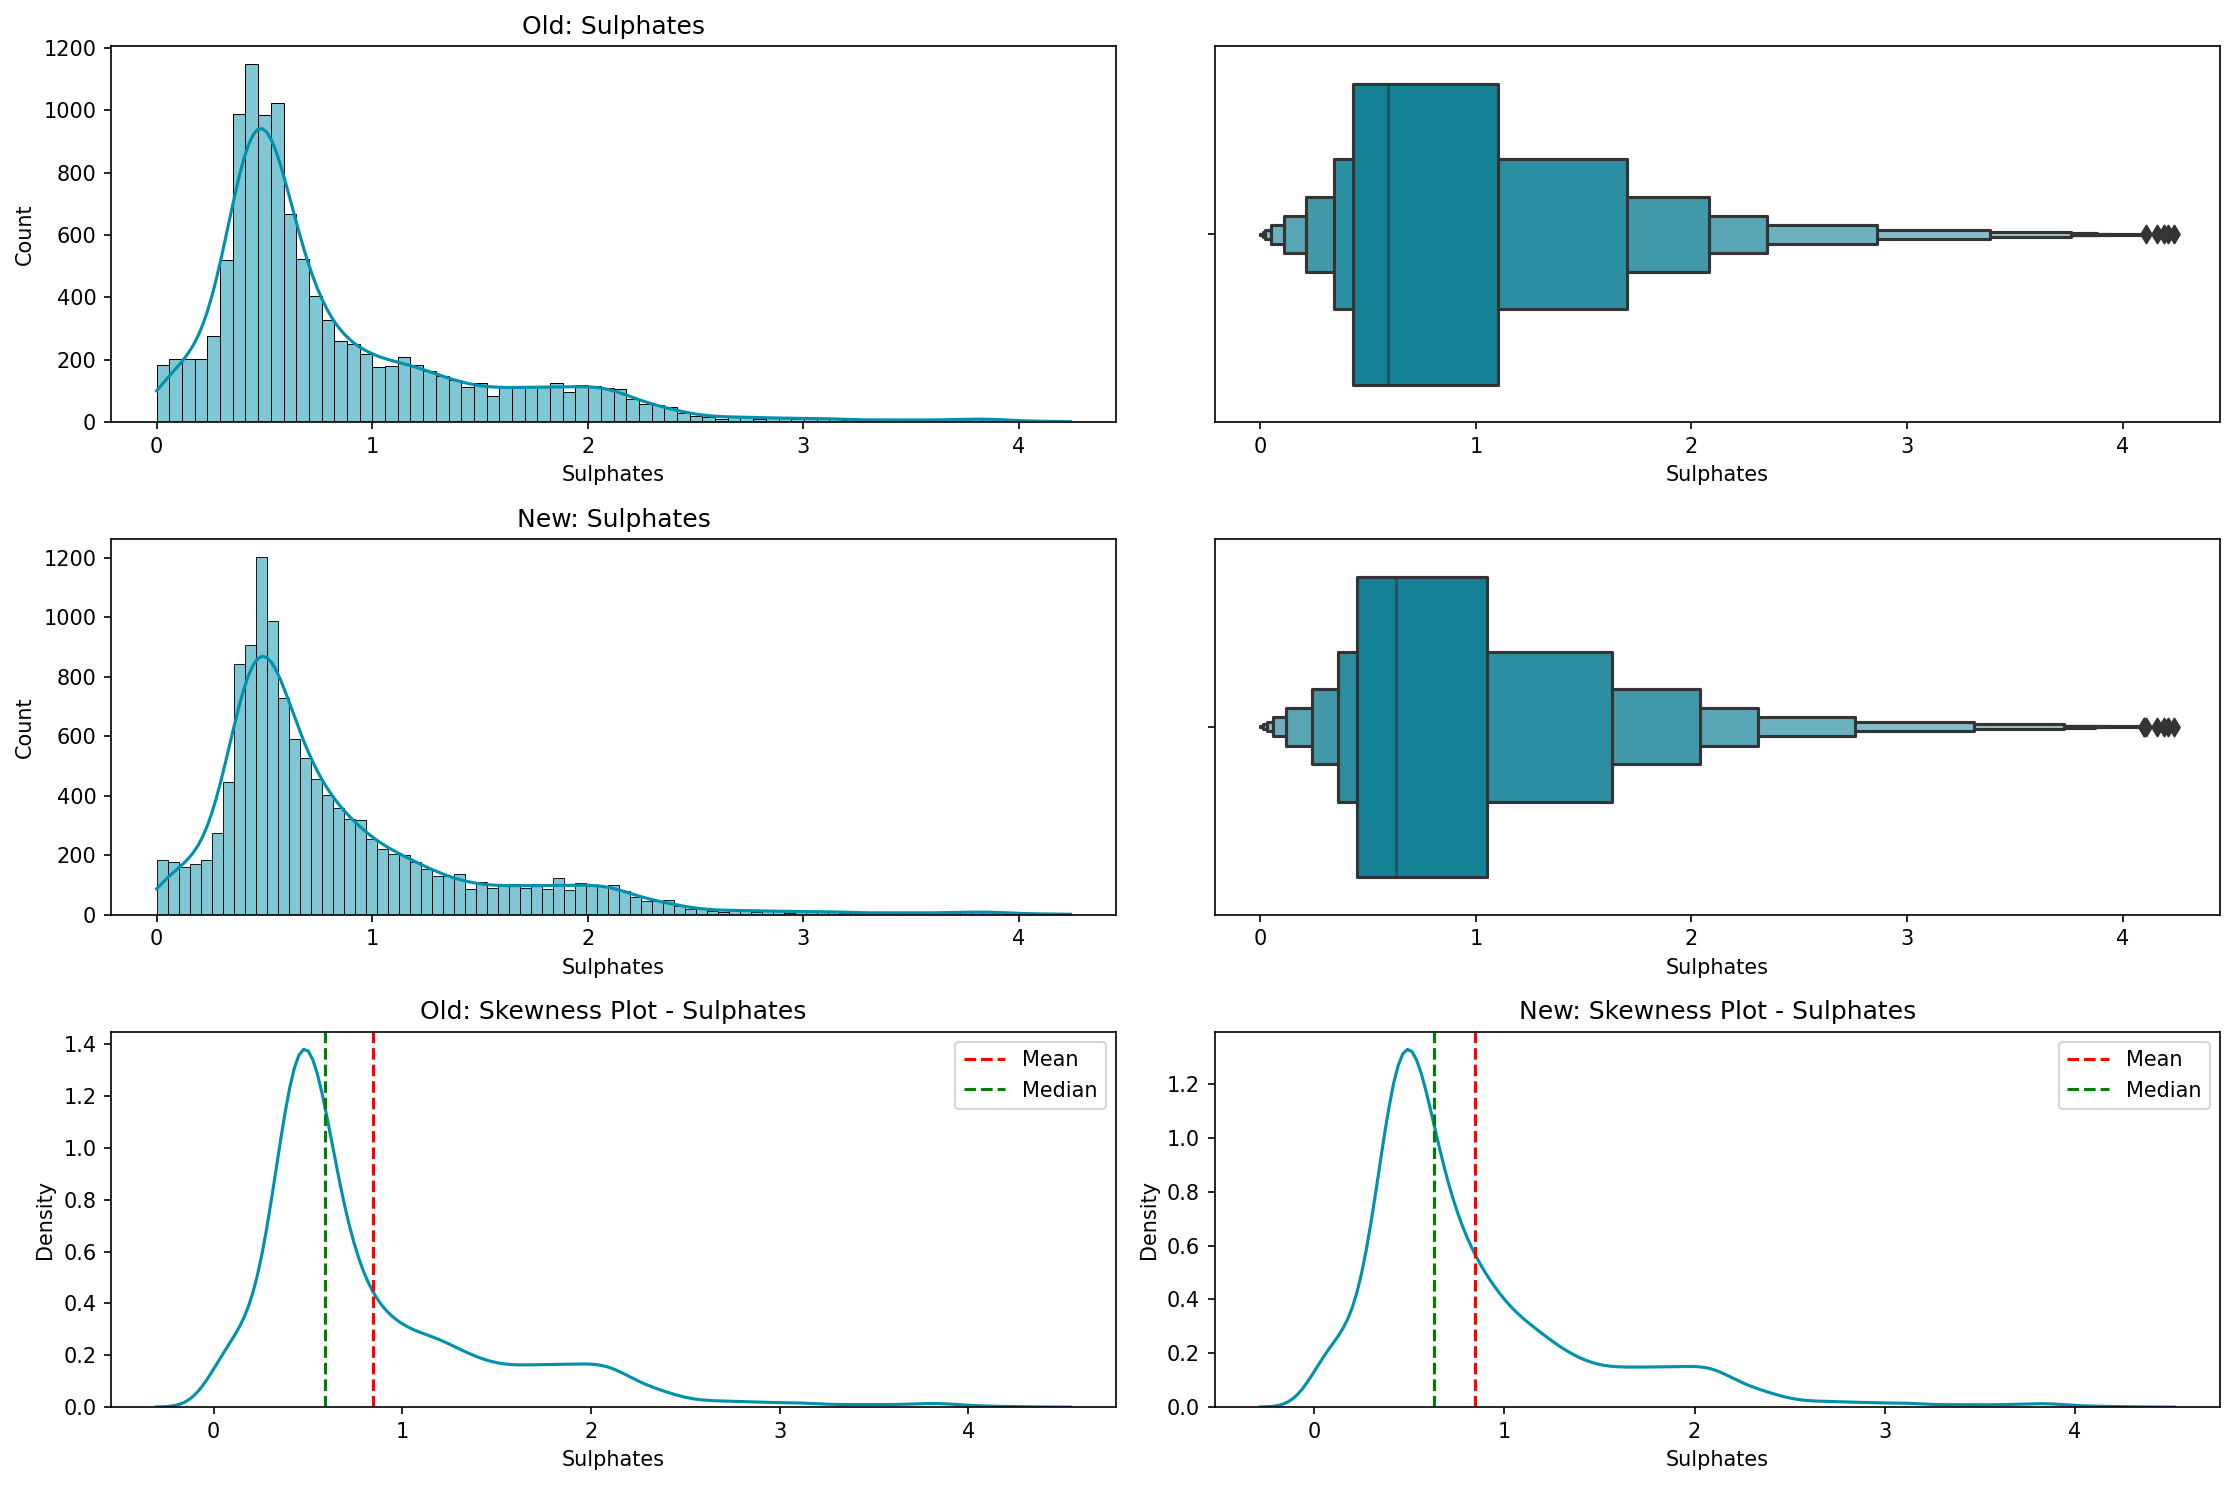

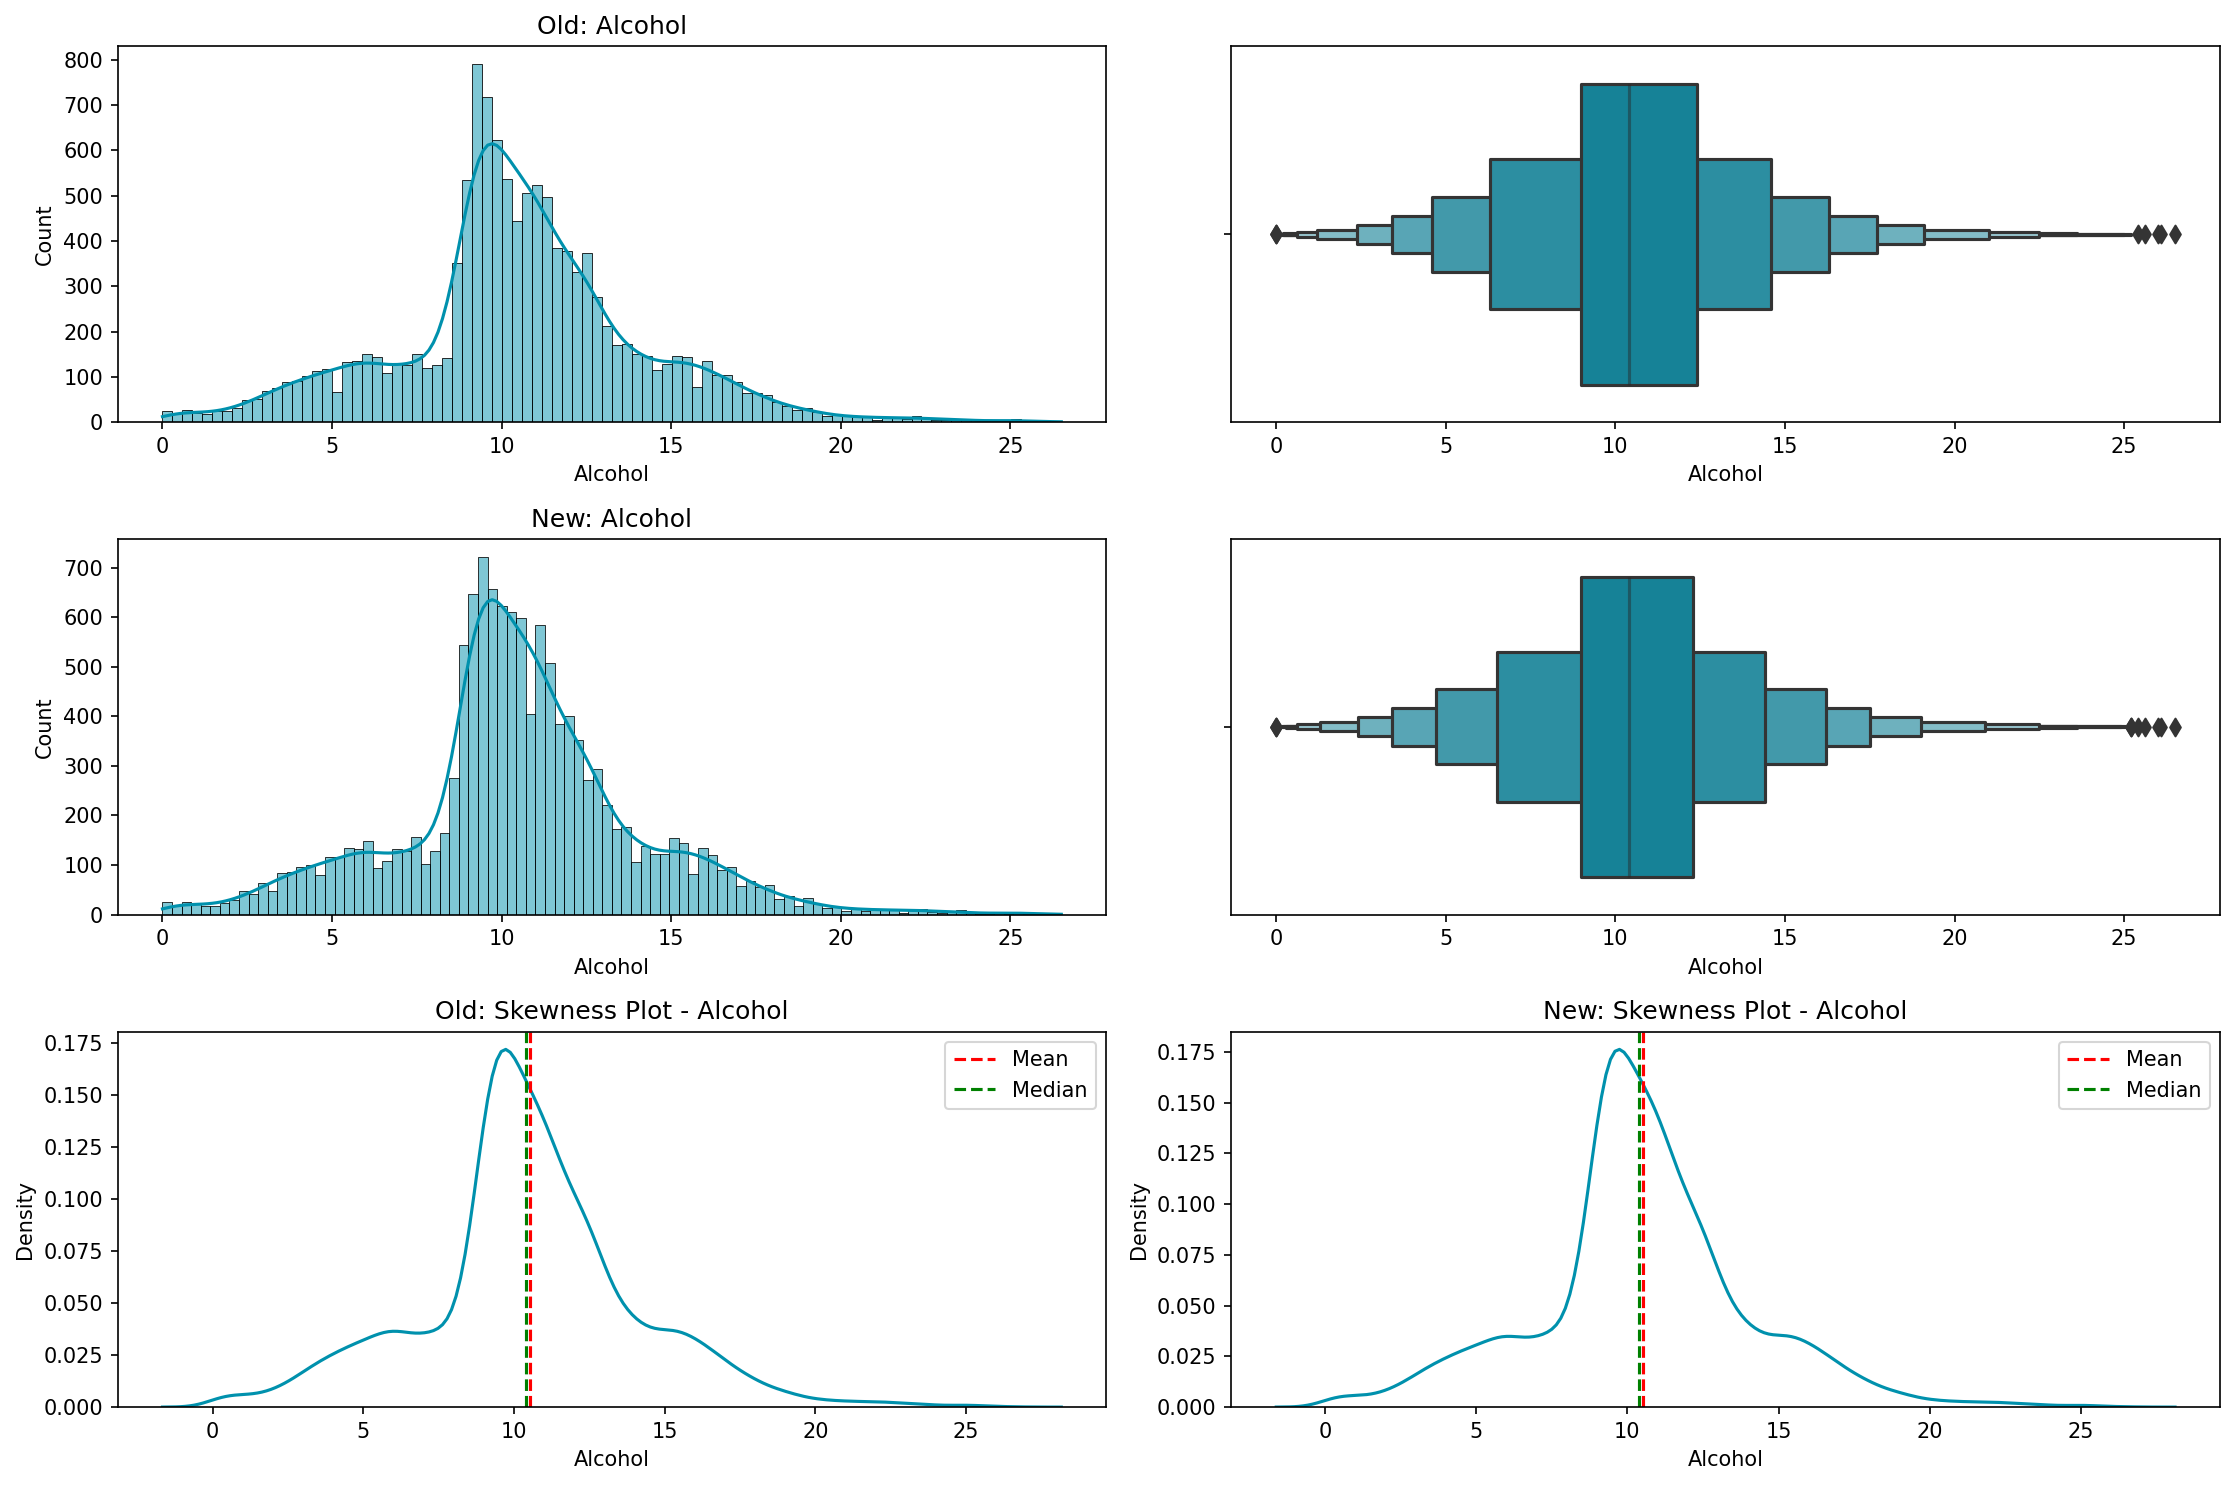

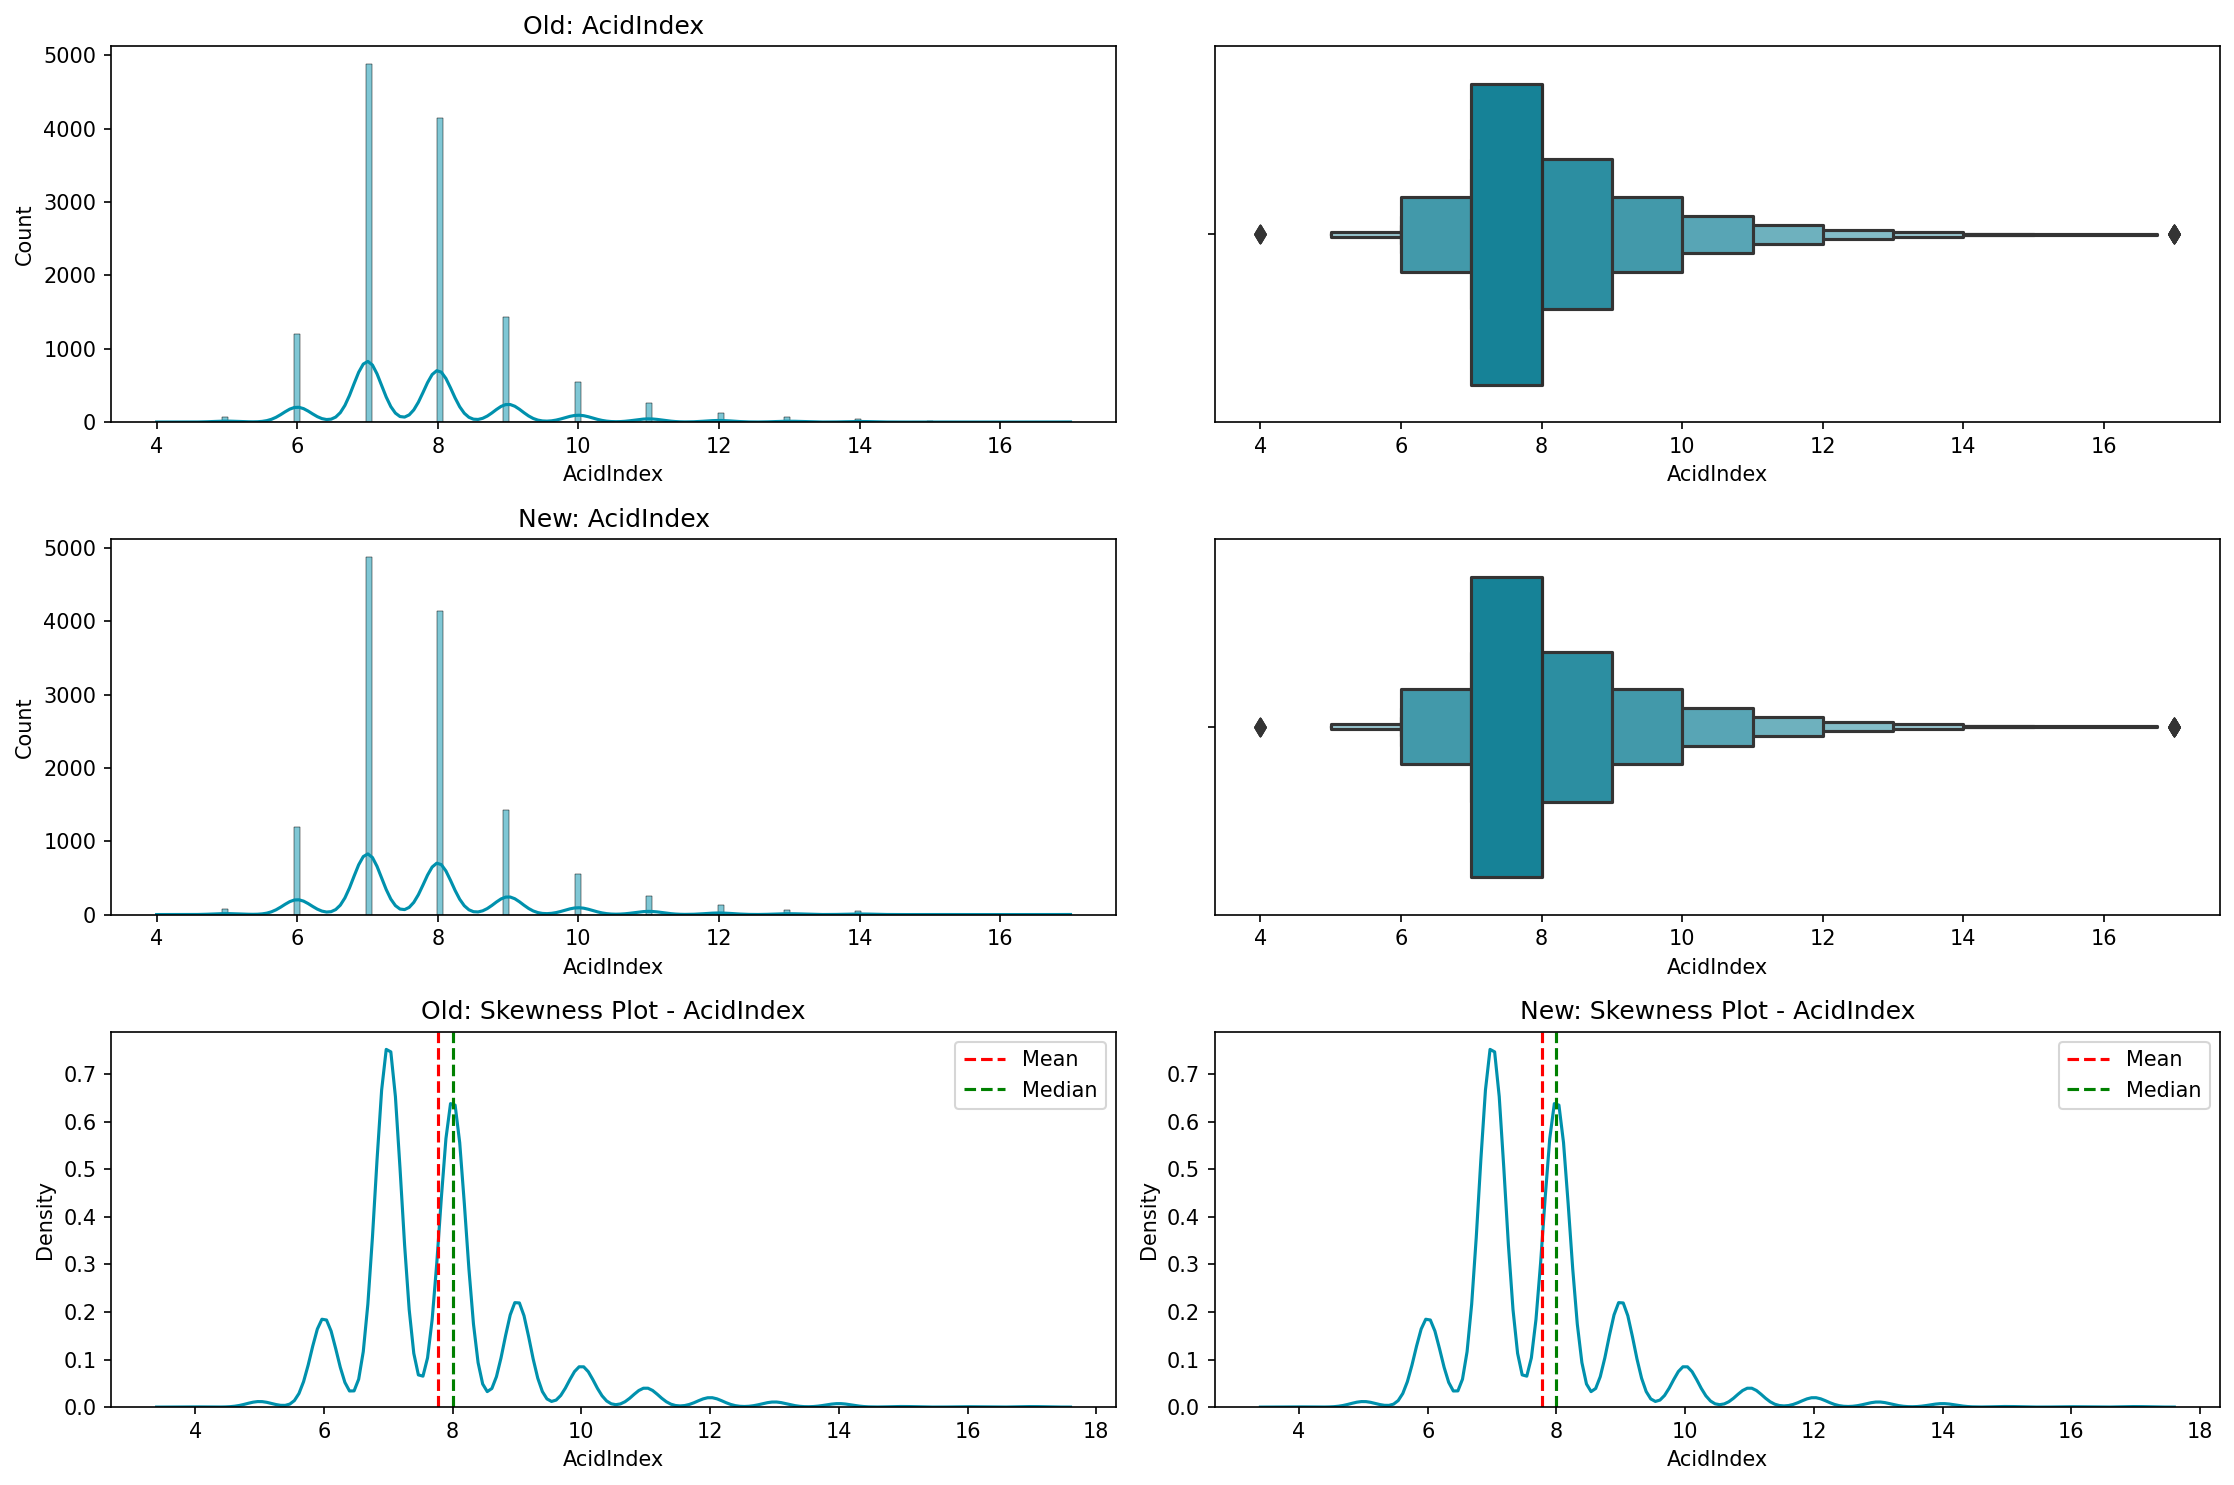

In [43]:
for i in range(len(numerics)):
    eda_modify(wine_df,knn_imput_data,numerics[i])


 Imputation process has successfully replaced the missing values in the numeric variables without changing the overall shape of the distributions of those variables. This is important because it means that the imputed data is still representative of the original data, even though some of the values are missing.

## Using  Numeric Power Transform

 Now, we apply a power transformation to the numeric variables in our dataset. Since none of our numeric variables are normally distributed and many of them are highly skewed, we need to transform them to avoid creating biased models.

In [44]:
knn_imput_data.describe()

TARGET  FixedAcidity  VolatileAcidity    CitricAcid  \
count  12795.000000  12795.000000     12795.000000  12795.000000   
mean       3.029074      8.063251         0.641086      0.686315   
std        1.926368      4.996119         0.555614      0.606005   
min        0.000000      0.000000         0.000000      0.000000   
25%        2.000000      5.600000         0.250000      0.280000   
50%        3.000000      7.000000         0.410000      0.440000   
75%        4.000000      9.800000         0.910000      0.970000   
max        8.000000     34.400000         3.680000      3.860000   

       ResidualSugar     Chlorides     bound_SO2  molecular_SO2       Density  \
count   12795.000000  12795.000000  12795.000000   12795.000000  12795.000000   
mean       23.493755      0.222359     98.161157       8.966081      0.994203   
std        24.399842      0.228984    185.260803      21.971268      0.026538   
min         0.000000      0.000000   -588.000000       0.000000      0.888090   
25%         4.000000      0.046000      2.000000       0.840183      0.987720   
50%        14.100000      0.117000     86.000000       2.689292      0.994490   
75%        37.700000      0.355000    173.000000       8.133551      1.000515   
max       141.150000      1.351000   1023.000000     447.616375      1.099240   

                 pH     Sulphates       Alcohol     AcidIndex  
count  12795.000000  12795.000000  12795.000000  12795.000000  
mean       3.208361      0.844841     10.512681      7.772724  
std        0.670020      0.626730      3.549920      1.323926  
min        0.480000      0.000000      0.000000      4.000000  
25%        2.970000      0.450000      9.000000      7.000000  
50%        3.200000      0.630000     10.400000      8.000000  
75%        3.460000      1.050000     12.300000      8.000000  
max        6.130000      4.240000     26.500000     17.000000

We noticed that almost every feature in the data contains values of zero. This means that the data is not strictly positive, which is required for a Box-Cox transform. Instead, we used a similar transformation called the Yeo-Johnson transform, which can handle zero-valued data

In [46]:
power_transfrom_data = pd.DataFrame(power_transform(knn_imput_data, method = 'yeo-johnson'), columns = numerics)

power_transfrom_data

TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0     -0.022910     -1.037598         1.188476    0.870101       1.225505   
1     -0.022910     -0.656103        -1.229951    0.618760       0.551477   
2      1.026705     -0.032265         1.974423    0.728871       0.065752   
3     -0.022910     -0.349979        -0.275866   -1.877882       0.266326   
4      0.500437      0.154703        -0.470192    1.187288      -0.296326   
...         ...           ...              ...         ...            ...   
12790 -1.564922     -0.524077         0.695624    1.702357      -0.754142   
12791  1.026705      0.330673        -0.012646   -0.672968       1.664609   
12792  0.500437     -0.278740        -1.177097    1.018488       0.866886   
12793 -0.022910      0.093692        -0.507832   -1.421735       0.762012   
12794  0.500437     -0.473134        -1.971396    0.618760       1.198669   

       Chlorides  bound_SO2  molecular_SO2   Density        pH  Sulphates  \
0       1.466206   0.068281      -0.264286 -0.055455  0.176660  -0.229115   
1       1.177011   1.139382      -1.202829  1.272266  0.251529   0.036787   
2      -1.050877  -0.920258       0.934419  0.034235 -0.137174  -0.537661   
3       1.177011  -0.003840       0.578235  0.080226 -1.440410   1.512947   
4       0.096968  -0.843542       0.767558  0.011243 -0.137174   1.466689   
...          ...        ...            ...       ...       ...        ...   
12790  -0.982160  -0.051292      -1.160134  0.622774  0.266510  -0.281767   
12791   0.604740   0.599865      -1.524796  0.034235  1.881323   0.890482   
12792  -0.616564  -0.056568      -0.798531 -0.132299  0.056985   0.020969   
12793  -1.145508   0.806908      -1.448065 -0.138325  1.139015  -0.152750   
12794   0.167975   0.222143      -0.866981  0.010112  1.093716  -2.009838   

        Alcohol  AcidIndex  
0     -0.162350   0.364300  
1      0.662571  -0.547262  
2      3.161048   0.364300  
3     -1.217292  -1.793104  
4      0.898160   1.055072  
...         ...        ...  
12790 -1.595211  -3.574677  
12791  0.129862   0.364300  
12792  0.509662  -1.793104  
12793  0.146671  -1.793104  
12794 -0.162350  -0.547262  

[12795 rows x 13 columns]

## Exploratory Data Analysis (EDA): Final Step

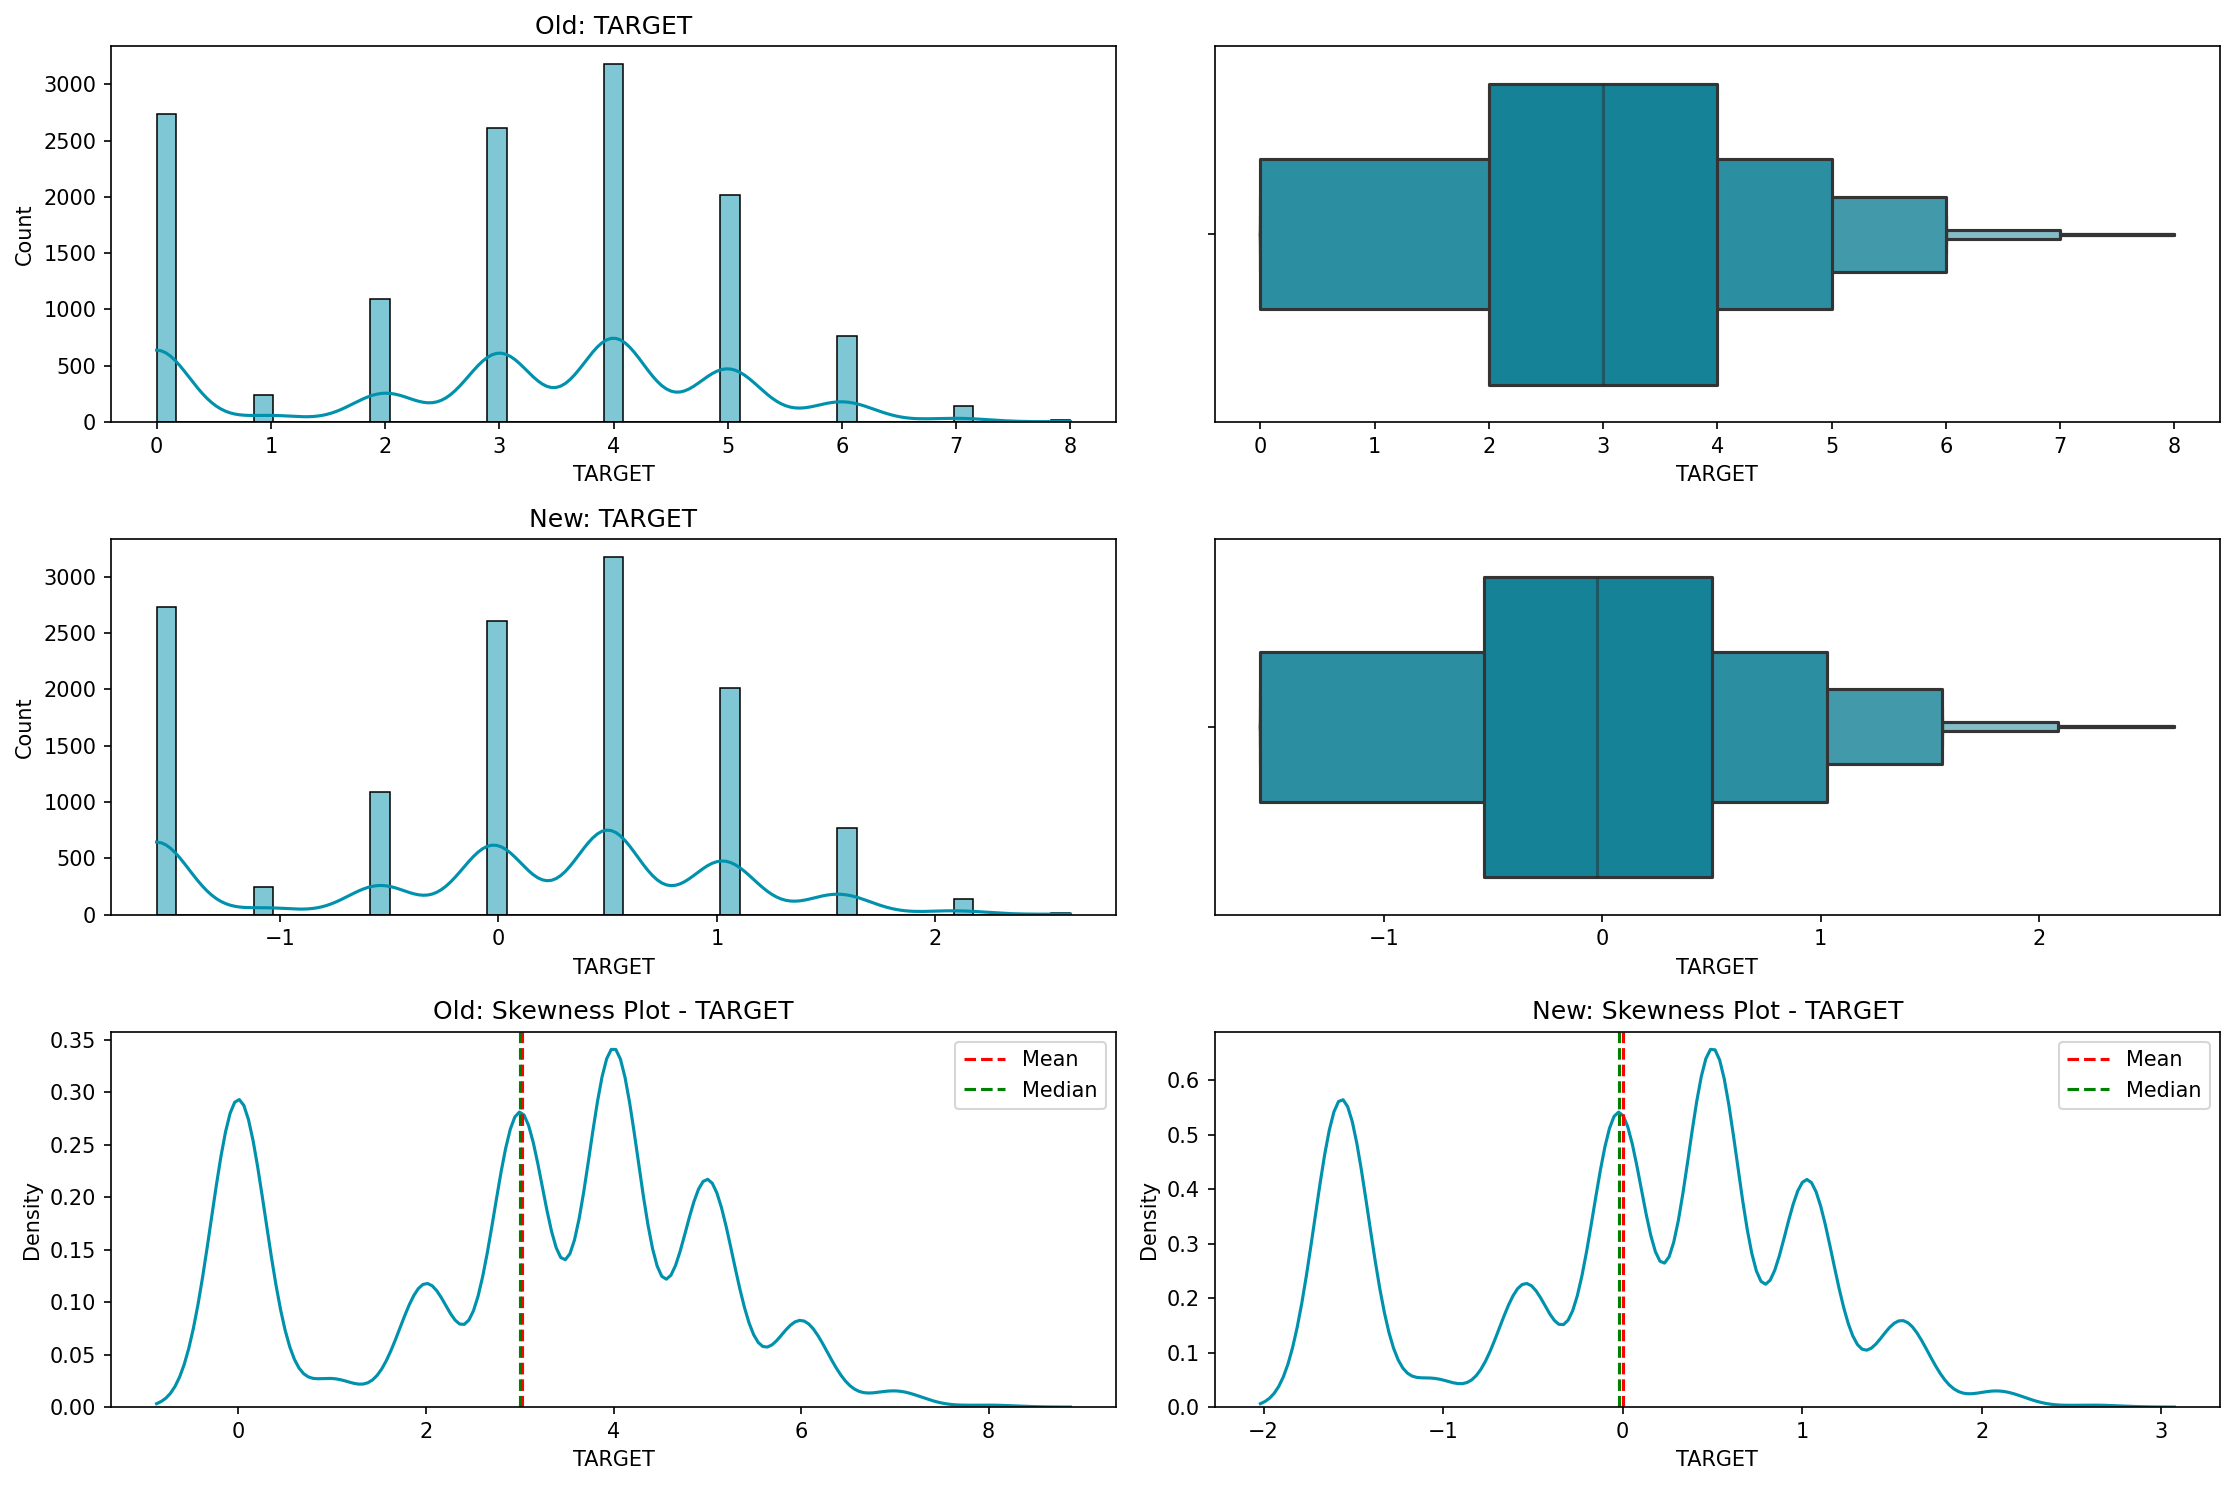

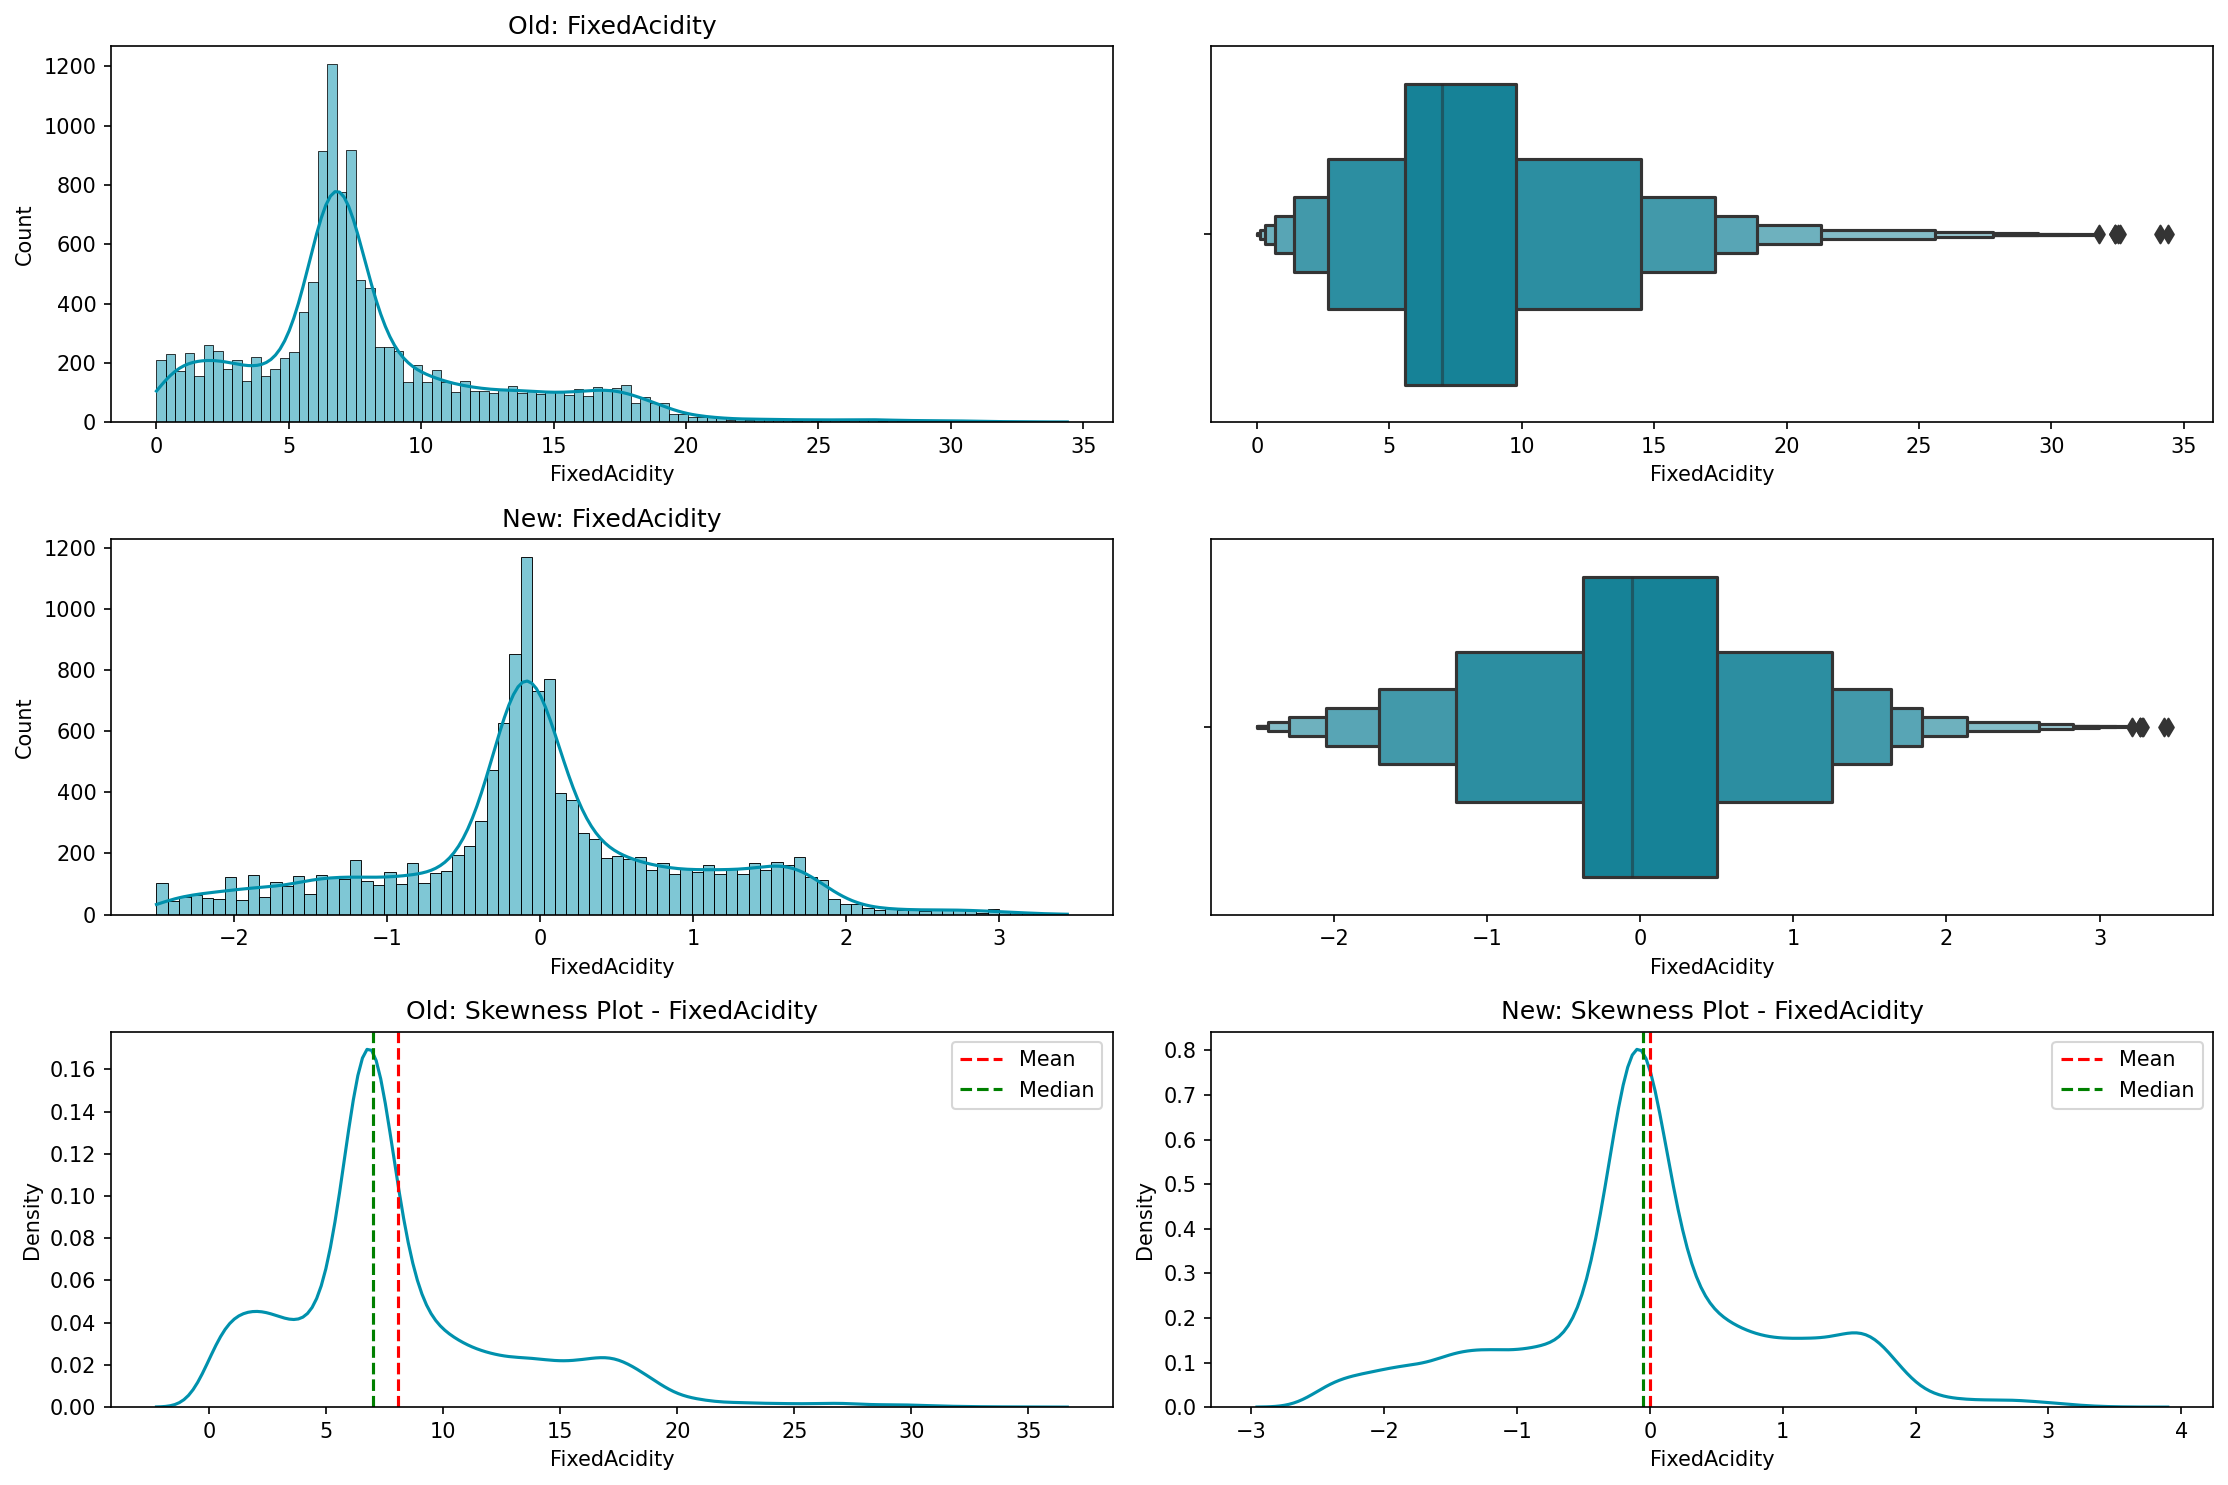

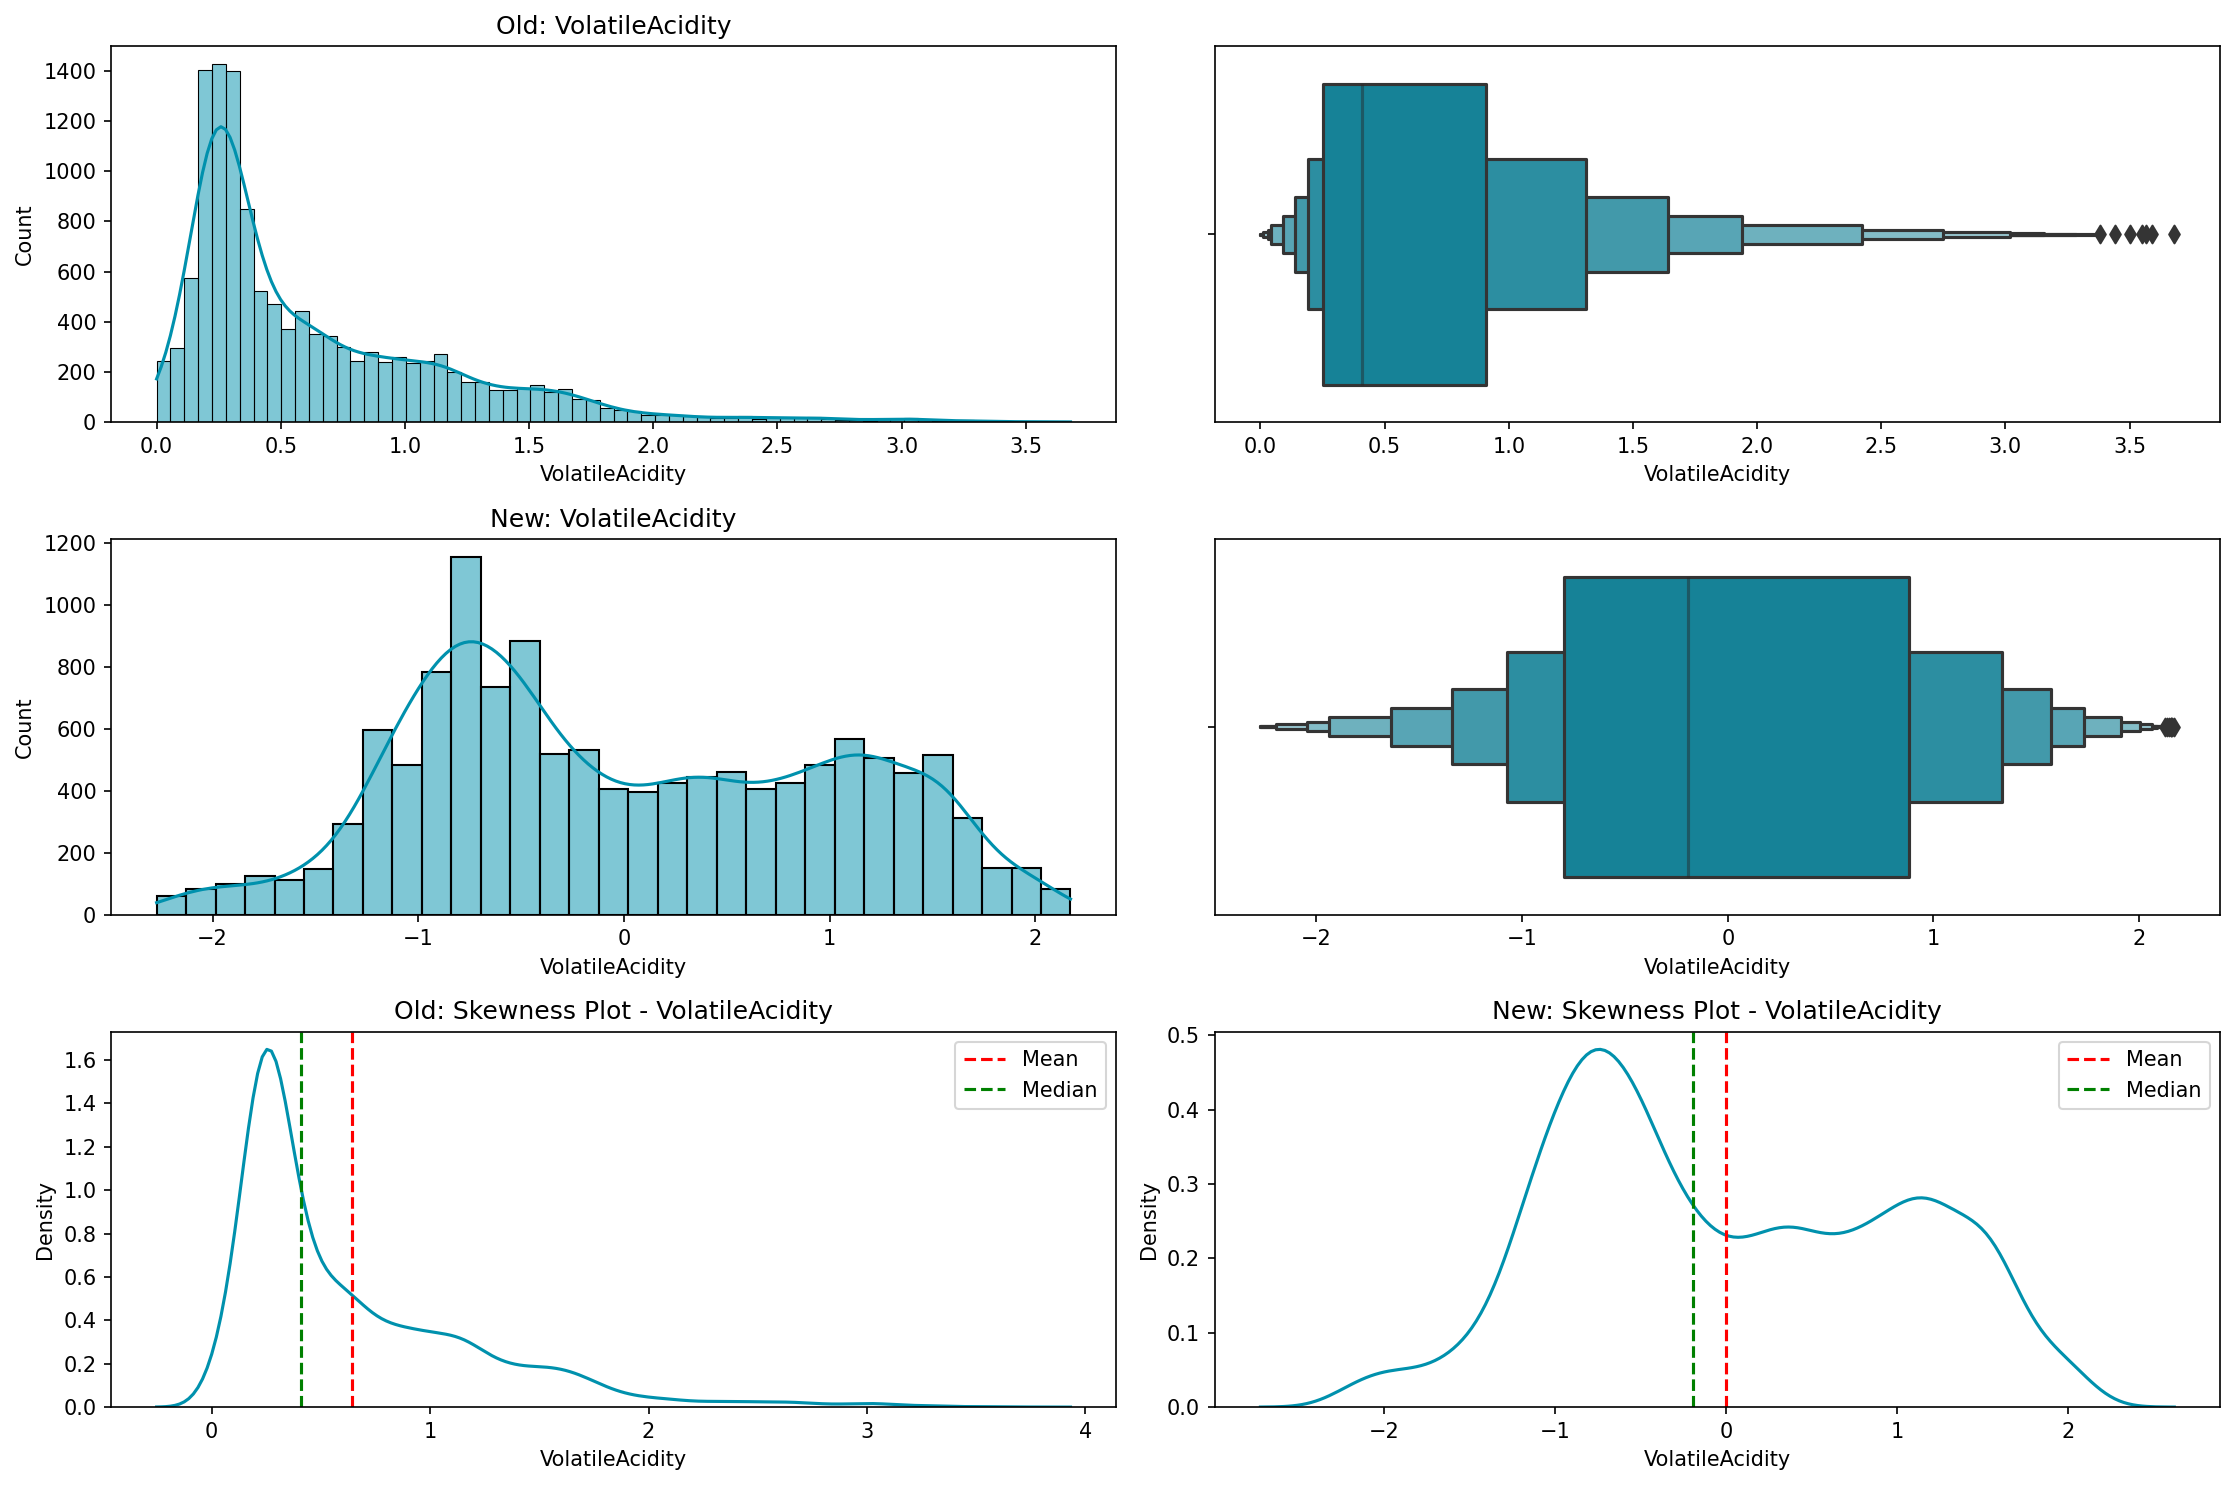

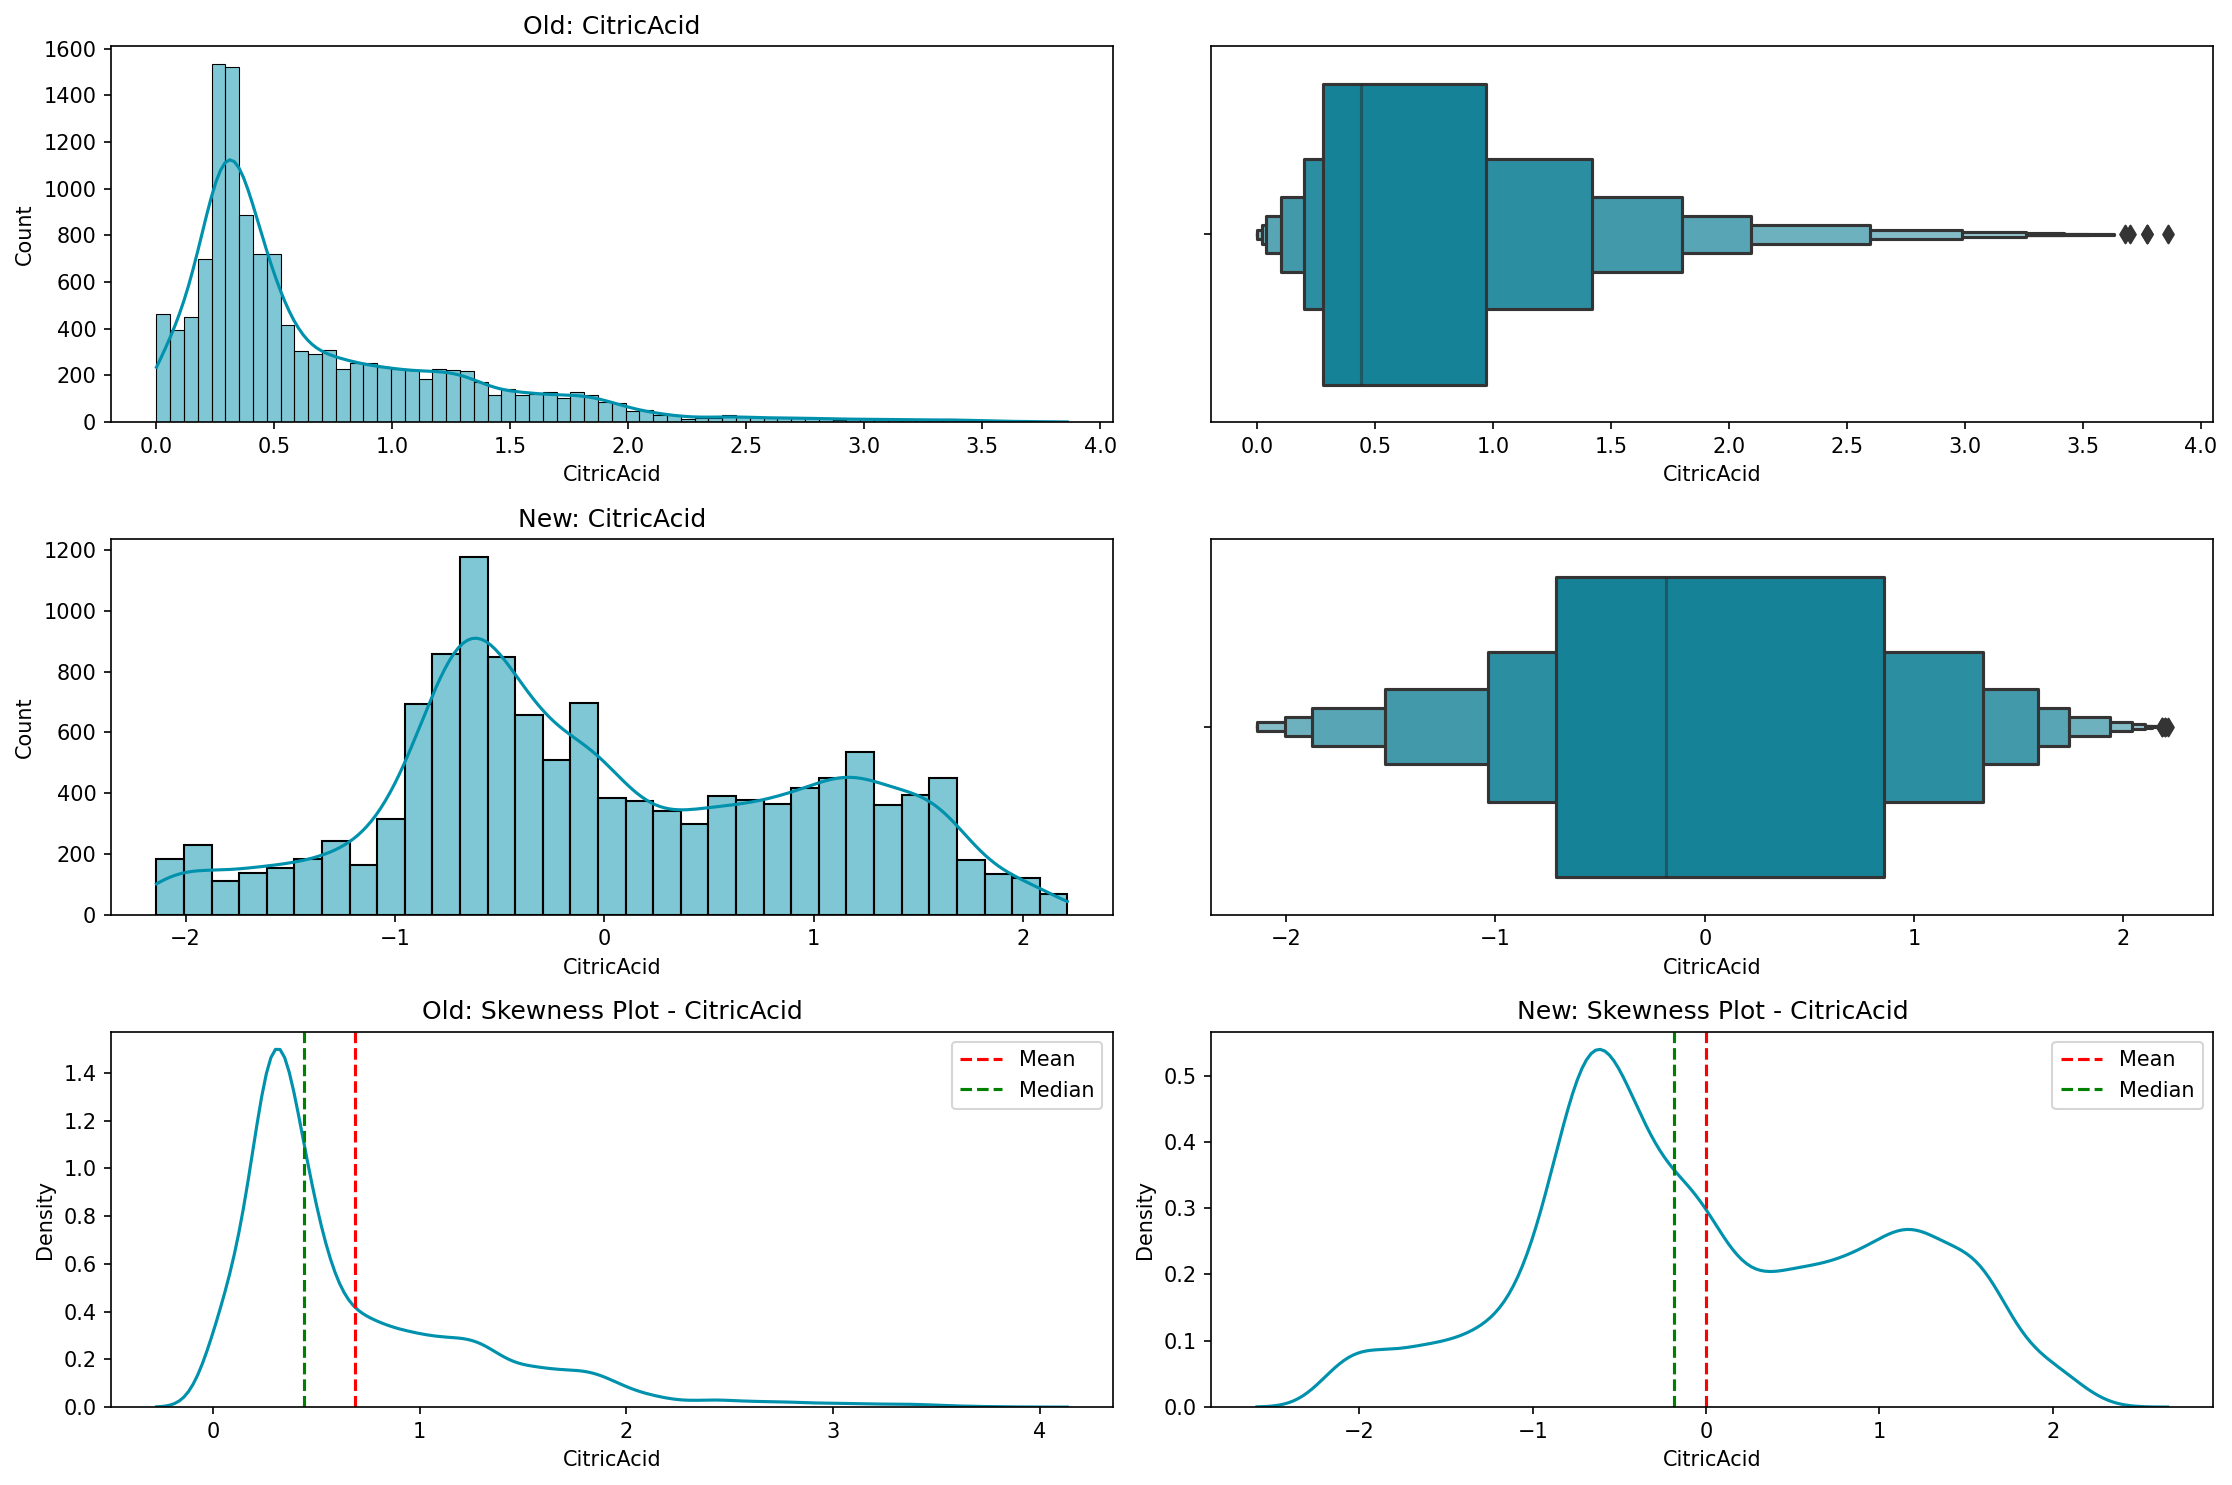

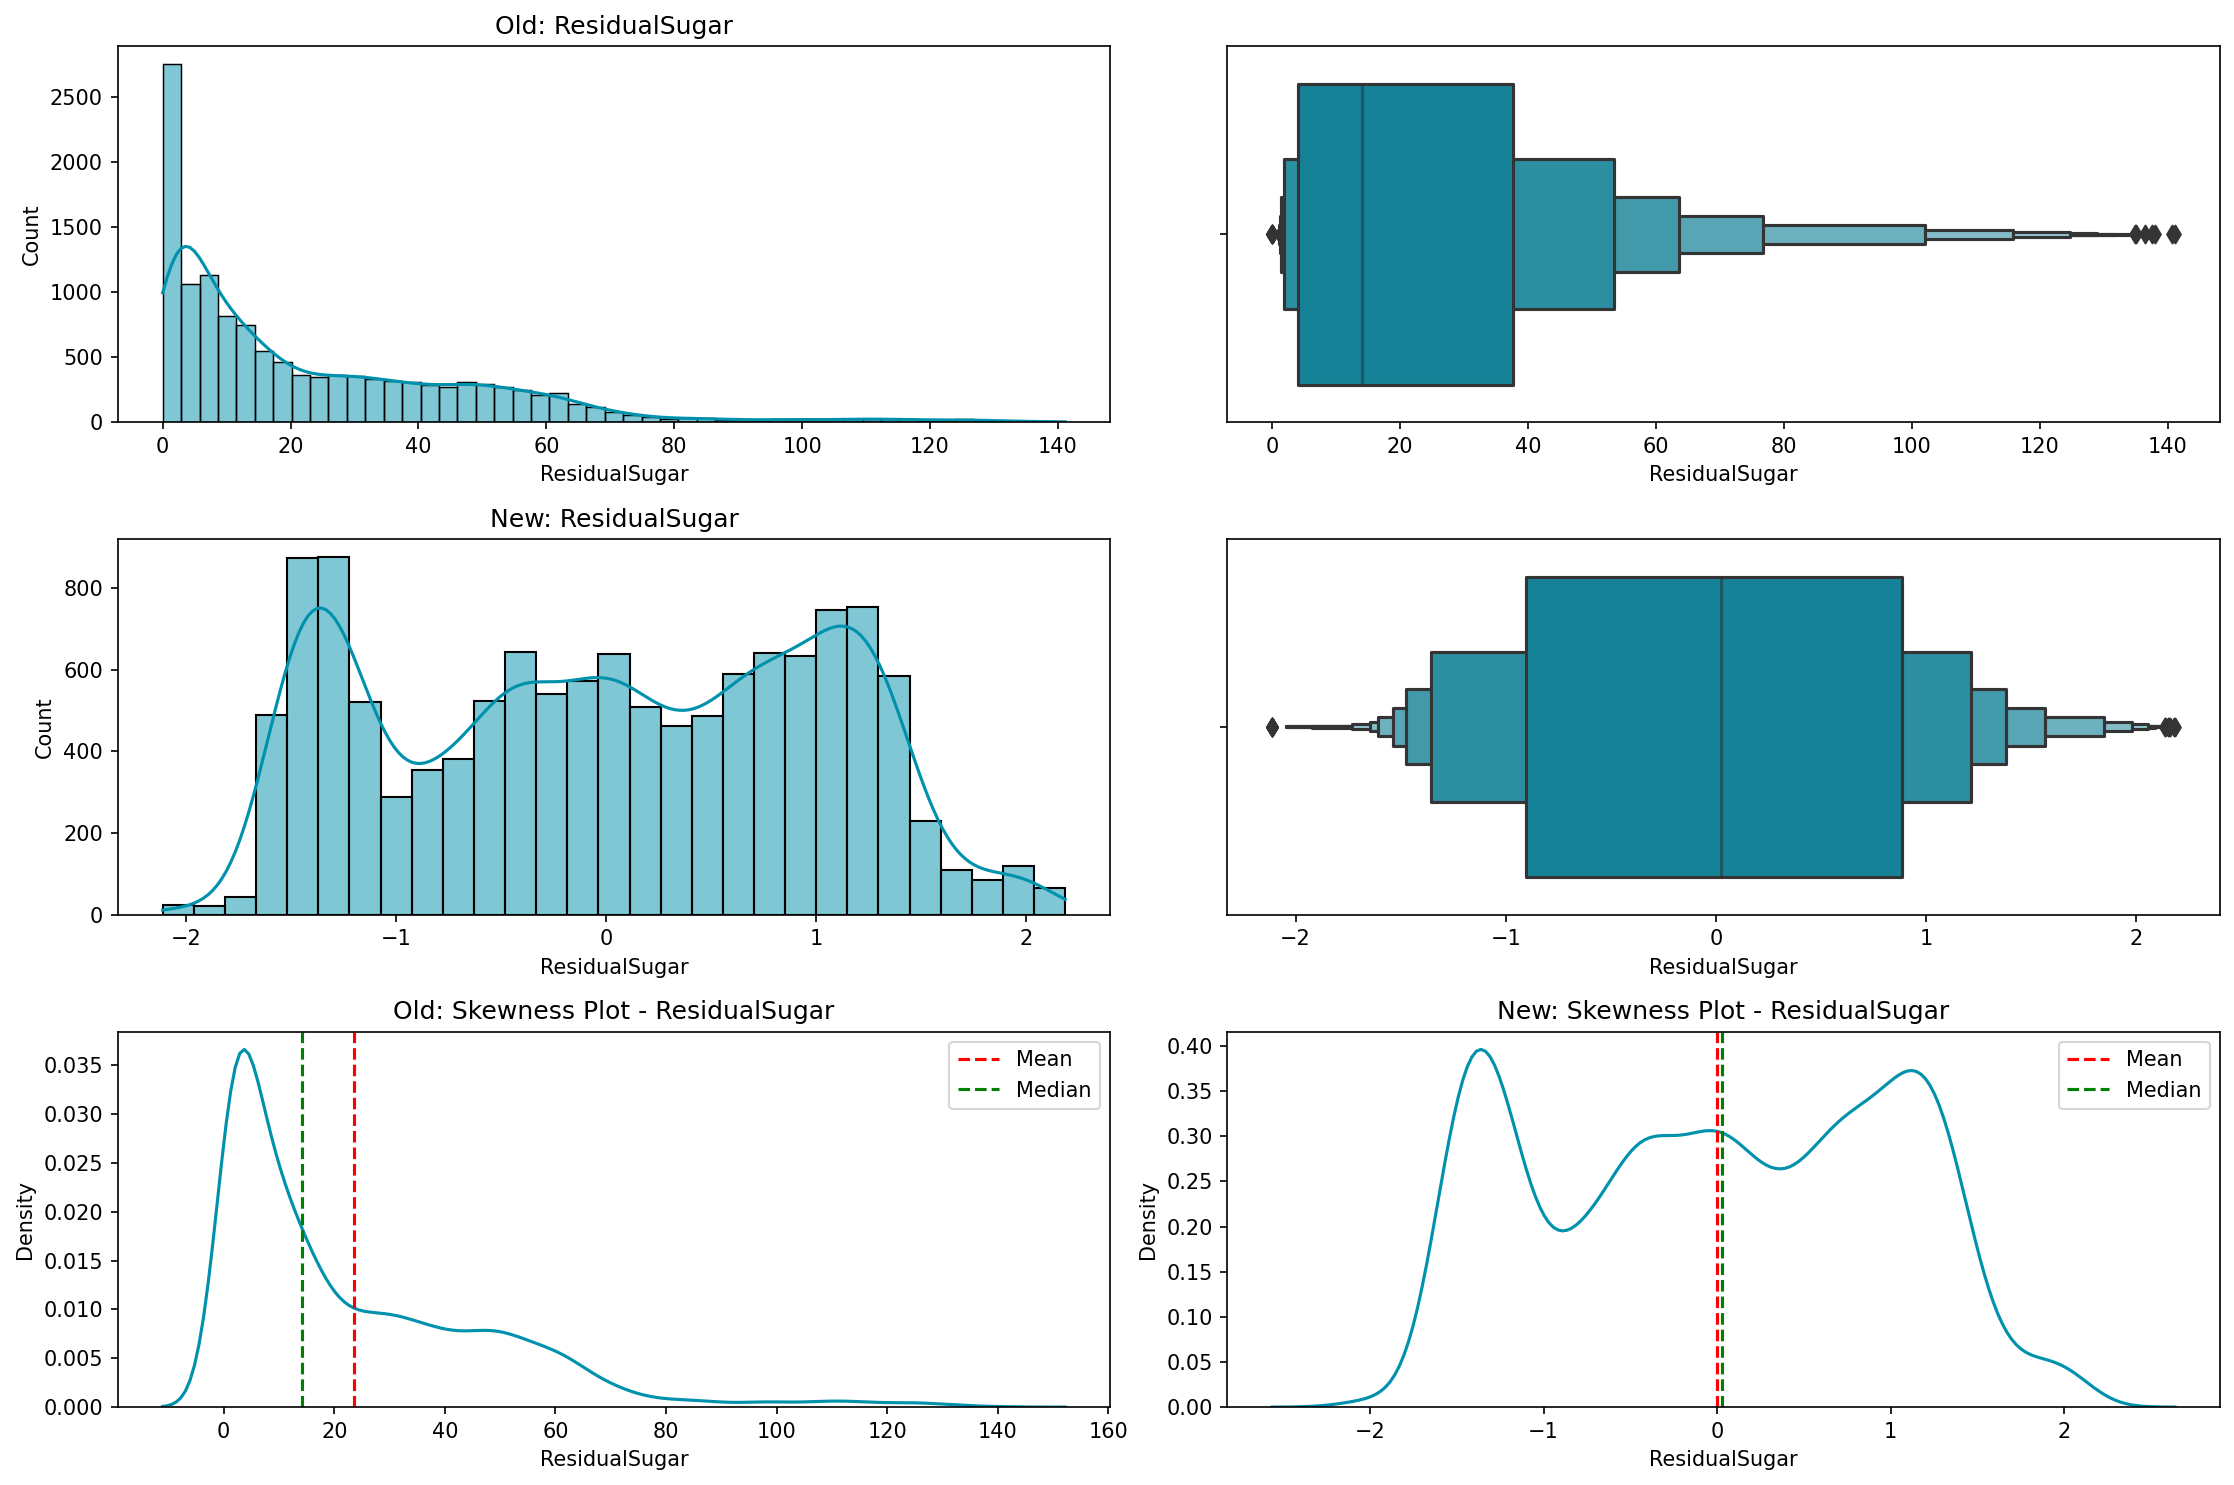

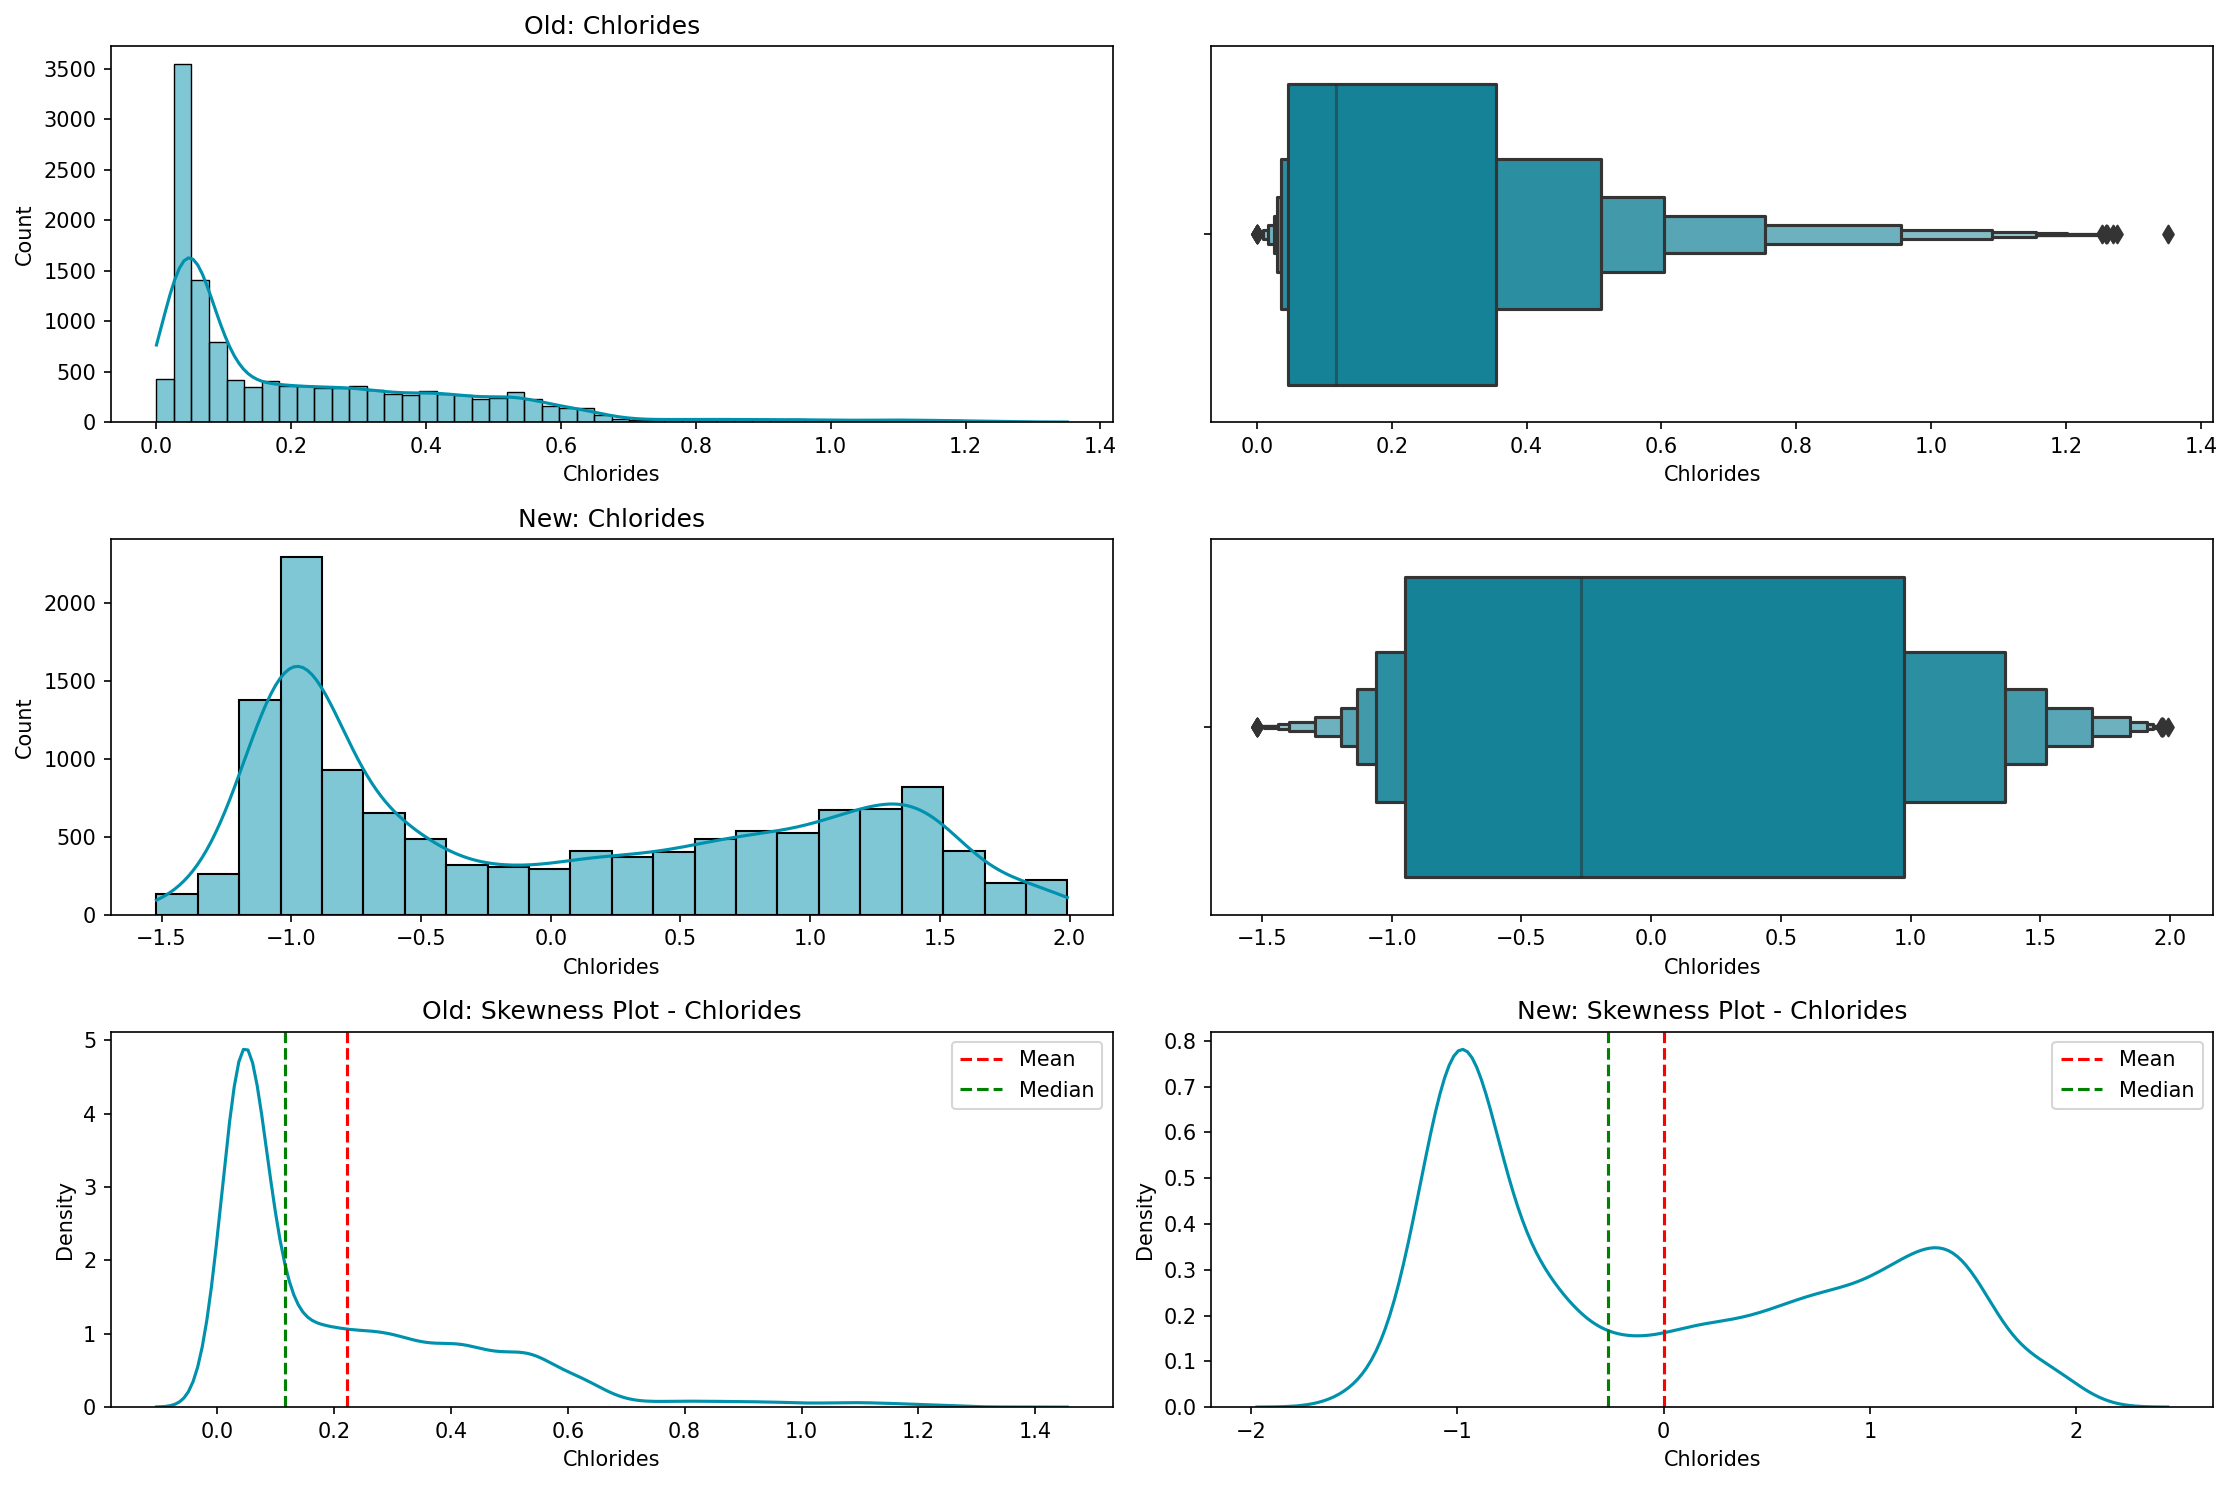

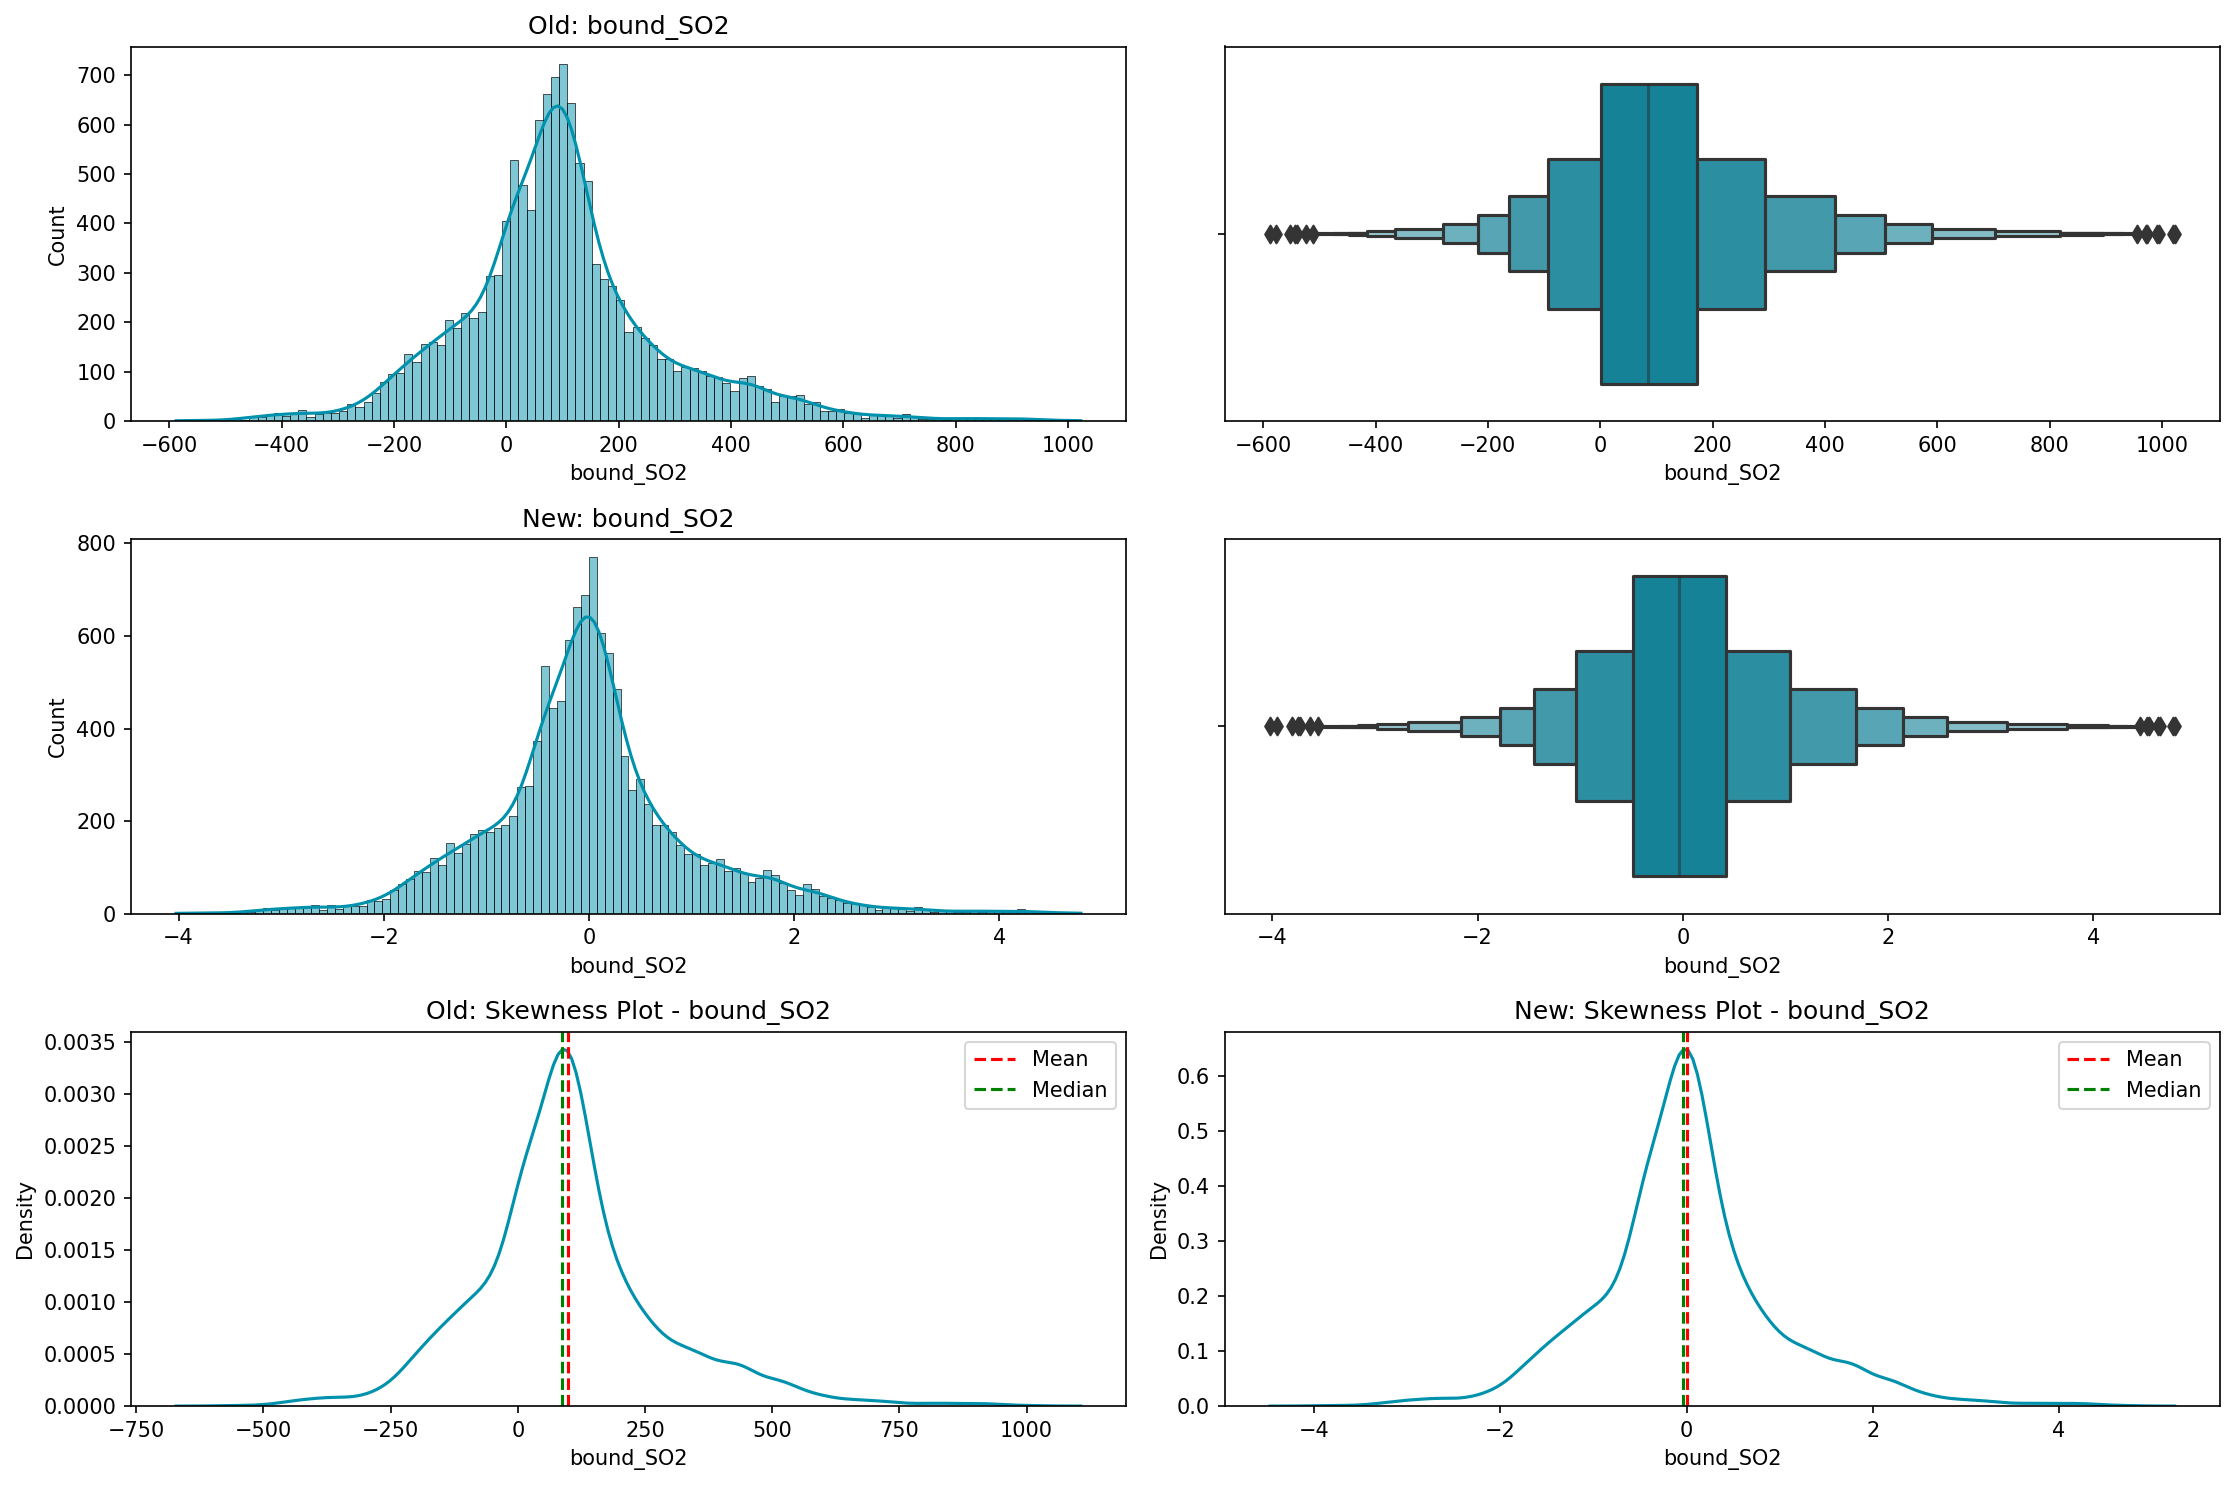

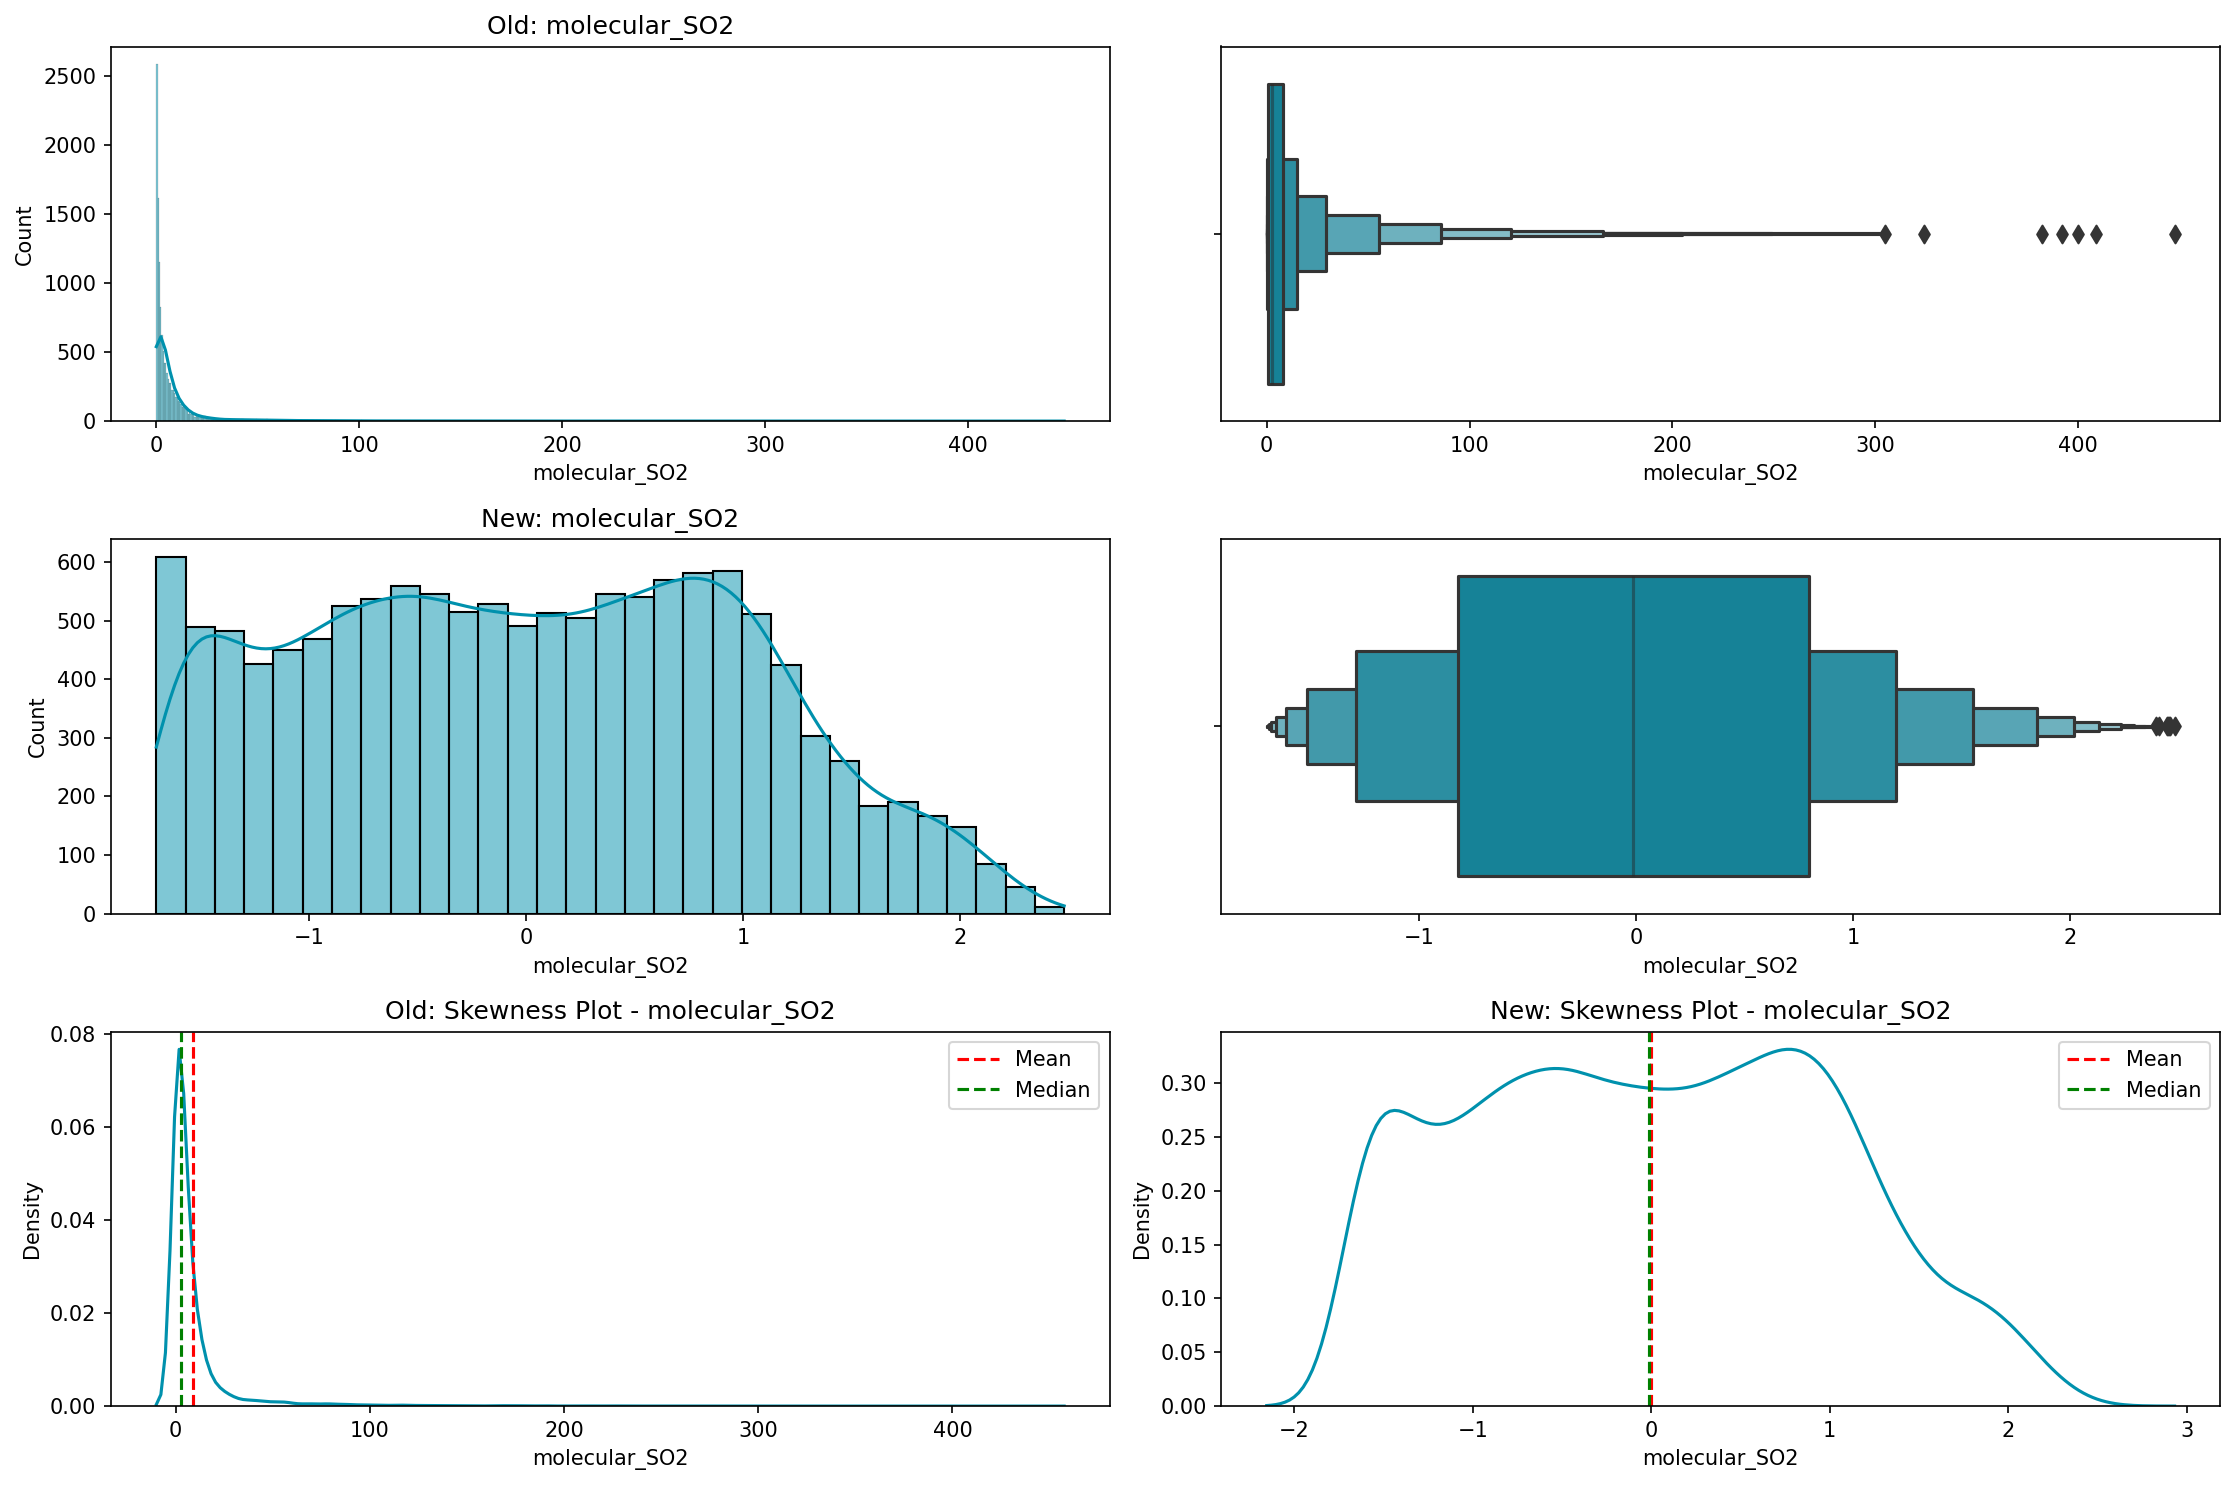

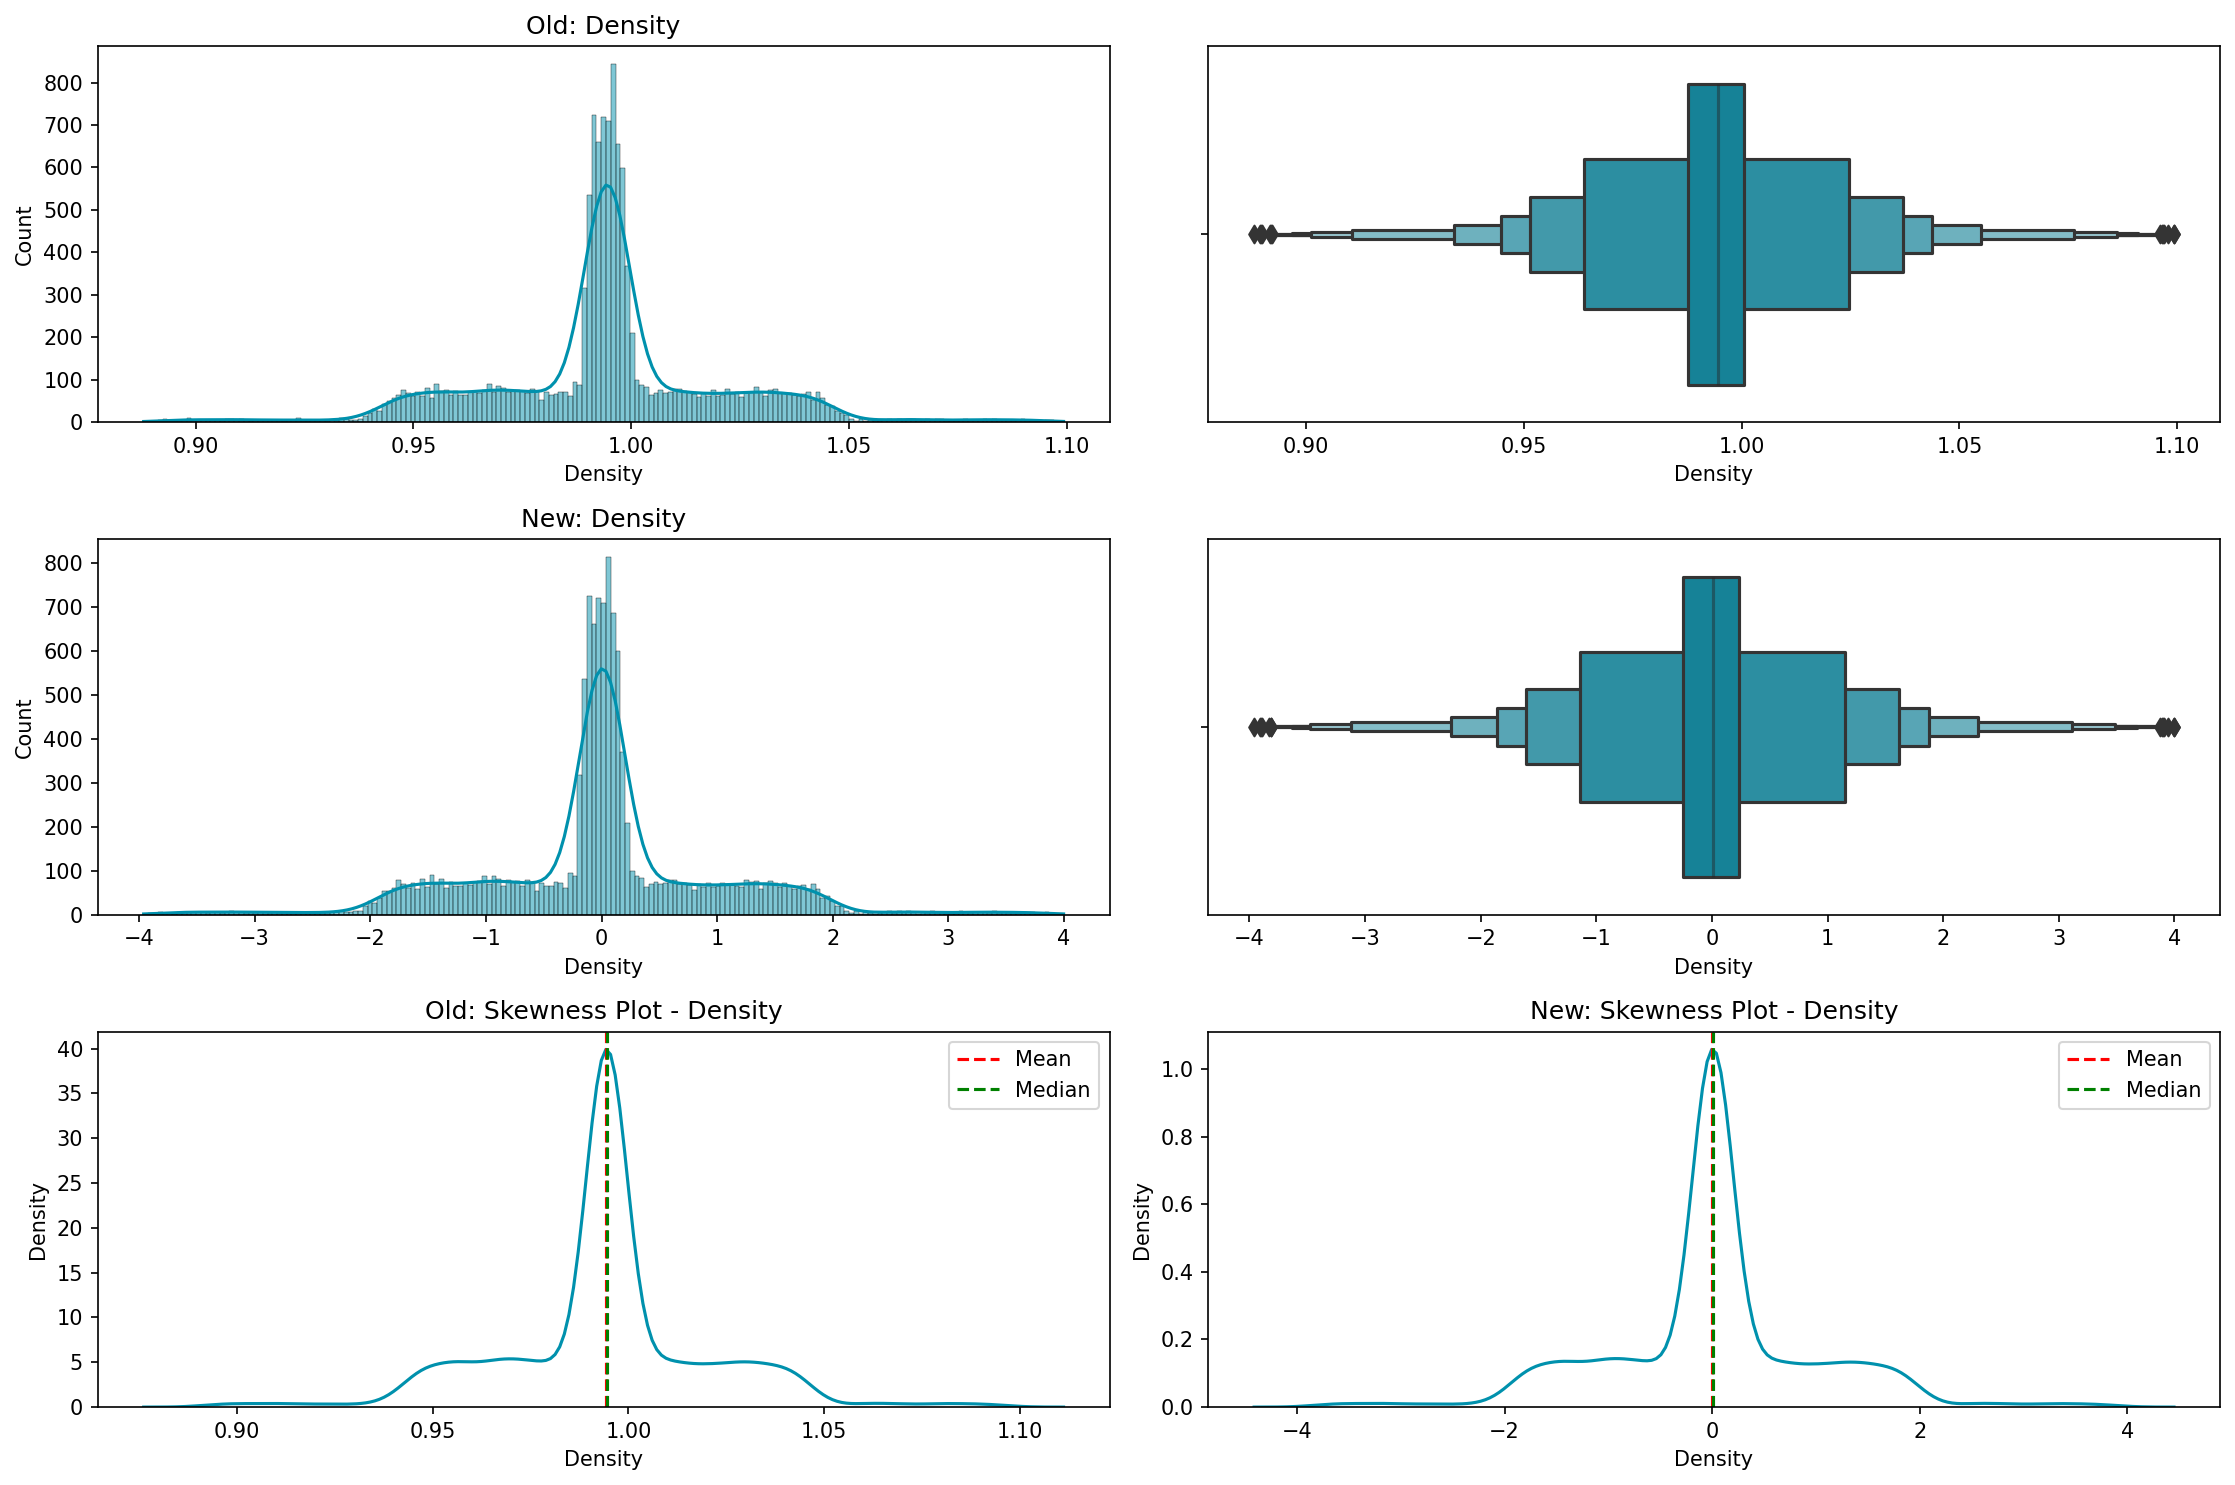

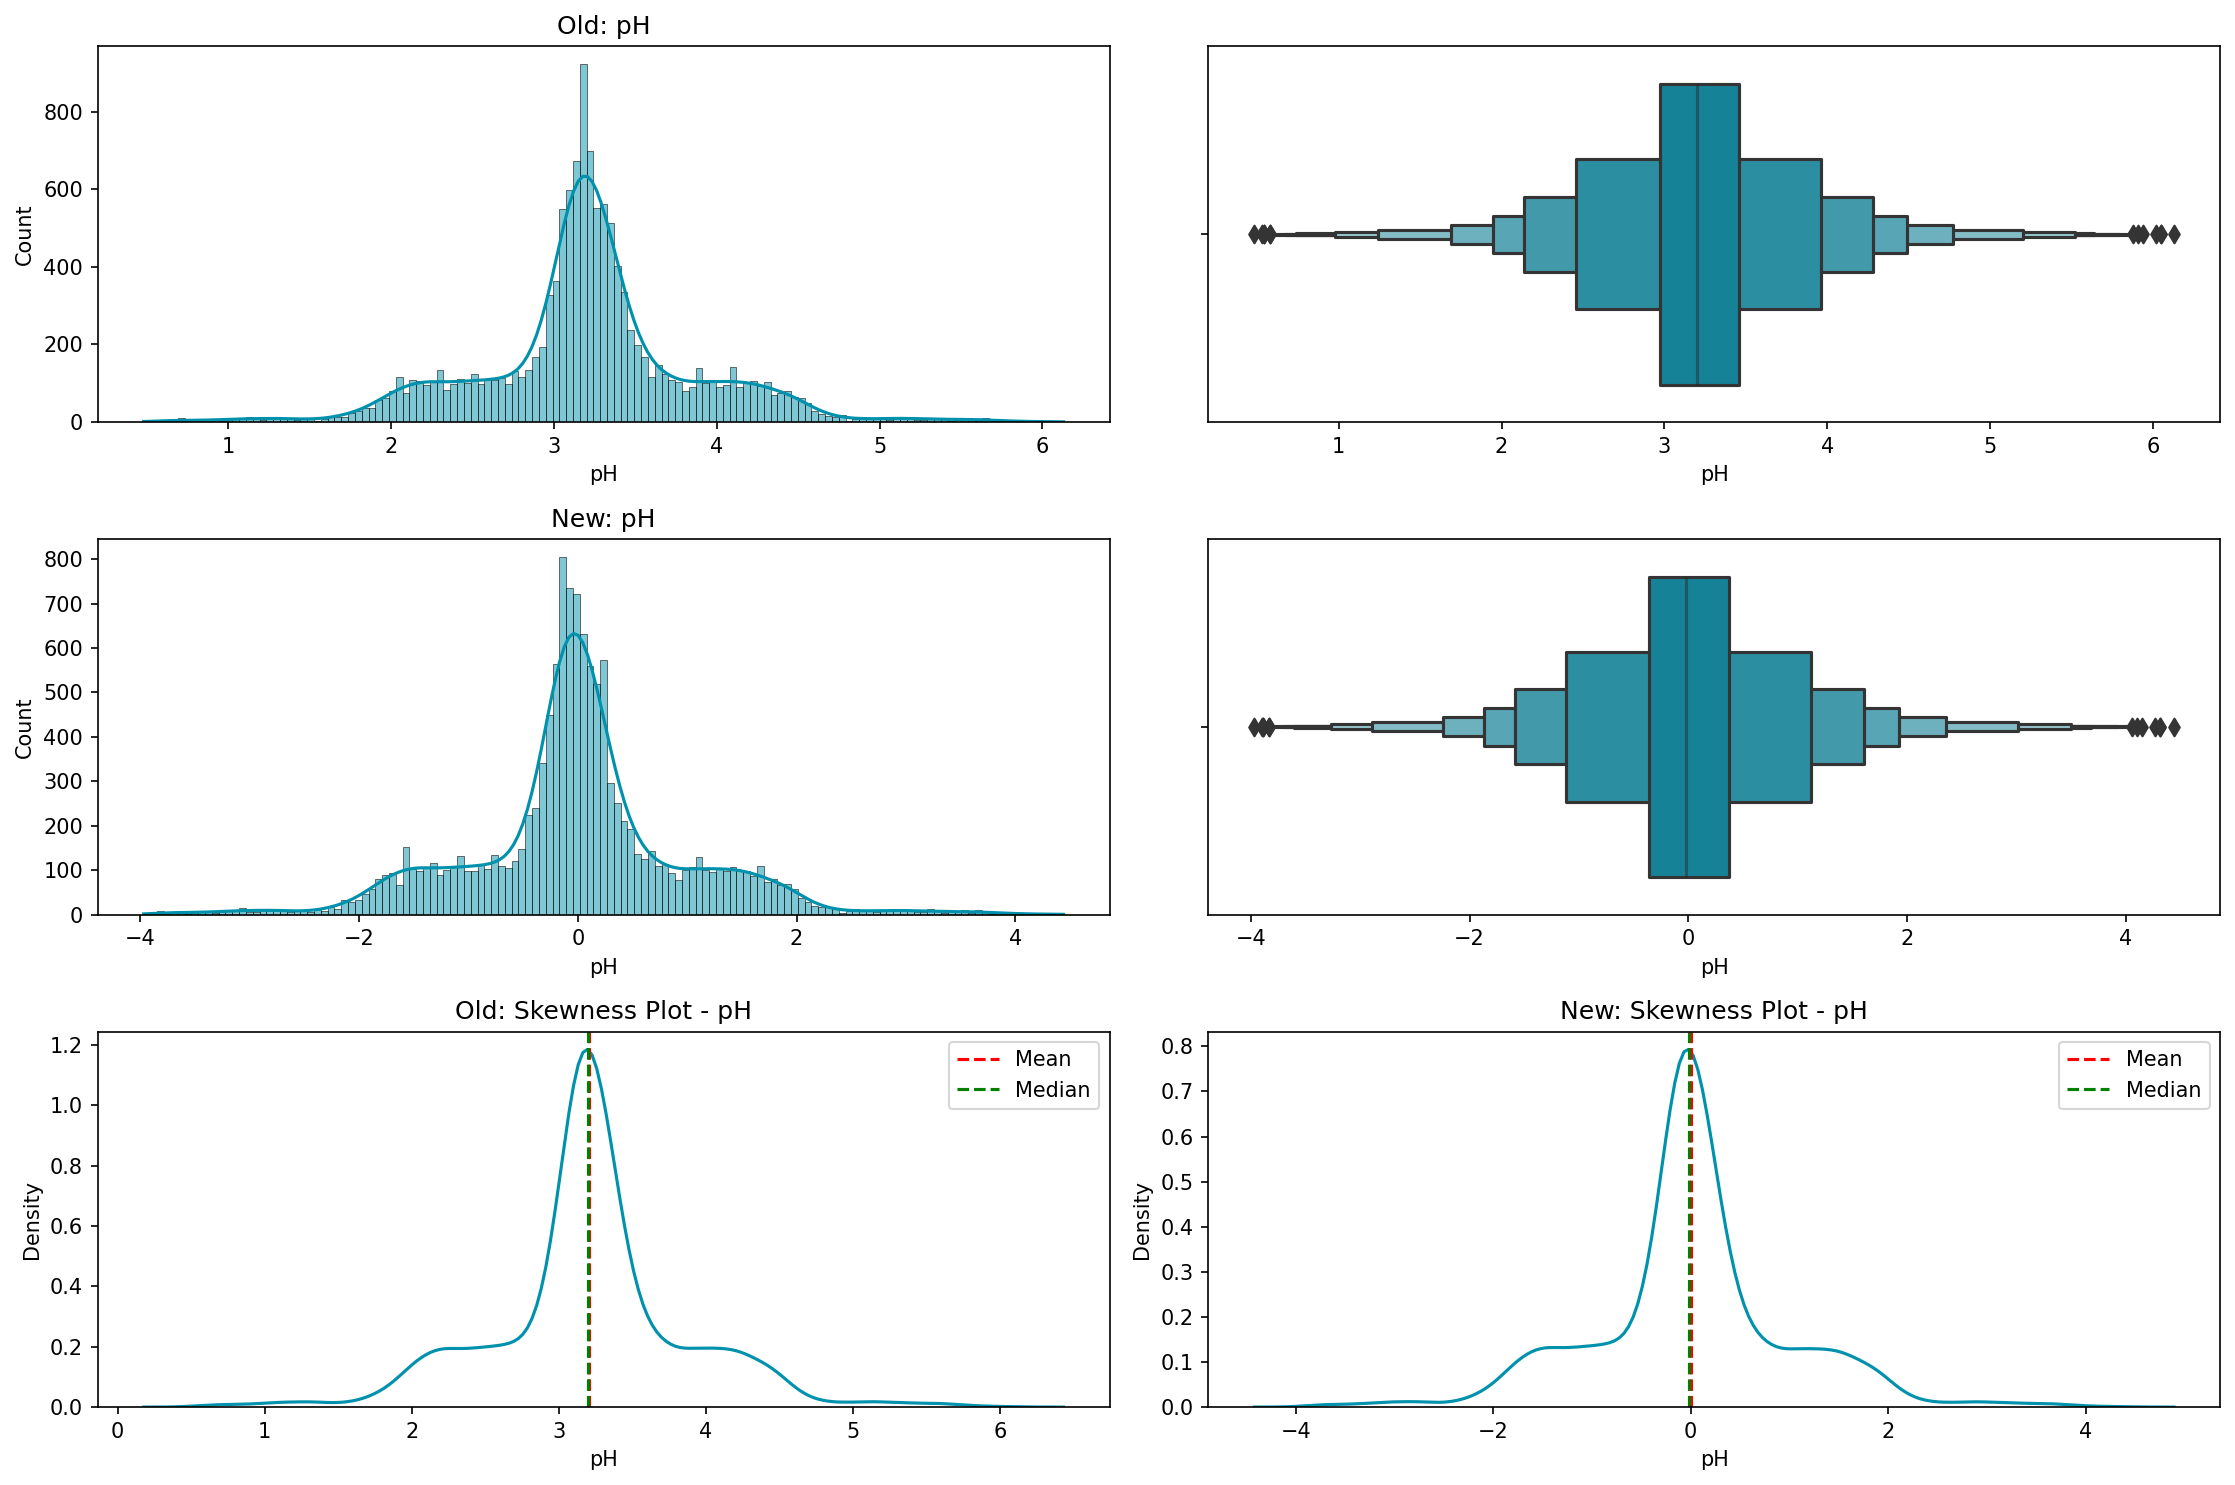

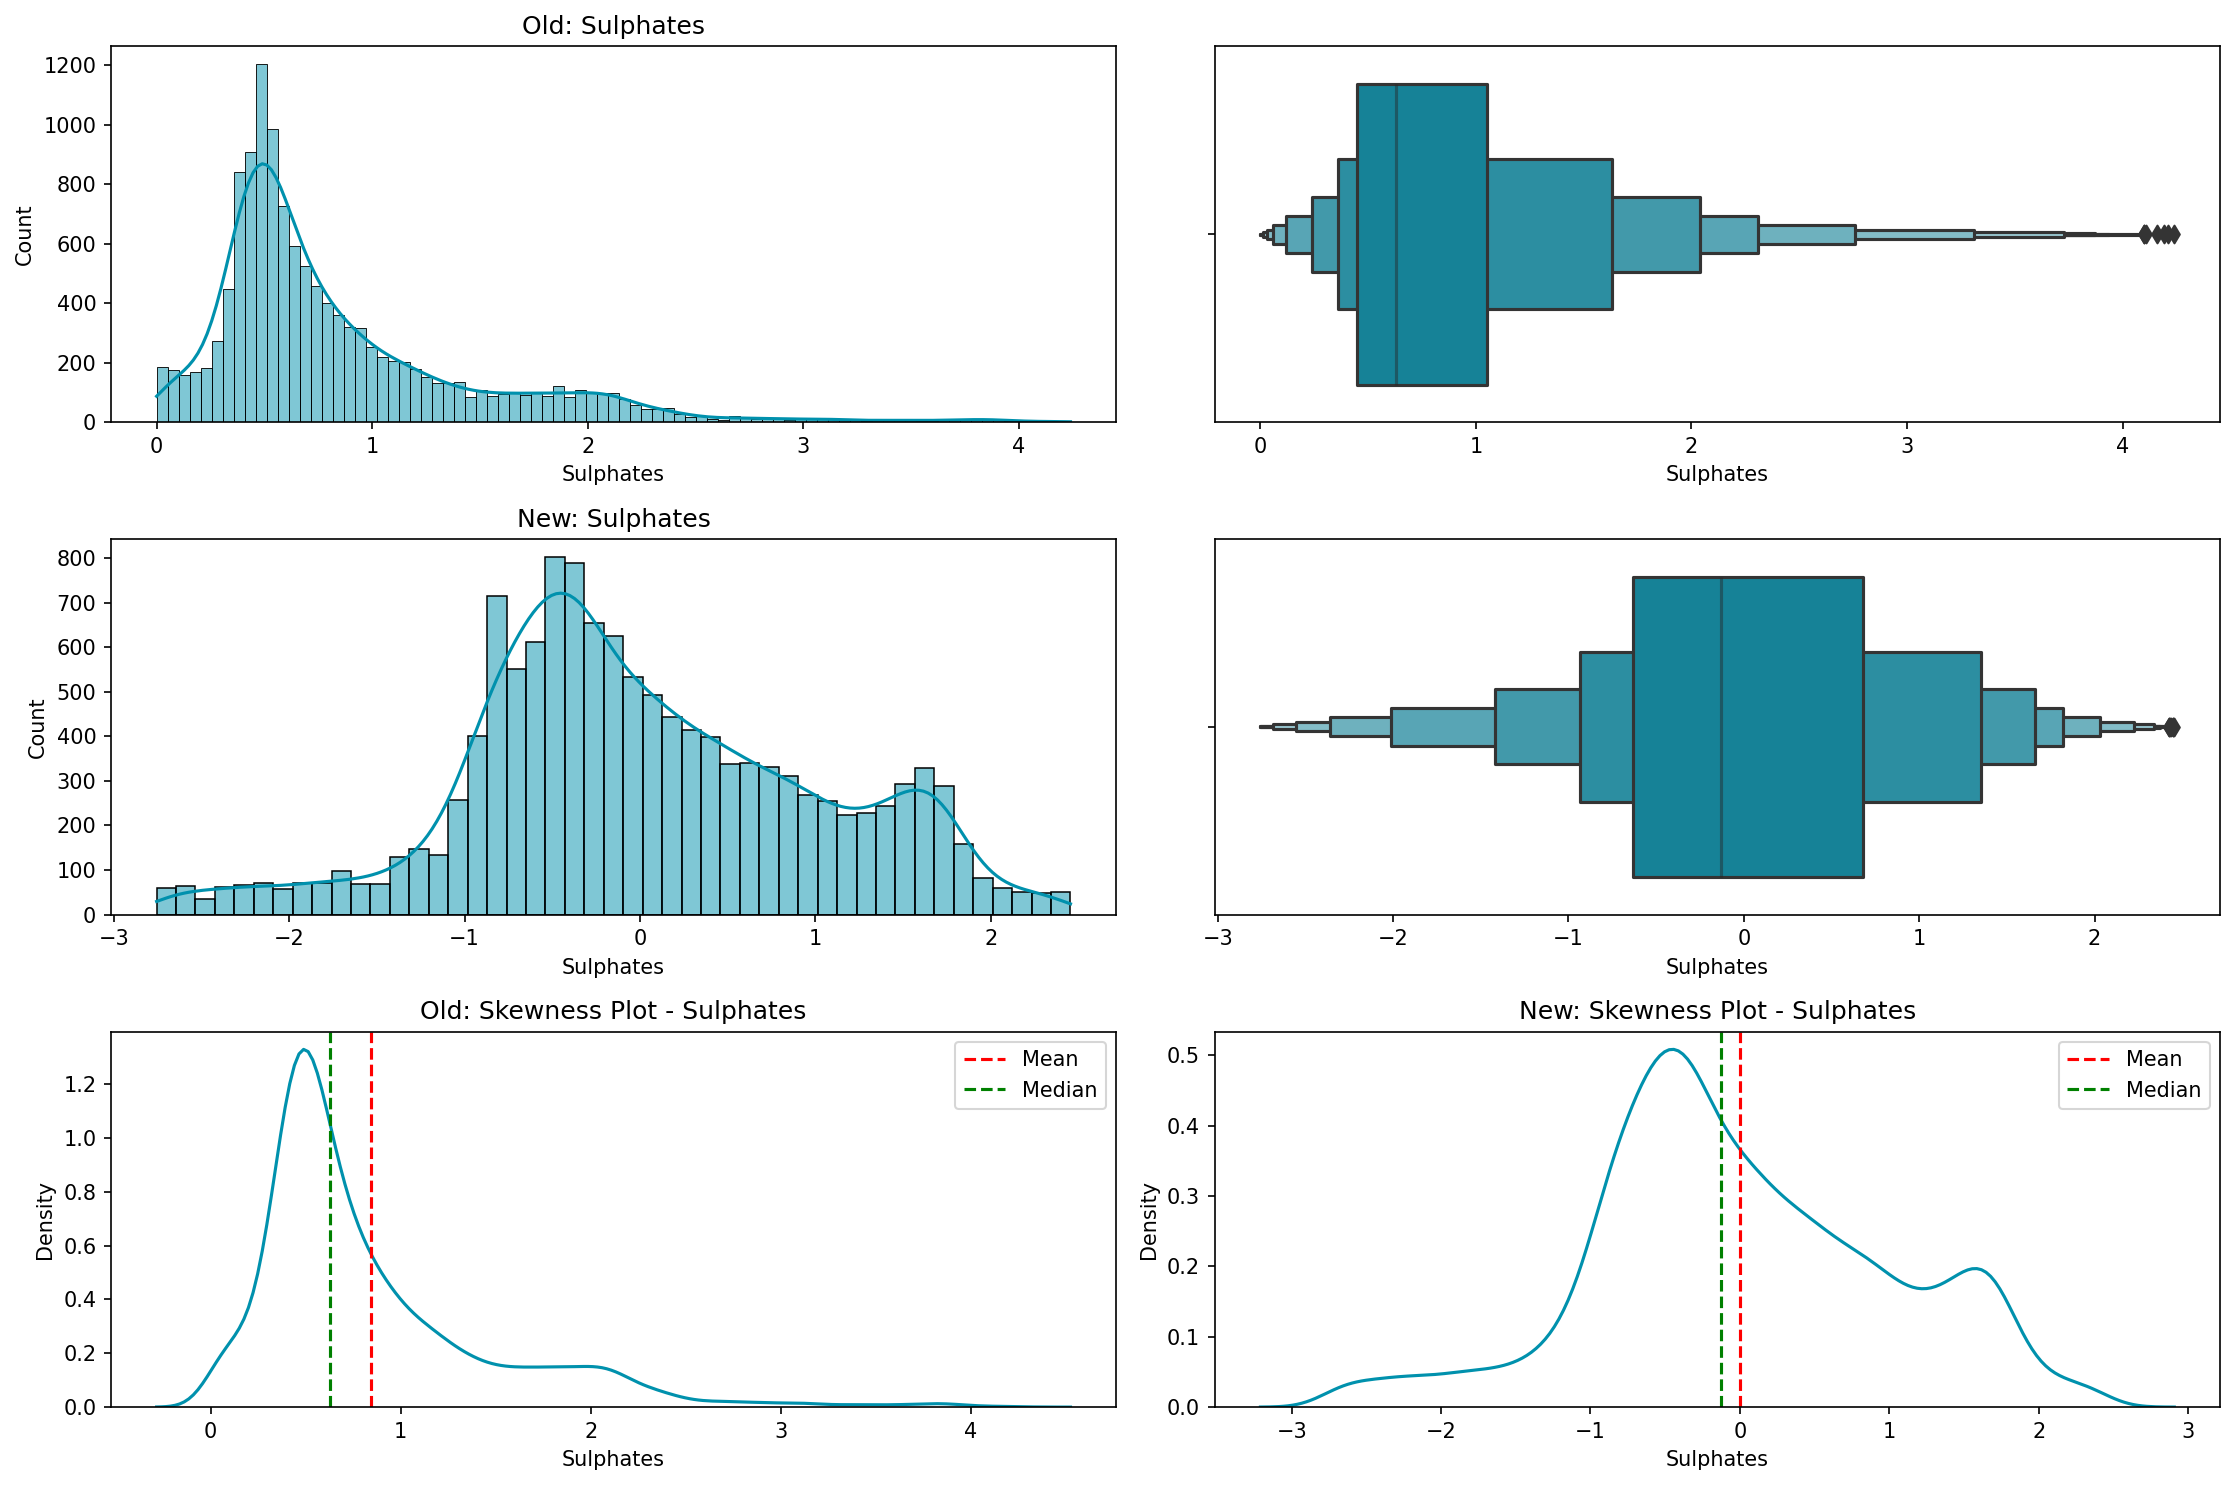

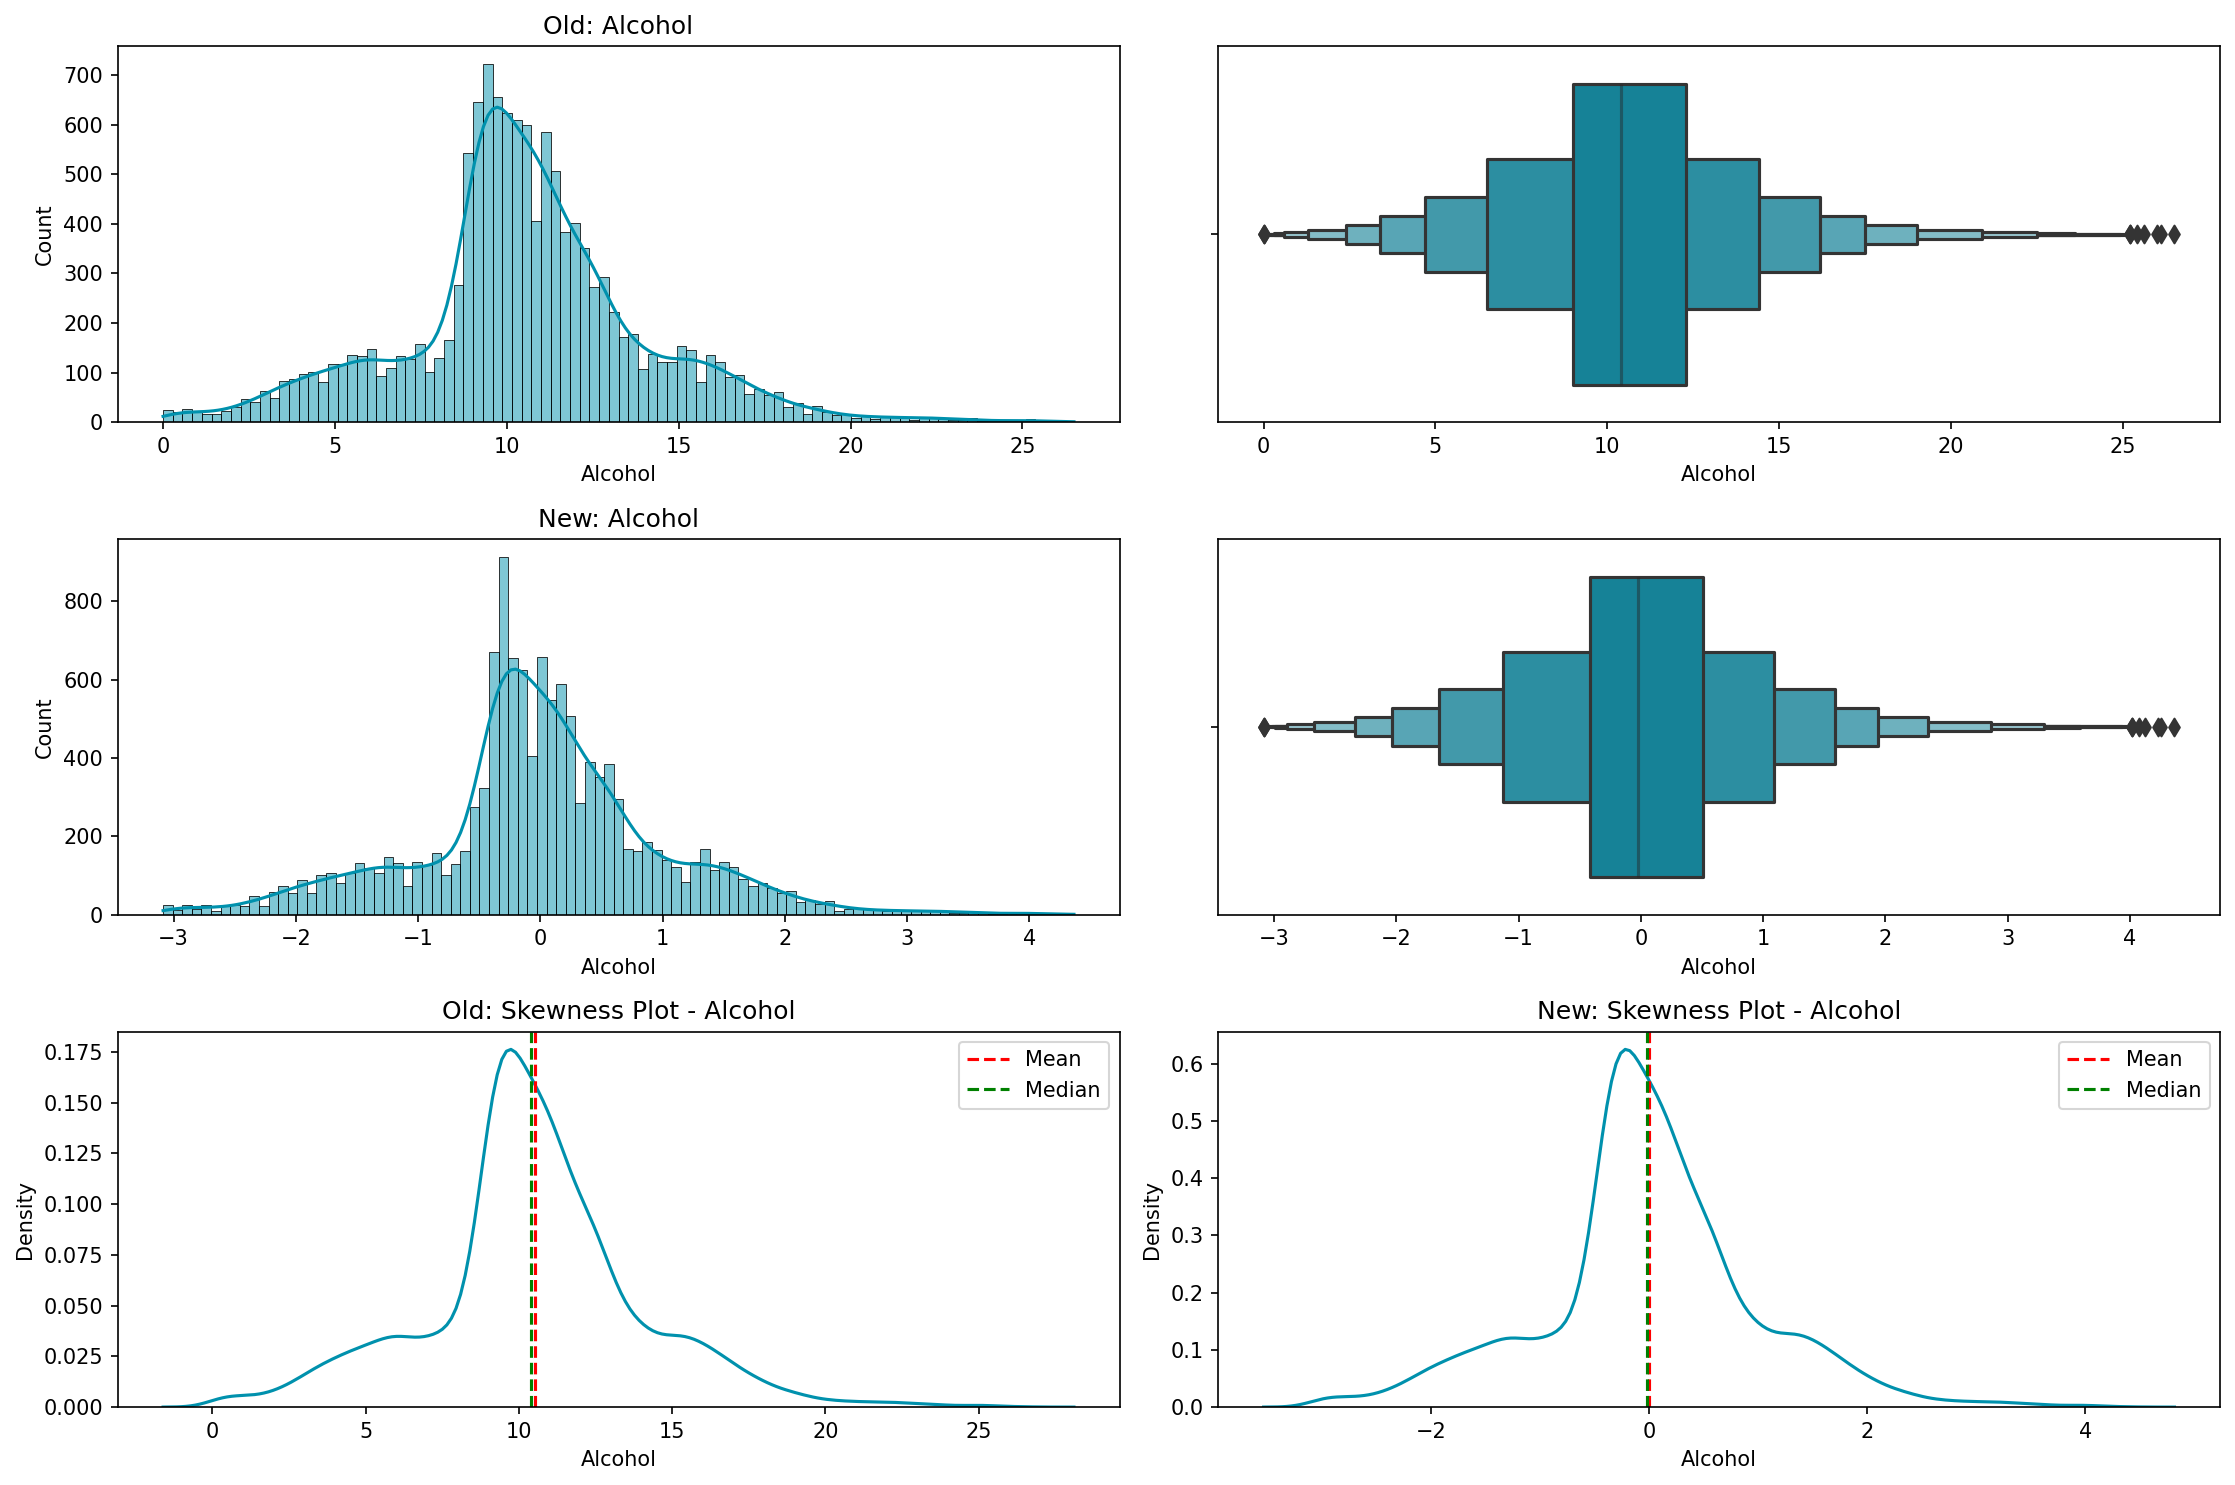

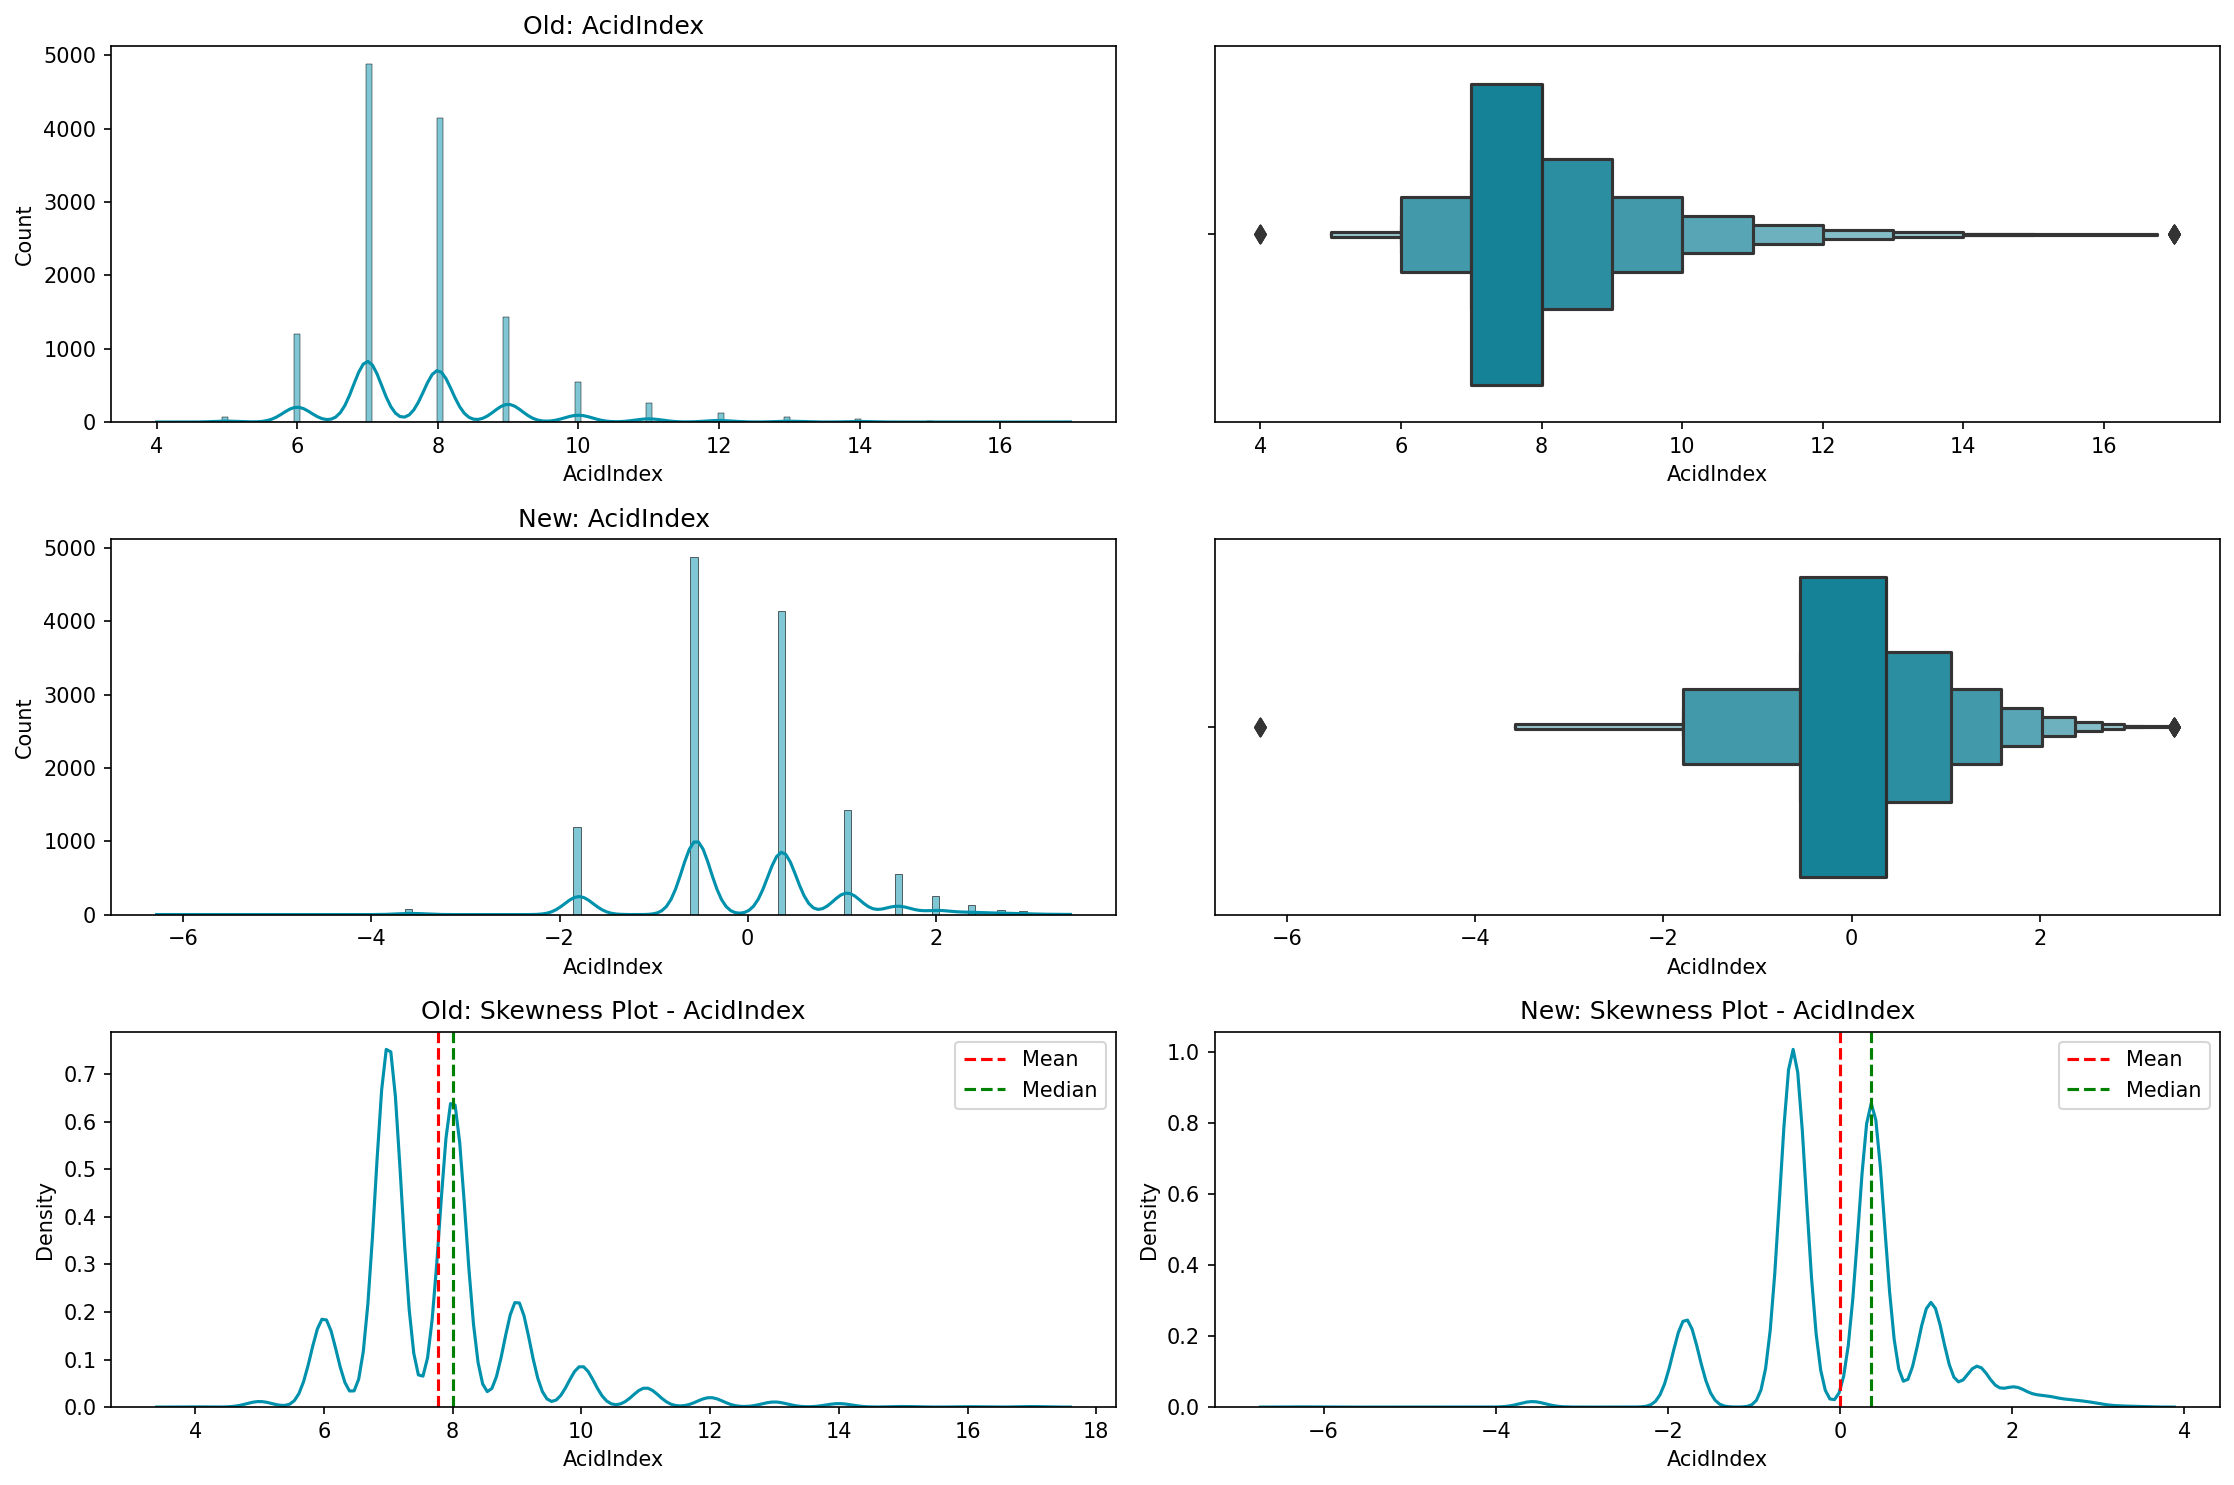

In [47]:
for i in range(len(numerics)):
    eda_modify(knn_imput_data,power_transfrom_data,numerics[i])

Distributions of these variables are heavily skewed or have multiple peaks. However, the power transform has been more successful with the molecular_SO2 variable, and it has also normalized the scale of all of the numeric variables to a range between -2 and +2.

This means that the power transform has made the data more suitable for machine learning, but it is still important to be aware of the fact that the distributions of some of the variables are not fully normal. The authors may need to use other techniques, such as outlier detection or feature selection, to further improve the quality of the data before using it in a machine learning model.

## Final combined dataset

Finally, we reintegrate our transformed numeric data with our categorical data. The categorical fields are converted into dummy variables for use in machine learning. STARS is still included in this data set but we do not recommend its usage as a predictor. Instead its missing data has been sequestered into its own indicator column (STARS_Unknown) as a result of the dummy variable transformation.

In [48]:
# converting categorical into numerical
final_data = power_transfrom_data.join(pd.get_dummies(wine_df['STARS'], prefix='STARS',dtype='int'))
final_data = final_data.join(pd.get_dummies(wine_df['LabelAppeal'], prefix='LblAppeal',dtype='int'))

final_data.head()

TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0 -0.022910     -1.037598         1.188476    0.870101       1.225505   
1 -0.022910     -0.656103        -1.229951    0.618760       0.551477   
2  1.026705     -0.032265         1.974423    0.728871       0.065752   
3 -0.022910     -0.349979        -0.275866   -1.877882       0.266326   
4  0.500437      0.154703        -0.470192    1.187288      -0.296326   

   Chlorides  bound_SO2  molecular_SO2   Density        pH  ...  \
0   1.466206   0.068281      -0.264286 -0.055455  0.176660  ...   
1   1.177011   1.139382      -1.202829  1.272266  0.251529  ...   
2  -1.050877  -0.920258       0.934419  0.034235 -0.137174  ...   
3   1.177011  -0.003840       0.578235  0.080226 -1.440410  ...   
4   0.096968  -0.843542       0.767558  0.011243 -0.137174  ...   

   STARS_Unknown  STARS_1.0  STARS_2.0  STARS_3.0  STARS_4.0  LblAppeal_-2  \
0              0          0          1          0          0             0   
1              0          0          0          1          0             0   
2              0          0          0          1          0             0   
3              0          1          0          0          0             0   
4              0          0          1          0          0             0   

   LblAppeal_-1  LblAppeal_0  LblAppeal_1  LblAppeal_2  
0             0            1            0            0  
1             1            0            0            0  
2             1            0            0            0  
3             1            0            0            0  
4             0            1            0            0  

[5 rows x 23 columns]

We have combined the transformed numeric data with the categorical data to create a complete dataset for machine learning. We have converted the categorical data into dummy variables so that it can be used by machine learning algorithms. We have also included the STARS column in the dataset, but they do not recommend using it as a predictor because it has a lot of missing data. Instead, we have created a new column called STARS_Unknown, which is an indicator column that indicates whether or not the STARS value is missing.

## Conclusion

Machine learning models require clean and well-prepared data to perform at their best. In this article, we describe our data preprocessing pipeline for a messy dataset that was not initially suitable for machine learning applications.We added new features bound_SO2 and molecular_SO2 using FreeSulfurDioxide ,TotalSulphurDioxide and pH.

The first step in our pipeline was to handle missing values in numeric variables. We used a K-nearest neighbors (KNN) imputation method, which was able to preserve the shape of the distributions and maintain the volume of data available to us. However, we were unable to do anything useful for the categorical variable STARS, since a very large proportion of the data was missing.

We transformed the shape of our numeric attributes using a Yeo-Johnson transform. This transform was able to nullify heavy skew in many of our numeric distributions by converting them into multimodal distributions. It also rescaled the distributions to a common scale.Finally, we converted the categorical variables to one-hot dummy indicators. This is a common way to encode categorical variables for machine learning algorithms.

Overall, our data preprocessing pipeline was successful in converting a messy dataset into one that is relatively useful for machine learning applications.